# 特征工程
数据集来源于Data Hackathon 3.x，所有的特征处理也只做最基本的参考，可自行尝试更多的特征工程工作，参考github里Feature engineering和Kaggle Titanic的案例。

### 加载需要的库:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#载入数据:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.shape, test.shape

((87020, 26), (37717, 24))

### 看看数据的基本情况

In [4]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

### 拿前5条出来看看

In [5]:
train.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [6]:
#合成一个总的data
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

### 数据应用/建模一个很重要的工作是，你要看看异常点，比如说缺省值

In [7]:
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

### 要对数据有更深的认识，比如说，咱们看看这些字段，分别有多少种取值(甚至你可以看看分布)

In [8]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print '\n%s这一列数据的不同取值和出现的次数\n'%v
    print data[v].value_counts()


Gender这一列数据的不同取值和出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

Salary_Account这一列数据的不同取值和出现的次数

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank            

### 紧接着你就可以开始处理你的字段(特征)了
我这里只做了一些简单的处理，你大可在我的基础上做更复杂的特征处理

### City字段处理

In [9]:
len(data['City'].unique())

724

#### 好像city的类型好多，粗暴一点，这个字段咱们不要了

In [10]:
data.drop('City',axis=1,inplace=True)

### DOB字段处理
DOB是出生的具体日期，咱们要具体日期作用没那么大，年龄段可能对我们有用，所有算一下年龄好了

In [11]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [12]:
#创建一个年龄的字段Age
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [13]:
#把原始的DOB字段去掉:
data.drop('DOB',axis=1,inplace=True)

### EMI_Load_Submitted字段处理

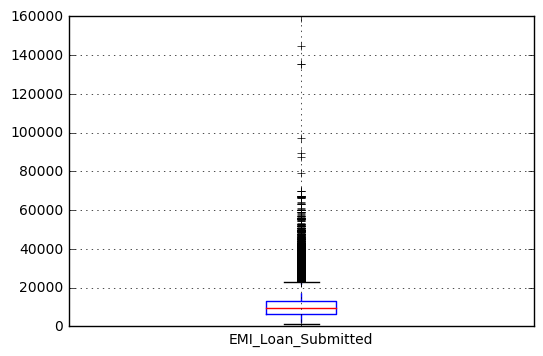

In [14]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [15]:
#好像缺失值比较多，干脆就开一个新的字段，表明是缺失值还是不是缺失值
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [16]:
#原始那一列就可以不要了
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

### Employer Name字段处理

#### 看看个数

In [17]:
len(data['Employer_Name'].value_counts())

57193

#### 不看也知道，每个人都有一个名字，太多了，懒癌晚期的同学直接drop掉了

In [18]:
#丢掉
data.drop('Employer_Name',axis=1,inplace=True)

### Existing_EMI字段

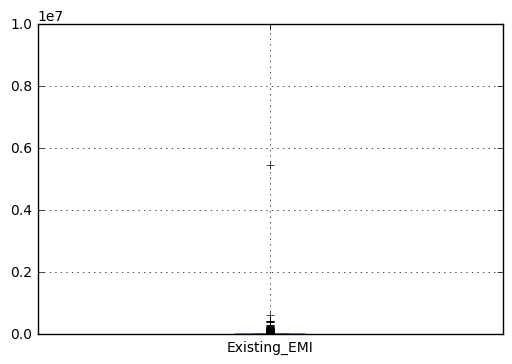

In [19]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [20]:
data['Existing_EMI'].describe()

/Users/fay/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [21]:
#缺省值不多，用均值代替
data['Existing_EMI'].fillna(0, inplace=True)

### Interest_Rate字段:

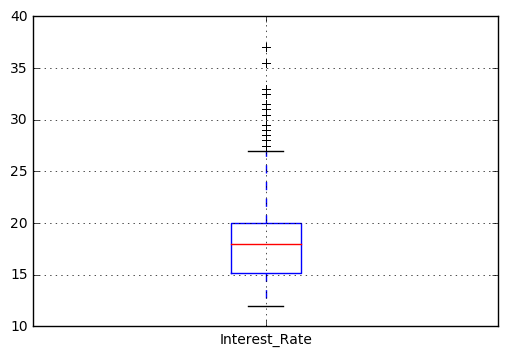

In [22]:
data.boxplot(column=['Interest_Rate'],return_type='axes')

In [23]:
#缺省值太多，也造一个字段，表示有无
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print data[['Interest_Rate','Interest_Rate_Missing']].head(10)

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [24]:
data.drop('Interest_Rate',axis=1,inplace=True)

### Lead Creation Date字段

In [25]:
#不！要！了！，是的，不要了！！！
data.drop('Lead_Creation_Date',axis=1,inplace=True)
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


### Loan Amount and Tenure applied字段

In [26]:
#找中位数去填补缺省值（因为缺省的不多）
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [27]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HDFC Bank,S122,HBXX,G,1,0,train,37,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,ICICI Bank,S122,HBXA,G,3,13,train,30,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,State Bank of India,S143,HBXX,B,1,0,train,34,1,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,State Bank of India,S143,HBXX,B,3,10,train,28,1,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HDFC Bank,S134,HBXX,B,3,17,train,31,1,1


### Loan Amount and Tenure selected

In [28]:
# 缺省值太多。。。是否缺省。。。
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [29]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,...,Var1,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,NaN,5.0,NaN,...,HBXX,G,1,0,train,37,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,200000.0,2.0,2.0,...,HBXA,G,3,13,train,30,0,0,0,0
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,450000.0,4.0,4.0,...,HBXX,B,1,0,train,34,1,1,0,0
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,920000.0,5.0,5.0,...,HBXX,B,3,10,train,28,1,1,0,0
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,500000.0,2.0,2.0,...,HBXX,B,3,17,train,31,1,1,0,0


In [30]:
#原来的字段就没用了
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### LoggedIn

In [31]:
#没想好怎么用。。。不要了。。。
data.drop('LoggedIn',axis=1,inplace=True)

### salary account

In [32]:
# 可能对接多个银行，所以也不要了
data.drop('Salary_Account',axis=1,inplace=True)

### Processing_Fee

In [33]:
#和之前一样的处理，有或者没有
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#旧的字段不要了
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [34]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

## 最终的数据样式

In [35]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,Web-browser,0.0,0.0,N,Female,ID000002C20,300000.0,5.0,N,20000,...,G,1,0,train,37,1,1,1,1,1
1,Web-browser,0.0,0.0,N,Male,ID000004E40,200000.0,2.0,Y,35000,...,G,3,13,train,30,0,0,0,0,1
2,Web-browser,0.0,0.0,N,Male,ID000007H20,600000.0,4.0,Y,22500,...,B,1,0,train,34,1,1,0,0,1
3,Web-browser,0.0,0.0,N,Male,ID000008I30,1000000.0,5.0,Y,35000,...,B,3,10,train,28,1,1,0,0,1
4,Web-browser,0.0,25000.0,N,Male,ID000009J40,500000.0,2.0,Y,100000,...,B,3,17,train,31,1,1,0,0,1


In [36]:
data.describe()

,Disbursed,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
count,87020.000000,1.247370e+05,1.247370e+05,124737.000000,1.247370e+05,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000,124737.000000
mean,0.014629,3.633107e+03,2.298744e+05,2.138075,5.309073e+04,2.950560,4.964774,30.906996,0.680640,0.680640,0.397116,0.397116,0.684208
std,0.120062,3.367642e+04,3.539938e+05,2.014874,1.823394e+06,1.695261,5.669784,7.137860,0.466231,0.466231,0.489302,0.489302,0.464833
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000e+00,0.000000e+00,0.000000,1.650000e+04,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000e+00,1.000000e+05,2.000000,2.500000e+04,3.000000,2.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,NaN,3.500000e+03,3.000000e+05,4.000000,4.000000e+04,5.000000,11.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000e+07,1.500000e+07,10.000000,4.445544e+08,7.000000,18.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [38]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

### 数值编码

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [40]:
data.head()

,Device_Type,Disbursed,Existing_EMI,Filled_Form,Gender,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Mobile_Verified,Monthly_Income,...,Var2,Var4,Var5,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,1,0.0,0.0,0,0,ID000002C20,300000.0,5.0,0,20000,...,6,1,0,train,37,1,1,1,1,1
1,1,0.0,0.0,0,1,ID000004E40,200000.0,2.0,1,35000,...,6,3,13,train,30,0,0,0,0,1
2,1,0.0,0.0,0,1,ID000007H20,600000.0,4.0,1,22500,...,1,1,0,train,34,1,1,0,0,1
3,1,0.0,0.0,0,1,ID000008I30,1000000.0,5.0,1,35000,...,1,3,10,train,28,1,1,0,0,1
4,1,0.0,25000.0,0,1,ID000009J40,500000.0,2.0,1,100000,...,1,3,17,train,31,1,1,0,0,1


In [41]:
data.dtypes

Device_Type                        int64
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                        int64
Gender                             int64
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                    int64
Monthly_Income                     int64
Source                             int64
Var1                               int64
Var2                               int64
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

### 类别型的One-Hot 编码

In [42]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index([u'Disbursed', u'Existing_EMI', u'ID', u'Loan_Amount_Applied',
       u'Loan_Tenure_Applied', u'Monthly_Income', u'Var4', u'Var5', u'source',
       u'Age', u'EMI_Loan_Submitted_Missing', u'Interest_Rate_Missing',
       u'Loan_Amount_Submitted_Missing', u'Loan_Tenure_Submitted_Missing',
       u'Processing_Fee_Missing', u'Device_Type_0', u'Device_Type_1',
       u'Filled_Form_0', u'Filled_Form_1', u'Gender_0', u'Gender_1', u'Var1_0',
       u'Var1_1', u'Var1_2', u'Var1_3', u'Var1_4', u'Var1_5', u'Var1_6',
       u'Var1_7', u'Var1_8', u'Var1_9', u'Var1_10', u'Var1_11', u'Var1_12',
       u'Var1_13', u'Var1_14', u'Var1_15', u'Var1_16', u'Var1_17', u'Var1_18',
       u'Var2_0', u'Var2_1', u'Var2_2', u'Var2_3', u'Var2_4', u'Var2_5',
       u'Var2_6', u'Mobile_Verified_0', u'Mobile_Verified_1', u'Source_0',
       u'Source_1', u'Source_2'],
      dtype='object')

### 区分训练和测试数据

In [46]:
print(type(data['source']=='train'))
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

<class 'pandas.core.series.Series'>


In [44]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)<!DOCTYPE html>
<html>
<head><meta charset="utf-8" />
<title>Using Xgboost to predict sales</title>

<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>

<style type="text/css">
    /*!
*
* Twitter Bootstrap
*
*/
/*!
 * Bootstrap v3.3.6 (http://getbootstrap.com)
 * Copyright 2011-2015 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 */
/*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */
html {
  font-family: sans-serif;
  -ms-text-size-adjust: 100%;
  -webkit-text-size-adjust: 100%;
}
body {
  margin: 0;
}
article,
aside,
details,
figcaption,
figure,
footer,
header,
hgroup,
main,
menu,
nav,
section,
summary {
  display: block;
}
audio,
canvas,
progress,
video {
  display: inline-block;
  vertical-align: baseline;
}
audio:not([controls]) {
  display: none;
  height: 0;
}
[hidden],
template {
  display: none;
}
a {
  background-color: transparent;
}
a:active,
a:hover {
  outline: 0;
}
abbr[title] {
  border-bottom: 1px dotted;
}
b,
strong {
  font-weight: bold;
}
dfn {
  font-style: italic;
}
h1 {
  font-size: 2em;
  margin: 0.67em 0;
}
mark {
  background: #ff0;
  color: #000;
}
small {
  font-size: 80%;
}
sub,
sup {
  font-size: 75%;
  line-height: 0;
  position: relative;
  vertical-align: baseline;
}
sup {
  top: -0.5em;
}
sub {
  bottom: -0.25em;
}
img {
  border: 0;
}
svg:not(:root) {
  overflow: hidden;
}
figure {
  margin: 1em 40px;
}
hr {
  box-sizing: content-box;
  height: 0;
}
pre {
  overflow: auto;
}
code,
kbd,
pre,
samp {
  font-family: monospace, monospace;
  font-size: 1em;
}
button,
input,
optgroup,
select,
textarea {
  color: inherit;
  font: inherit;
  margin: 0;
}
button {
  overflow: visible;
}
button,
select {
  text-transform: none;
}
button,
html input[type="button"],
input[type="reset"],
input[type="submit"] {
  -webkit-appearance: button;
  cursor: pointer;
}
button[disabled],
html input[disabled] {
  cursor: default;
}
button::-moz-focus-inner,
input::-moz-focus-inner {
  border: 0;
  padding: 0;
}
input {
  line-height: normal;
}
input[type="checkbox"],
input[type="radio"] {
  box-sizing: border-box;
  padding: 0;
}
input[type="number"]::-webkit-inner-spin-button,
input[type="number"]::-webkit-outer-spin-button {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: textfield;
  box-sizing: content-box;
}
input[type="search"]::-webkit-search-cancel-button,
input[type="search"]::-webkit-search-decoration {
  -webkit-appearance: none;
}
fieldset {
  border: 1px solid #c0c0c0;
  margin: 0 2px;
  padding: 0.35em 0.625em 0.75em;
}
legend {
  border: 0;
  padding: 0;
}
textarea {
  overflow: auto;
}
optgroup {
  font-weight: bold;
}
table {
  border-collapse: collapse;
  border-spacing: 0;
}
td,
th {
  padding: 0;
}
/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */
@media print {
  *,
  *:before,
  *:after {
    background: transparent !important;
    color: #000 !important;
    box-shadow: none !important;
    text-shadow: none !important;
  }
  a,
  a:visited {
    text-decoration: underline;
  }
  a[href]:after {
    content: " (" attr(href) ")";
  }
  abbr[title]:after {
    content: " (" attr(title) ")";
  }
  a[href^="#"]:after,
  a[href^="javascript:"]:after {
    content: "";
  }
  pre,
  blockquote {
    border: 1px solid #999;
    page-break-inside: avoid;
  }
  thead {
    display: table-header-group;
  }
  tr,
  img {
    page-break-inside: avoid;
  }
  img {
    max-width: 100% !important;
  }
  p,
  h2,
  h3 {
    orphans: 3;
    widows: 3;
  }
  h2,
  h3 {
    page-break-after: avoid;
  }
  .navbar {
    display: none;
  }
  .btn > .caret,
  .dropup > .btn > .caret {
    border-top-color: #000 !important;
  }
  .label {
    border: 1px solid #000;
  }
  .table {
    border-collapse: collapse !important;
  }
  .table td,
  .table th {
    background-color: #fff !important;
  }
  .table-bordered th,
  .table-bordered td {
    border: 1px solid #ddd !important;
  }
}
@font-face {
  font-family: 'Glyphicons Halflings';
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot');
  src: url('../components/bootstrap/fonts/glyphicons-halflings-regular.eot?#iefix') format('embedded-opentype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff2') format('woff2'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.woff') format('woff'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.ttf') format('truetype'), url('../components/bootstrap/fonts/glyphicons-halflings-regular.svg#glyphicons_halflingsregular') format('svg');
}
.glyphicon {
  position: relative;
  top: 1px;
  display: inline-block;
  font-family: 'Glyphicons Halflings';
  font-style: normal;
  font-weight: normal;
  line-height: 1;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
.glyphicon-asterisk:before {
  content: "\002a";
}
.glyphicon-plus:before {
  content: "\002b";
}
.glyphicon-euro:before,
.glyphicon-eur:before {
  content: "\20ac";
}
.glyphicon-minus:before {
  content: "\2212";
}
.glyphicon-cloud:before {
  content: "\2601";
}
.glyphicon-envelope:before {
  content: "\2709";
}
.glyphicon-pencil:before {
  content: "\270f";
}
.glyphicon-glass:before {
  content: "\e001";
}
.glyphicon-music:before {
  content: "\e002";
}
.glyphicon-search:before {
  content: "\e003";
}
.glyphicon-heart:before {
  content: "\e005";
}
.glyphicon-star:before {
  content: "\e006";
}
.glyphicon-star-empty:before {
  content: "\e007";
}
.glyphicon-user:before {
  content: "\e008";
}
.glyphicon-film:before {
  content: "\e009";
}
.glyphicon-th-large:before {
  content: "\e010";
}
.glyphicon-th:before {
  content: "\e011";
}
.glyphicon-th-list:before {
  content: "\e012";
}
.glyphicon-ok:before {
  content: "\e013";
}
.glyphicon-remove:before {
  content: "\e014";
}
.glyphicon-zoom-in:before {
  content: "\e015";
}
.glyphicon-zoom-out:before {
  content: "\e016";
}
.glyphicon-off:before {
  content: "\e017";
}
.glyphicon-signal:before {
  content: "\e018";
}
.glyphicon-cog:before {
  content: "\e019";
}
.glyphicon-trash:before {
  content: "\e020";
}
.glyphicon-home:before {
  content: "\e021";
}
.glyphicon-file:before {
  content: "\e022";
}
.glyphicon-time:before {
  content: "\e023";
}
.glyphicon-road:before {
  content: "\e024";
}
.glyphicon-download-alt:before {
  content: "\e025";
}
.glyphicon-download:before {
  content: "\e026";
}
.glyphicon-upload:before {
  content: "\e027";
}
.glyphicon-inbox:before {
  content: "\e028";
}
.glyphicon-play-circle:before {
  content: "\e029";
}
.glyphicon-repeat:before {
  content: "\e030";
}
.glyphicon-refresh:before {
  content: "\e031";
}
.glyphicon-list-alt:before {
  content: "\e032";
}
.glyphicon-lock:before {
  content: "\e033";
}
.glyphicon-flag:before {
  content: "\e034";
}
.glyphicon-headphones:before {
  content: "\e035";
}
.glyphicon-volume-off:before {
  content: "\e036";
}
.glyphicon-volume-down:before {
  content: "\e037";
}
.glyphicon-volume-up:before {
  content: "\e038";
}
.glyphicon-qrcode:before {
  content: "\e039";
}
.glyphicon-barcode:before {
  content: "\e040";
}
.glyphicon-tag:before {
  content: "\e041";
}
.glyphicon-tags:before {
  content: "\e042";
}
.glyphicon-book:before {
  content: "\e043";
}
.glyphicon-bookmark:before {
  content: "\e044";
}
.glyphicon-print:before {
  content: "\e045";
}
.glyphicon-camera:before {
  content: "\e046";
}
.glyphicon-font:before {
  content: "\e047";
}
.glyphicon-bold:before {
  content: "\e048";
}
.glyphicon-italic:before {
  content: "\e049";
}
.glyphicon-text-height:before {
  content: "\e050";
}
.glyphicon-text-width:before {
  content: "\e051";
}
.glyphicon-align-left:before {
  content: "\e052";
}
.glyphicon-align-center:before {
  content: "\e053";
}
.glyphicon-align-right:before {
  content: "\e054";
}
.glyphicon-align-justify:before {
  content: "\e055";
}
.glyphicon-list:before {
  content: "\e056";
}
.glyphicon-indent-left:before {
  content: "\e057";
}
.glyphicon-indent-right:before {
  content: "\e058";
}
.glyphicon-facetime-video:before {
  content: "\e059";
}
.glyphicon-picture:before {
  content: "\e060";
}
.glyphicon-map-marker:before {
  content: "\e062";
}
.glyphicon-adjust:before {
  content: "\e063";
}
.glyphicon-tint:before {
  content: "\e064";
}
.glyphicon-edit:before {
  content: "\e065";
}
.glyphicon-share:before {
  content: "\e066";
}
.glyphicon-check:before {
  content: "\e067";
}
.glyphicon-move:before {
  content: "\e068";
}
.glyphicon-step-backward:before {
  content: "\e069";
}
.glyphicon-fast-backward:before {
  content: "\e070";
}
.glyphicon-backward:before {
  content: "\e071";
}
.glyphicon-play:before {
  content: "\e072";
}
.glyphicon-pause:before {
  content: "\e073";
}
.glyphicon-stop:before {
  content: "\e074";
}
.glyphicon-forward:before {
  content: "\e075";
}
.glyphicon-fast-forward:before {
  content: "\e076";
}
.glyphicon-step-forward:before {
  content: "\e077";
}
.glyphicon-eject:before {
  content: "\e078";
}
.glyphicon-chevron-left:before {
  content: "\e079";
}
.glyphicon-chevron-right:before {
  content: "\e080";
}
.glyphicon-plus-sign:before {
  content: "\e081";
}
.glyphicon-minus-sign:before {
  content: "\e082";
}
.glyphicon-remove-sign:before {
  content: "\e083";
}
.glyphicon-ok-sign:before {
  content: "\e084";
}
.glyphicon-question-sign:before {
  content: "\e085";
}
.glyphicon-info-sign:before {
  content: "\e086";
}
.glyphicon-screenshot:before {
  content: "\e087";
}
.glyphicon-remove-circle:before {
  content: "\e088";
}
.glyphicon-ok-circle:before {
  content: "\e089";
}
.glyphicon-ban-circle:before {
  content: "\e090";
}
.glyphicon-arrow-left:before {
  content: "\e091";
}
.glyphicon-arrow-right:before {
  content: "\e092";
}
.glyphicon-arrow-up:before {
  content: "\e093";
}
.glyphicon-arrow-down:before {
  content: "\e094";
}
.glyphicon-share-alt:before {
  content: "\e095";
}
.glyphicon-resize-full:before {
  content: "\e096";
}
.glyphicon-resize-small:before {
  content: "\e097";
}
.glyphicon-exclamation-sign:before {
  content: "\e101";
}
.glyphicon-gift:before {
  content: "\e102";
}
.glyphicon-leaf:before {
  content: "\e103";
}
.glyphicon-fire:before {
  content: "\e104";
}
.glyphicon-eye-open:before {
  content: "\e105";
}
.glyphicon-eye-close:before {
  content: "\e106";
}
.glyphicon-warning-sign:before {
  content: "\e107";
}
.glyphicon-plane:before {
  content: "\e108";
}
.glyphicon-calendar:before {
  content: "\e109";
}
.glyphicon-random:before {
  content: "\e110";
}
.glyphicon-comment:before {
  content: "\e111";
}
.glyphicon-magnet:before {
  content: "\e112";
}
.glyphicon-chevron-up:before {
  content: "\e113";
}
.glyphicon-chevron-down:before {
  content: "\e114";
}
.glyphicon-retweet:before {
  content: "\e115";
}
.glyphicon-shopping-cart:before {
  content: "\e116";
}
.glyphicon-folder-close:before {
  content: "\e117";
}
.glyphicon-folder-open:before {
  content: "\e118";
}
.glyphicon-resize-vertical:before {
  content: "\e119";
}
.glyphicon-resize-horizontal:before {
  content: "\e120";
}
.glyphicon-hdd:before {
  content: "\e121";
}
.glyphicon-bullhorn:before {
  content: "\e122";
}
.glyphicon-bell:before {
  content: "\e123";
}
.glyphicon-certificate:before {
  content: "\e124";
}
.glyphicon-thumbs-up:before {
  content: "\e125";
}
.glyphicon-thumbs-down:before {
  content: "\e126";
}
.glyphicon-hand-right:before {
  content: "\e127";
}
.glyphicon-hand-left:before {
  content: "\e128";
}
.glyphicon-hand-up:before {
  content: "\e129";
}
.glyphicon-hand-down:before {
  content: "\e130";
}
.glyphicon-circle-arrow-right:before {
  content: "\e131";
}
.glyphicon-circle-arrow-left:before {
  content: "\e132";
}
.glyphicon-circle-arrow-up:before {
  content: "\e133";
}
.glyphicon-circle-arrow-down:before {
  content: "\e134";
}
.glyphicon-globe:before {
  content: "\e135";
}
.glyphicon-wrench:before {
  content: "\e136";
}
.glyphicon-tasks:before {
  content: "\e137";
}
.glyphicon-filter:before {
  content: "\e138";
}
.glyphicon-briefcase:before {
  content: "\e139";
}
.glyphicon-fullscreen:before {
  content: "\e140";
}
.glyphicon-dashboard:before {
  content: "\e141";
}
.glyphicon-paperclip:before {
  content: "\e142";
}
.glyphicon-heart-empty:before {
  content: "\e143";
}
.glyphicon-link:before {
  content: "\e144";
}
.glyphicon-phone:before {
  content: "\e145";
}
.glyphicon-pushpin:before {
  content: "\e146";
}
.glyphicon-usd:before {
  content: "\e148";
}
.glyphicon-gbp:before {
  content: "\e149";
}
.glyphicon-sort:before {
  content: "\e150";
}
.glyphicon-sort-by-alphabet:before {
  content: "\e151";
}
.glyphicon-sort-by-alphabet-alt:before {
  content: "\e152";
}
.glyphicon-sort-by-order:before {
  content: "\e153";
}
.glyphicon-sort-by-order-alt:before {
  content: "\e154";
}
.glyphicon-sort-by-attributes:before {
  content: "\e155";
}
.glyphicon-sort-by-attributes-alt:before {
  content: "\e156";
}
.glyphicon-unchecked:before {
  content: "\e157";
}
.glyphicon-expand:before {
  content: "\e158";
}
.glyphicon-collapse-down:before {
  content: "\e159";
}
a
.glyphicon-log-in:before {
  content: "\e161";
}
.glyphicon-flash:before {
  content: "\e162";
}
.glyphicon-log-out:before {
  content: "\e163";
}
.glyphicon-new-window:before {
  content: "\e164";
}
.glyphicon-record:before {
  content: "\e165";
}
.glyphicon-save:before {
  content: "\e166";
}
.glyphicon-open:before {
  content: "\e167";
}
.glyphicon-saved:before {
  content: "\e168";
}
.glyphicon-import:before {
  content: "\e169";
}
.glyphicon-export:before {
  content: "\e170";
}
.glyphicon-send:before {
  content: "\e171";
}
.glyphicon-floppy-disk:before {
  content: "\e172";
}
.glyphicon-floppy-saved:before {
  content: "\e173";
}
.glyphicon-floppy-remove:before {
  content: "\e174";
}
.glyphicon-floppy-save:before {
  content: "\e175";
}
.glyphicon-floppy-open:before {
  content: "\e176";
}
.glyphicon-credit-card:before {
  content: "\e177";
}
.glyphicon-transfer:before {
  content: "\e178";
}
.glyphicon-cutlery:before {
  content: "\e179";
}
.glyphicon-header:before {
  content: "\e180";
}
.glyphicon-compressed:before {
  content: "\e181";
}
.glyphicon-earphone:before {
  content: "\e182";
}
.glyphicon-phone-alt:before {
  content: "\e183";
}
.glyphicon-tower:before {
  content: "\e184";
}
.glyphicon-stats:before {
  content: "\e185";
}
.glyphicon-sd-video:before {
  content: "\e186";
}
.glyphicon-hd-video:before {
  content: "\e187";
}
.glyphicon-subtitles:before {
  content: "\e188";
}
.glyphicon-sound-stereo:before {
  content: "\e189";
}
.glyphicon-sound-dolby:before {
  content: "\e190";
}
.glyphicon-sound-5-1:before {
  content: "\e191";
}
.glyphicon-sound-6-1:before {
  content: "\e192";
}
.glyphicon-sound-7-1:before {
  content: "\e193";
}
.glyphicon-copyright-mark:before {
  content: "\e194";
}
.glyphicon-registration-mark:before {
  content: "\e195";
}
.glyphicon-cloud-download:before {
  content: "\e197";
}
.glyphicon-cloud-upload:before {
  content: "\e198";
}
.glyphicon-tree-conifer:before {
  content: "\e199";
}
.glyphicon-tree-deciduous:before {
  content: "\e200";
}
.glyphicon-cd:before {
  content: "\e201";
}
.glyphicon-save-file:before {
  content: "\e202";
}
.glyphicon-open-file:before {
  content: "\e203";
}
.glyphicon-level-up:before {
  content: "\e204";
}
.glyphicon-copy:before {
  content: "\e205";
}
.glyphicon-paste:before {
  content: "\e206";
}
.glyphicon-alert:before {
  content: "\e209";
}
.glyphicon-equalizer:before {
  content: "\e210";
}
.glyphicon-king:before {
  content: "\e211";
}
.glyphicon-queen:before {
  content: "\e212";
}
.glyphicon-pawn:before {
  content: "\e213";
}
.glyphicon-bishop:before {
  content: "\e214";
}
.glyphicon-knight:before {
  content: "\e215";
}
.glyphicon-baby-formula:before {
  content: "\e216";
}
.glyphicon-tent:before {
  content: "\26fa";
}
.glyphicon-blackboard:before {
  content: "\e218";
}
.glyphicon-bed:before {
  content: "\e219";
}
.glyphicon-apple:before {
  content: "\f8ff";
}
.glyphicon-erase:before {
  content: "\e221";
}
.glyphicon-hourglass:before {
  content: "\231b";
}
.glyphicon-lamp:before {
  content: "\e223";
}
.glyphicon-duplicate:before {
  content: "\e224";
}
.glyphicon-piggy-bank:before {
  content: "\e225";
}
.glyphicon-scissors:before {
  content: "\e226";
}
.glyphicon-bitcoin:before {
  content: "\e227";
}
.glyphicon-btc:before {
  content: "\e227";
}
.glyphicon-xbt:before {
  content: "\e227";
}
.glyphicon-yen:before {
  content: "\00a5";
}
.glyphicon-jpy:before {
  content: "\00a5";
}
.glyphicon-ruble:before {
  content: "\20bd";
}
.glyphicon-rub:before {
  content: "\20bd";
}
.glyphicon-scale:before {
  content: "\e230";
}
.glyphicon-ice-lolly:before {
  content: "\e231";
}
.glyphicon-ice-lolly-tasted:before {
  content: "\e232";
}
.glyphicon-education:before {
  content: "\e233";
}
.glyphicon-option-horizontal:before {
  content: "\e234";
}
.glyphicon-option-vertical:before {
  content: "\e235";
}
.glyphicon-menu-hamburger:before {
  content: "\e236";
}
.glyphicon-modal-window:before {
  content: "\e237";
}
.glyphicon-oil:before {
  content: "\e238";
}
.glyphicon-grain:before {
  content: "\e239";
}
.glyphicon-sunglasses:before {
  content: "\e240";
}
.glyphicon-text-size:before {
  content: "\e241";
}
.glyphicon-text-color:before {
  content: "\e242";
}
.glyphicon-text-background:before {
  content: "\e243";
}
.glyphicon-object-align-top:before {
  content: "\e244";
}
.glyphicon-object-align-bottom:before {
  content: "\e245";
}
.glyphicon-object-align-horizontal:before {
  content: "\e246";
}
.glyphicon-object-align-left:before {
  content: "\e247";
}
.glyphicon-object-align-vertical:before {
  content: "\e248";
}
.glyphicon-object-align-right:before {
  content: "\e249";
}
.glyphicon-triangle-right:before {
  content: "\e250";
}
.glyphicon-triangle-left:before {
  content: "\e251";
}
.glyphicon-triangle-bottom:before {
  content: "\e252";
}
.glyphicon-triangle-top:before {
  content: "\e253";
}
.glyphicon-console:before {
  content: "\e254";
}
.glyphicon-superscript:before {
  content: "\e255";
}
.glyphicon-subscript:before {
  content: "\e256";
}
.glyphicon-menu-left:before {
  content: "\e257";
}
.glyphicon-menu-right:before {
  content: "\e258";
}
.glyphicon-menu-down:before {
  content: "\e259";
}
.glyphicon-menu-up:before {
  content: "\e260";
}
* {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
*:before,
*:after {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
html {
  font-size: 10px;
  -webkit-tap-highlight-color: rgba(0, 0, 0, 0);
}
body {
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-size: 13px;
  line-height: 1.42857143;
  color: #000;
  background-color: #fff;
}
input,
button,
select,
textarea {
  font-family: inherit;
  font-size: inherit;
  line-height: inherit;
}
a {
  color: #337ab7;
  text-decoration: none;
}
a:hover,
a:focus {
  color: #23527c;
  text-decoration: underline;
}
a:focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
figure {
  margin: 0;
}
img {
  vertical-align: middle;
}
.img-responsive,
.thumbnail > img,
.thumbnail a > img,
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  display: block;
  max-width: 100%;
  height: auto;
}
.img-rounded {
  border-radius: 3px;
}
.img-thumbnail {
  padding: 4px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: all 0.2s ease-in-out;
  -o-transition: all 0.2s ease-in-out;
  transition: all 0.2s ease-in-out;
  display: inline-block;
  max-width: 100%;
  height: auto;
}
.img-circle {
  border-radius: 50%;
}
hr {
  margin-top: 18px;
  margin-bottom: 18px;
  border: 0;
  border-top: 1px solid #eeeeee;
}
.sr-only {
  position: absolute;
  width: 1px;
  height: 1px;
  margin: -1px;
  padding: 0;
  overflow: hidden;
  clip: rect(0, 0, 0, 0);
  border: 0;
}
.sr-only-focusable:active,
.sr-only-focusable:focus {
  position: static;
  width: auto;
  height: auto;
  margin: 0;
  overflow: visible;
  clip: auto;
}
[role="button"] {
  cursor: pointer;
}
h1,
h2,
h3,
h4,
h5,
h6,
.h1,
.h2,
.h3,
.h4,
.h5,
.h6 {
  font-family: inherit;
  font-weight: 500;
  line-height: 1.1;
  color: inherit;
}
h1 small,
h2 small,
h3 small,
h4 small,
h5 small,
h6 small,
.h1 small,
.h2 small,
.h3 small,
.h4 small,
.h5 small,
.h6 small,
h1 .small,
h2 .small,
h3 .small,
h4 .small,
h5 .small,
h6 .small,
.h1 .small,
.h2 .small,
.h3 .small,
.h4 .small,
.h5 .small,
.h6 .small {
  font-weight: normal;
  line-height: 1;
  color: #777777;
}
h1,
.h1,
h2,
.h2,
h3,
.h3 {
  margin-top: 18px;
  margin-bottom: 9px;
}
h1 small,
.h1 small,
h2 small,
.h2 small,
h3 small,
.h3 small,
h1 .small,
.h1 .small,
h2 .small,
.h2 .small,
h3 .small,
.h3 .small {
  font-size: 65%;
}
h4,
.h4,
h5,
.h5,
h6,
.h6 {
  margin-top: 9px;
  margin-bottom: 9px;
}
h4 small,
.h4 small,
h5 small,
.h5 small,
h6 small,
.h6 small,
h4 .small,
.h4 .small,
h5 .small,
.h5 .small,
h6 .small,
.h6 .small {
  font-size: 75%;
}
h1,
.h1 {
  font-size: 33px;
}
h2,
.h2 {
  font-size: 27px;
}
h3,
.h3 {
  font-size: 23px;
}
h4,
.h4 {
  font-size: 17px;
}
h5,
.h5 {
  font-size: 13px;
}
h6,
.h6 {
  font-size: 12px;
}
p {
  margin: 0 0 9px;
}
.lead {
  margin-bottom: 18px;
  font-size: 14px;
  font-weight: 300;
  line-height: 1.4;
}
@media (min-width: 768px) {
  .lead {
    font-size: 19.5px;
  }
}
small,
.small {
  font-size: 92%;
}
mark,
.mark {
  background-color: #fcf8e3;
  padding: .2em;
}
.text-left {
  text-align: left;
}
.text-right {
  text-align: right;
}
.text-center {
  text-align: center;
}
.text-justify {
  text-align: justify;
}
.text-nowrap {
  white-space: nowrap;
}
.text-lowercase {
  text-transform: lowercase;
}
.text-uppercase {
  text-transform: uppercase;
}
.text-capitalize {
  text-transform: capitalize;
}
.text-muted {
  color: #777777;
}
.text-primary {
  color: #337ab7;
}
a.text-primary:hover,
a.text-primary:focus {
  color: #286090;
}
.text-success {
  color: #3c763d;
}
a.text-success:hover,
a.text-success:focus {
  color: #2b542c;
}
.text-info {
  color: #31708f;
}
a.text-info:hover,
a.text-info:focus {
  color: #245269;
}
.text-warning {
  color: #8a6d3b;
}
a.text-warning:hover,
a.text-warning:focus {
  color: #66512c;
}
.text-danger {
  color: #a94442;
}
a.text-danger:hover,
a.text-danger:focus {
  color: #843534;
}
.bg-primary {
  color: #fff;
  background-color: #337ab7;
}
a.bg-primary:hover,
a.bg-primary:focus {
  background-color: #286090;
}
.bg-success {
  background-color: #dff0d8;
}
a.bg-success:hover,
a.bg-success:focus {
  background-color: #c1e2b3;
}
.bg-info {
  background-color: #d9edf7;
}
a.bg-info:hover,
a.bg-info:focus {
  background-color: #afd9ee;
}
.bg-warning {
  background-color: #fcf8e3;
}
a.bg-warning:hover,
a.bg-warning:focus {
  background-color: #f7ecb5;
}
.bg-danger {
  background-color: #f2dede;
}
a.bg-danger:hover,
a.bg-danger:focus {
  background-color: #e4b9b9;
}
.page-header {
  padding-bottom: 8px;
  margin: 36px 0 18px;
  border-bottom: 1px solid #eeeeee;
}
ul,
ol {
  margin-top: 0;
  margin-bottom: 9px;
}
ul ul,
ol ul,
ul ol,
ol ol {
  margin-bottom: 0;
}
.list-unstyled {
  padding-left: 0;
  list-style: none;
}
.list-inline {
  padding-left: 0;
  list-style: none;
  margin-left: -5px;
}
.list-inline > li {
  display: inline-block;
  padding-left: 5px;
  padding-right: 5px;
}
dl {
  margin-top: 0;
  margin-bottom: 18px;
}
dt,
dd {
  line-height: 1.42857143;
}
dt {
  font-weight: bold;
}
dd {
  margin-left: 0;
}
@media (min-width: 541px) {
  .dl-horizontal dt {
    float: left;
    width: 160px;
    clear: left;
    text-align: right;
    overflow: hidden;
    text-overflow: ellipsis;
    white-space: nowrap;
  }
  .dl-horizontal dd {
    margin-left: 180px;
  }
}
abbr[title],
abbr[data-original-title] {
  cursor: help;
  border-bottom: 1px dotted #777777;
}
.initialism {
  font-size: 90%;
  text-transform: uppercase;
}
blockquote {
  padding: 9px 18px;
  margin: 0 0 18px;
  font-size: inherit;
  border-left: 5px solid #eeeeee;
}
blockquote p:last-child,
blockquote ul:last-child,
blockquote ol:last-child {
  margin-bottom: 0;
}
blockquote footer,
blockquote small,
blockquote .small {
  display: block;
  font-size: 80%;
  line-height: 1.42857143;
  color: #777777;
}
blockquote footer:before,
blockquote small:before,
blockquote .small:before {
  content: '\2014 \00A0';
}
.blockquote-reverse,
blockquote.pull-right {
  padding-right: 15px;
  padding-left: 0;
  border-right: 5px solid #eeeeee;
  border-left: 0;
  text-align: right;
}
.blockquote-reverse footer:before,
blockquote.pull-right footer:before,
.blockquote-reverse small:before,
blockquote.pull-right small:before,
.blockquote-reverse .small:before,
blockquote.pull-right .small:before {
  content: '';
}
.blockquote-reverse footer:after,
blockquote.pull-right footer:after,
.blockquote-reverse small:after,
blockquote.pull-right small:after,
.blockquote-reverse .small:after,
blockquote.pull-right .small:after {
  content: '\00A0 \2014';
}
address {
  margin-bottom: 18px;
  font-style: normal;
  line-height: 1.42857143;
}
code,
kbd,
pre,
samp {
  font-family: monospace;
}
code {
  padding: 2px 4px;
  font-size: 90%;
  color: #c7254e;
  background-color: #f9f2f4;
  border-radius: 2px;
}
kbd {
  padding: 2px 4px;
  font-size: 90%;
  color: #888;
  background-color: transparent;
  border-radius: 1px;
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.25);
}
kbd kbd {
  padding: 0;
  font-size: 100%;
  font-weight: bold;
  box-shadow: none;
}
pre {
  display: block;
  padding: 8.5px;
  margin: 0 0 9px;
  font-size: 12px;
  line-height: 1.42857143;
  word-break: break-all;
  word-wrap: break-word;
  color: #333333;
  background-color: #f5f5f5;
  border: 1px solid #ccc;
  border-radius: 2px;
}
pre code {
  padding: 0;
  font-size: inherit;
  color: inherit;
  white-space: pre-wrap;
  background-color: transparent;
  border-radius: 0;
}
.pre-scrollable {
  max-height: 340px;
  overflow-y: scroll;
}
.container {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
@media (min-width: 768px) {
  .container {
    width: 768px;
  }
}
@media (min-width: 992px) {
  .container {
    width: 940px;
  }
}
@media (min-width: 1200px) {
  .container {
    width: 1140px;
  }
}
.container-fluid {
  margin-right: auto;
  margin-left: auto;
  padding-left: 0px;
  padding-right: 0px;
}
.row {
  margin-left: 0px;
  margin-right: 0px;
}
.col-xs-1, .col-sm-1, .col-md-1, .col-lg-1, .col-xs-2, .col-sm-2, .col-md-2, .col-lg-2, .col-xs-3, .col-sm-3, .col-md-3, .col-lg-3, .col-xs-4, .col-sm-4, .col-md-4, .col-lg-4, .col-xs-5, .col-sm-5, .col-md-5, .col-lg-5, .col-xs-6, .col-sm-6, .col-md-6, .col-lg-6, .col-xs-7, .col-sm-7, .col-md-7, .col-lg-7, .col-xs-8, .col-sm-8, .col-md-8, .col-lg-8, .col-xs-9, .col-sm-9, .col-md-9, .col-lg-9, .col-xs-10, .col-sm-10, .col-md-10, .col-lg-10, .col-xs-11, .col-sm-11, .col-md-11, .col-lg-11, .col-xs-12, .col-sm-12, .col-md-12, .col-lg-12 {
  position: relative;
  min-height: 1px;
  padding-left: 0px;
  padding-right: 0px;
}
.col-xs-1, .col-xs-2, .col-xs-3, .col-xs-4, .col-xs-5, .col-xs-6, .col-xs-7, .col-xs-8, .col-xs-9, .col-xs-10, .col-xs-11, .col-xs-12 {
  float: left;
}
.col-xs-12 {
  width: 100%;
}
.col-xs-11 {
  width: 91.66666667%;
}
.col-xs-10 {
  width: 83.33333333%;
}
.col-xs-9 {
  width: 75%;
}
.col-xs-8 {
  width: 66.66666667%;
}
.col-xs-7 {
  width: 58.33333333%;
}
.col-xs-6 {
  width: 50%;
}
.col-xs-5 {
  width: 41.66666667%;
}
.col-xs-4 {
  width: 33.33333333%;
}
.col-xs-3 {
  width: 25%;
}
.col-xs-2 {
  width: 16.66666667%;
}
.col-xs-1 {
  width: 8.33333333%;
}
.col-xs-pull-12 {
  right: 100%;
}
.col-xs-pull-11 {
  right: 91.66666667%;
}
.col-xs-pull-10 {
  right: 83.33333333%;
}
.col-xs-pull-9 {
  right: 75%;
}
.col-xs-pull-8 {
  right: 66.66666667%;
}
.col-xs-pull-7 {
  right: 58.33333333%;
}
.col-xs-pull-6 {
  right: 50%;
}
.col-xs-pull-5 {
  right: 41.66666667%;
}
.col-xs-pull-4 {
  right: 33.33333333%;
}
.col-xs-pull-3 {
  right: 25%;
}
.col-xs-pull-2 {
  right: 16.66666667%;
}
.col-xs-pull-1 {
  right: 8.33333333%;
}
.col-xs-pull-0 {
  right: auto;
}
.col-xs-push-12 {
  left: 100%;
}
.col-xs-push-11 {
  left: 91.66666667%;
}
.col-xs-push-10 {
  left: 83.33333333%;
}
.col-xs-push-9 {
  left: 75%;
}
.col-xs-push-8 {
  left: 66.66666667%;
}
.col-xs-push-7 {
  left: 58.33333333%;
}
.col-xs-push-6 {
  left: 50%;
}
.col-xs-push-5 {
  left: 41.66666667%;
}
.col-xs-push-4 {
  left: 33.33333333%;
}
.col-xs-push-3 {
  left: 25%;
}
.col-xs-push-2 {
  left: 16.66666667%;
}
.col-xs-push-1 {
  left: 8.33333333%;
}
.col-xs-push-0 {
  left: auto;
}
.col-xs-offset-12 {
  margin-left: 100%;
}
.col-xs-offset-11 {
  margin-left: 91.66666667%;
}
.col-xs-offset-10 {
  margin-left: 83.33333333%;
}
.col-xs-offset-9 {
  margin-left: 75%;
}
.col-xs-offset-8 {
  margin-left: 66.66666667%;
}
.col-xs-offset-7 {
  margin-left: 58.33333333%;
}
.col-xs-offset-6 {
  margin-left: 50%;
}
.col-xs-offset-5 {
  margin-left: 41.66666667%;
}
.col-xs-offset-4 {
  margin-left: 33.33333333%;
}
.col-xs-offset-3 {
  margin-left: 25%;
}
.col-xs-offset-2 {
  margin-left: 16.66666667%;
}
.col-xs-offset-1 {
  margin-left: 8.33333333%;
}
.col-xs-offset-0 {
  margin-left: 0%;
}
@media (min-width: 768px) {
  .col-sm-1, .col-sm-2, .col-sm-3, .col-sm-4, .col-sm-5, .col-sm-6, .col-sm-7, .col-sm-8, .col-sm-9, .col-sm-10, .col-sm-11, .col-sm-12 {
    float: left;
  }
  .col-sm-12 {
    width: 100%;
  }
  .col-sm-11 {
    width: 91.66666667%;
  }
  .col-sm-10 {
    width: 83.33333333%;
  }
  .col-sm-9 {
    width: 75%;
  }
  .col-sm-8 {
    width: 66.66666667%;
  }
  .col-sm-7 {
    width: 58.33333333%;
  }
  .col-sm-6 {
    width: 50%;
  }
  .col-sm-5 {
    width: 41.66666667%;
  }
  .col-sm-4 {
    width: 33.33333333%;
  }
  .col-sm-3 {
    width: 25%;
  }
  .col-sm-2 {
    width: 16.66666667%;
  }
  .col-sm-1 {
    width: 8.33333333%;
  }
  .col-sm-pull-12 {
    right: 100%;
  }
  .col-sm-pull-11 {
    right: 91.66666667%;
  }
  .col-sm-pull-10 {
    right: 83.33333333%;
  }
  .col-sm-pull-9 {
    right: 75%;
  }
  .col-sm-pull-8 {
    right: 66.66666667%;
  }
  .col-sm-pull-7 {
    right: 58.33333333%;
  }
  .col-sm-pull-6 {
    right: 50%;
  }
  .col-sm-pull-5 {
    right: 41.66666667%;
  }
  .col-sm-pull-4 {
    right: 33.33333333%;
  }
  .col-sm-pull-3 {
    right: 25%;
  }
  .col-sm-pull-2 {
    right: 16.66666667%;
  }
  .col-sm-pull-1 {
    right: 8.33333333%;
  }
  .col-sm-pull-0 {
    right: auto;
  }
  .col-sm-push-12 {
    left: 100%;
  }
  .col-sm-push-11 {
    left: 91.66666667%;
  }
  .col-sm-push-10 {
    left: 83.33333333%;
  }
  .col-sm-push-9 {
    left: 75%;
  }
  .col-sm-push-8 {
    left: 66.66666667%;
  }
  .col-sm-push-7 {
    left: 58.33333333%;
  }
  .col-sm-push-6 {
    left: 50%;
  }
  .col-sm-push-5 {
    left: 41.66666667%;
  }
  .col-sm-push-4 {
    left: 33.33333333%;
  }
  .col-sm-push-3 {
    left: 25%;
  }
  .col-sm-push-2 {
    left: 16.66666667%;
  }
  .col-sm-push-1 {
    left: 8.33333333%;
  }
  .col-sm-push-0 {
    left: auto;
  }
  .col-sm-offset-12 {
    margin-left: 100%;
  }
  .col-sm-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-sm-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-sm-offset-9 {
    margin-left: 75%;
  }
  .col-sm-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-sm-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-sm-offset-6 {
    margin-left: 50%;
  }
  .col-sm-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-sm-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-sm-offset-3 {
    margin-left: 25%;
  }
  .col-sm-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-sm-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-sm-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 992px) {
  .col-md-1, .col-md-2, .col-md-3, .col-md-4, .col-md-5, .col-md-6, .col-md-7, .col-md-8, .col-md-9, .col-md-10, .col-md-11, .col-md-12 {
    float: left;
  }
  .col-md-12 {
    width: 100%;
  }
  .col-md-11 {
    width: 91.66666667%;
  }
  .col-md-10 {
    width: 83.33333333%;
  }
  .col-md-9 {
    width: 75%;
  }
  .col-md-8 {
    width: 66.66666667%;
  }
  .col-md-7 {
    width: 58.33333333%;
  }
  .col-md-6 {
    width: 50%;
  }
  .col-md-5 {
    width: 41.66666667%;
  }
  .col-md-4 {
    width: 33.33333333%;
  }
  .col-md-3 {
    width: 25%;
  }
  .col-md-2 {
    width: 16.66666667%;
  }
  .col-md-1 {
    width: 8.33333333%;
  }
  .col-md-pull-12 {
    right: 100%;
  }
  .col-md-pull-11 {
    right: 91.66666667%;
  }
  .col-md-pull-10 {
    right: 83.33333333%;
  }
  .col-md-pull-9 {
    right: 75%;
  }
  .col-md-pull-8 {
    right: 66.66666667%;
  }
  .col-md-pull-7 {
    right: 58.33333333%;
  }
  .col-md-pull-6 {
    right: 50%;
  }
  .col-md-pull-5 {
    right: 41.66666667%;
  }
  .col-md-pull-4 {
    right: 33.33333333%;
  }
  .col-md-pull-3 {
    right: 25%;
  }
  .col-md-pull-2 {
    right: 16.66666667%;
  }
  .col-md-pull-1 {
    right: 8.33333333%;
  }
  .col-md-pull-0 {
    right: auto;
  }
  .col-md-push-12 {
    left: 100%;
  }
  .col-md-push-11 {
    left: 91.66666667%;
  }
  .col-md-push-10 {
    left: 83.33333333%;
  }
  .col-md-push-9 {
    left: 75%;
  }
  .col-md-push-8 {
    left: 66.66666667%;
  }
  .col-md-push-7 {
    left: 58.33333333%;
  }
  .col-md-push-6 {
    left: 50%;
  }
  .col-md-push-5 {
    left: 41.66666667%;
  }
  .col-md-push-4 {
    left: 33.33333333%;
  }
  .col-md-push-3 {
    left: 25%;
  }
  .col-md-push-2 {
    left: 16.66666667%;
  }
  .col-md-push-1 {
    left: 8.33333333%;
  }
  .col-md-push-0 {
    left: auto;
  }
  .col-md-offset-12 {
    margin-left: 100%;
  }
  .col-md-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-md-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-md-offset-9 {
    margin-left: 75%;
  }
  .col-md-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-md-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-md-offset-6 {
    margin-left: 50%;
  }
  .col-md-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-md-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-md-offset-3 {
    margin-left: 25%;
  }
  .col-md-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-md-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-md-offset-0 {
    margin-left: 0%;
  }
}
@media (min-width: 1200px) {
  .col-lg-1, .col-lg-2, .col-lg-3, .col-lg-4, .col-lg-5, .col-lg-6, .col-lg-7, .col-lg-8, .col-lg-9, .col-lg-10, .col-lg-11, .col-lg-12 {
    float: left;
  }
  .col-lg-12 {
    width: 100%;
  }
  .col-lg-11 {
    width: 91.66666667%;
  }
  .col-lg-10 {
    width: 83.33333333%;
  }
  .col-lg-9 {
    width: 75%;
  }
  .col-lg-8 {
    width: 66.66666667%;
  }
  .col-lg-7 {
    width: 58.33333333%;
  }
  .col-lg-6 {
    width: 50%;
  }
  .col-lg-5 {
    width: 41.66666667%;
  }
  .col-lg-4 {
    width: 33.33333333%;
  }
  .col-lg-3 {
    width: 25%;
  }
  .col-lg-2 {
    width: 16.66666667%;
  }
  .col-lg-1 {
    width: 8.33333333%;
  }
  .col-lg-pull-12 {
    right: 100%;
  }
  .col-lg-pull-11 {
    right: 91.66666667%;
  }
  .col-lg-pull-10 {
    right: 83.33333333%;
  }
  .col-lg-pull-9 {
    right: 75%;
  }
  .col-lg-pull-8 {
    right: 66.66666667%;
  }
  .col-lg-pull-7 {
    right: 58.33333333%;
  }
  .col-lg-pull-6 {
    right: 50%;
  }
  .col-lg-pull-5 {
    right: 41.66666667%;
  }
  .col-lg-pull-4 {
    right: 33.33333333%;
  }
  .col-lg-pull-3 {
    right: 25%;
  }
  .col-lg-pull-2 {
    right: 16.66666667%;
  }
  .col-lg-pull-1 {
    right: 8.33333333%;
  }
  .col-lg-pull-0 {
    right: auto;
  }
  .col-lg-push-12 {
    left: 100%;
  }
  .col-lg-push-11 {
    left: 91.66666667%;
  }
  .col-lg-push-10 {
    left: 83.33333333%;
  }
  .col-lg-push-9 {
    left: 75%;
  }
  .col-lg-push-8 {
    left: 66.66666667%;
  }
  .col-lg-push-7 {
    left: 58.33333333%;
  }
  .col-lg-push-6 {
    left: 50%;
  }
  .col-lg-push-5 {
    left: 41.66666667%;
  }
  .col-lg-push-4 {
    left: 33.33333333%;
  }
  .col-lg-push-3 {
    left: 25%;
  }
  .col-lg-push-2 {
    left: 16.66666667%;
  }
  .col-lg-push-1 {
    left: 8.33333333%;
  }
  .col-lg-push-0 {
    left: auto;
  }
  .col-lg-offset-12 {
    margin-left: 100%;
  }
  .col-lg-offset-11 {
    margin-left: 91.66666667%;
  }
  .col-lg-offset-10 {
    margin-left: 83.33333333%;
  }
  .col-lg-offset-9 {
    margin-left: 75%;
  }
  .col-lg-offset-8 {
    margin-left: 66.66666667%;
  }
  .col-lg-offset-7 {
    margin-left: 58.33333333%;
  }
  .col-lg-offset-6 {
    margin-left: 50%;
  }
  .col-lg-offset-5 {
    margin-left: 41.66666667%;
  }
  .col-lg-offset-4 {
    margin-left: 33.33333333%;
  }
  .col-lg-offset-3 {
    margin-left: 25%;
  }
  .col-lg-offset-2 {
    margin-left: 16.66666667%;
  }
  .col-lg-offset-1 {
    margin-left: 8.33333333%;
  }
  .col-lg-offset-0 {
    margin-left: 0%;
  }
}
table {
  background-color: transparent;
}
caption {
  padding-top: 8px;
  padding-bottom: 8px;
  color: #777777;
  text-align: left;
}
th {
  text-align: left;
}
.table {
  width: 100%;
  max-width: 100%;
  margin-bottom: 18px;
}
.table > thead > tr > th,
.table > tbody > tr > th,
.table > tfoot > tr > th,
.table > thead > tr > td,
.table > tbody > tr > td,
.table > tfoot > tr > td {
  padding: 8px;
  line-height: 1.42857143;
  vertical-align: top;
  border-top: 1px solid #ddd;
}
.table > thead > tr > th {
  vertical-align: bottom;
  border-bottom: 2px solid #ddd;
}
.table > caption + thead > tr:first-child > th,
.table > colgroup + thead > tr:first-child > th,
.table > thead:first-child > tr:first-child > th,
.table > caption + thead > tr:first-child > td,
.table > colgroup + thead > tr:first-child > td,
.table > thead:first-child > tr:first-child > td {
  border-top: 0;
}
.table > tbody + tbody {
  border-top: 2px solid #ddd;
}
.table .table {
  background-color: #fff;
}
.table-condensed > thead > tr > th,
.table-condensed > tbody > tr > th,
.table-condensed > tfoot > tr > th,
.table-condensed > thead > tr > td,
.table-condensed > tbody > tr > td,
.table-condensed > tfoot > tr > td {
  padding: 5px;
}
.table-bordered {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > tbody > tr > th,
.table-bordered > tfoot > tr > th,
.table-bordered > thead > tr > td,
.table-bordered > tbody > tr > td,
.table-bordered > tfoot > tr > td {
  border: 1px solid #ddd;
}
.table-bordered > thead > tr > th,
.table-bordered > thead > tr > td {
  border-bottom-width: 2px;
}
.table-striped > tbody > tr:nth-of-type(odd) {
  background-color: #f9f9f9;
}
.table-hover > tbody > tr:hover {
  background-color: #f5f5f5;
}
table col[class*="col-"] {
  position: static;
  float: none;
  display: table-column;
}
table td[class*="col-"],
table th[class*="col-"] {
  position: static;
  float: none;
  display: table-cell;
}
.table > thead > tr > td.active,
.table > tbody > tr > td.active,
.table > tfoot > tr > td.active,
.table > thead > tr > th.active,
.table > tbody > tr > th.active,
.table > tfoot > tr > th.active,
.table > thead > tr.active > td,
.table > tbody > tr.active > td,
.table > tfoot > tr.active > td,
.table > thead > tr.active > th,
.table > tbody > tr.active > th,
.table > tfoot > tr.active > th {
  background-color: #f5f5f5;
}
.table-hover > tbody > tr > td.active:hover,
.table-hover > tbody > tr > th.active:hover,
.table-hover > tbody > tr.active:hover > td,
.table-hover > tbody > tr:hover > .active,
.table-hover > tbody > tr.active:hover > th {
  background-color: #e8e8e8;
}
.table > thead > tr > td.success,
.table > tbody > tr > td.success,
.table > tfoot > tr > td.success,
.table > thead > tr > th.success,
.table > tbody > tr > th.success,
.table > tfoot > tr > th.success,
.table > thead > tr.success > td,
.table > tbody > tr.success > td,
.table > tfoot > tr.success > td,
.table > thead > tr.success > th,
.table > tbody > tr.success > th,
.table > tfoot > tr.success > th {
  background-color: #dff0d8;
}
.table-hover > tbody > tr > td.success:hover,
.table-hover > tbody > tr > th.success:hover,
.table-hover > tbody > tr.success:hover > td,
.table-hover > tbody > tr:hover > .success,
.table-hover > tbody > tr.success:hover > th {
  background-color: #d0e9c6;
}
.table > thead > tr > td.info,
.table > tbody > tr > td.info,
.table > tfoot > tr > td.info,
.table > thead > tr > th.info,
.table > tbody > tr > th.info,
.table > tfoot > tr > th.info,
.table > thead > tr.info > td,
.table > tbody > tr.info > td,
.table > tfoot > tr.info > td,
.table > thead > tr.info > th,
.table > tbody > tr.info > th,
.table > tfoot > tr.info > th {
  background-color: #d9edf7;
}
.table-hover > tbody > tr > td.info:hover,
.table-hover > tbody > tr > th.info:hover,
.table-hover > tbody > tr.info:hover > td,
.table-hover > tbody > tr:hover > .info,
.table-hover > tbody > tr.info:hover > th {
  background-color: #c4e3f3;
}
.table > thead > tr > td.warning,
.table > tbody > tr > td.warning,
.table > tfoot > tr > td.warning,
.table > thead > tr > th.warning,
.table > tbody > tr > th.warning,
.table > tfoot > tr > th.warning,
.table > thead > tr.warning > td,
.table > tbody > tr.warning > td,
.table > tfoot > tr.warning > td,
.table > thead > tr.warning > th,
.table > tbody > tr.warning > th,
.table > tfoot > tr.warning > th {
  background-color: #fcf8e3;
}
.table-hover > tbody > tr > td.warning:hover,
.table-hover > tbody > tr > th.warning:hover,
.table-hover > tbody > tr.warning:hover > td,
.table-hover > tbody > tr:hover > .warning,
.table-hover > tbody > tr.warning:hover > th {
  background-color: #faf2cc;
}
.table > thead > tr > td.danger,
.table > tbody > tr > td.danger,
.table > tfoot > tr > td.danger,
.table > thead > tr > th.danger,
.table > tbody > tr > th.danger,
.table > tfoot > tr > th.danger,
.table > thead > tr.danger > td,
.table > tbody > tr.danger > td,
.table > tfoot > tr.danger > td,
.table > thead > tr.danger > th,
.table > tbody > tr.danger > th,
.table > tfoot > tr.danger > th {
  background-color: #f2dede;
}
.table-hover > tbody > tr > td.danger:hover,
.table-hover > tbody > tr > th.danger:hover,
.table-hover > tbody > tr.danger:hover > td,
.table-hover > tbody > tr:hover > .danger,
.table-hover > tbody > tr.danger:hover > th {
  background-color: #ebcccc;
}
.table-responsive {
  overflow-x: auto;
  min-height: 0.01%;
}
@media screen and (max-width: 767px) {
  .table-responsive {
    width: 100%;
    margin-bottom: 13.5px;
    overflow-y: hidden;
    -ms-overflow-style: -ms-autohiding-scrollbar;
    border: 1px solid #ddd;
  }
  .table-responsive > .table {
    margin-bottom: 0;
  }
  .table-responsive > .table > thead > tr > th,
  .table-responsive > .table > tbody > tr > th,
  .table-responsive > .table > tfoot > tr > th,
  .table-responsive > .table > thead > tr > td,
  .table-responsive > .table > tbody > tr > td,
  .table-responsive > .table > tfoot > tr > td {
    white-space: nowrap;
  }
  .table-responsive > .table-bordered {
    border: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:first-child,
  .table-responsive > .table-bordered > tbody > tr > th:first-child,
  .table-responsive > .table-bordered > tfoot > tr > th:first-child,
  .table-responsive > .table-bordered > thead > tr > td:first-child,
  .table-responsive > .table-bordered > tbody > tr > td:first-child,
  .table-responsive > .table-bordered > tfoot > tr > td:first-child {
    border-left: 0;
  }
  .table-responsive > .table-bordered > thead > tr > th:last-child,
  .table-responsive > .table-bordered > tbody > tr > th:last-child,
  .table-responsive > .table-bordered > tfoot > tr > th:last-child,
  .table-responsive > .table-bordered > thead > tr > td:last-child,
  .table-responsive > .table-bordered > tbody > tr > td:last-child,
  .table-responsive > .table-bordered > tfoot > tr > td:last-child {
    border-right: 0;
  }
  .table-responsive > .table-bordered > tbody > tr:last-child > th,
  .table-responsive > .table-bordered > tfoot > tr:last-child > th,
  .table-responsive > .table-bordered > tbody > tr:last-child > td,
  .table-responsive > .table-bordered > tfoot > tr:last-child > td {
    border-bottom: 0;
  }
}
fieldset {
  padding: 0;
  margin: 0;
  border: 0;
  min-width: 0;
}
legend {
  display: block;
  width: 100%;
  padding: 0;
  margin-bottom: 18px;
  font-size: 19.5px;
  line-height: inherit;
  color: #333333;
  border: 0;
  border-bottom: 1px solid #e5e5e5;
}
label {
  display: inline-block;
  max-width: 100%;
  margin-bottom: 5px;
  font-weight: bold;
}
input[type="search"] {
  -webkit-box-sizing: border-box;
  -moz-box-sizing: border-box;
  box-sizing: border-box;
}
input[type="radio"],
input[type="checkbox"] {
  margin: 4px 0 0;
  margin-top: 1px \9;
  line-height: normal;
}
input[type="file"] {
  display: block;
}
input[type="range"] {
  display: block;
  width: 100%;
}
select[multiple],
select[size] {
  height: auto;
}
input[type="file"]:focus,
input[type="radio"]:focus,
input[type="checkbox"]:focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
output {
  display: block;
  padding-top: 7px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
}
.form-control {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
}
.form-control:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.form-control::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.form-control:-ms-input-placeholder {
  color: #999;
}
.form-control::-webkit-input-placeholder {
  color: #999;
}
.form-control::-ms-expand {
  border: 0;
  background-color: transparent;
}
.form-control[disabled],
.form-control[readonly],
fieldset[disabled] .form-control {
  background-color: #eeeeee;
  opacity: 1;
}
.form-control[disabled],
fieldset[disabled] .form-control {
  cursor: not-allowed;
}
textarea.form-control {
  height: auto;
}
input[type="search"] {
  -webkit-appearance: none;
}
@media screen and (-webkit-min-device-pixel-ratio: 0) {
  input[type="date"].form-control,
  input[type="time"].form-control,
  input[type="datetime-local"].form-control,
  input[type="month"].form-control {
    line-height: 32px;
  }
  input[type="date"].input-sm,
  input[type="time"].input-sm,
  input[type="datetime-local"].input-sm,
  input[type="month"].input-sm,
  .input-group-sm input[type="date"],
  .input-group-sm input[type="time"],
  .input-group-sm input[type="datetime-local"],
  .input-group-sm input[type="month"] {
    line-height: 30px;
  }
  input[type="date"].input-lg,
  input[type="time"].input-lg,
  input[type="datetime-local"].input-lg,
  input[type="month"].input-lg,
  .input-group-lg input[type="date"],
  .input-group-lg input[type="time"],
  .input-group-lg input[type="datetime-local"],
  .input-group-lg input[type="month"] {
    line-height: 45px;
  }
}
.form-group {
  margin-bottom: 15px;
}
.radio,
.checkbox {
  position: relative;
  display: block;
  margin-top: 10px;
  margin-bottom: 10px;
}
.radio label,
.checkbox label {
  min-height: 18px;
  padding-left: 20px;
  margin-bottom: 0;
  font-weight: normal;
  cursor: pointer;
}
.radio input[type="radio"],
.radio-inline input[type="radio"],
.checkbox input[type="checkbox"],
.checkbox-inline input[type="checkbox"] {
  position: absolute;
  margin-left: -20px;
  margin-top: 4px \9;
}
.radio + .radio,
.checkbox + .checkbox {
  margin-top: -5px;
}
.radio-inline,
.checkbox-inline {
  position: relative;
  display: inline-block;
  padding-left: 20px;
  margin-bottom: 0;
  vertical-align: middle;
  font-weight: normal;
  cursor: pointer;
}
.radio-inline + .radio-inline,
.checkbox-inline + .checkbox-inline {
  margin-top: 0;
  margin-left: 10px;
}
input[type="radio"][disabled],
input[type="checkbox"][disabled],
input[type="radio"].disabled,
input[type="checkbox"].disabled,
fieldset[disabled] input[type="radio"],
fieldset[disabled] input[type="checkbox"] {
  cursor: not-allowed;
}
.radio-inline.disabled,
.checkbox-inline.disabled,
fieldset[disabled] .radio-inline,
fieldset[disabled] .checkbox-inline {
  cursor: not-allowed;
}
.radio.disabled label,
.checkbox.disabled label,
fieldset[disabled] .radio label,
fieldset[disabled] .checkbox label {
  cursor: not-allowed;
}
.form-control-static {
  padding-top: 7px;
  padding-bottom: 7px;
  margin-bottom: 0;
  min-height: 31px;
}
.form-control-static.input-lg,
.form-control-static.input-sm {
  padding-left: 0;
  padding-right: 0;
}
.input-sm {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-sm {
  height: 30px;
  line-height: 30px;
}
textarea.input-sm,
select[multiple].input-sm {
  height: auto;
}
.form-group-sm .form-control {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.form-group-sm select.form-control {
  height: 30px;
  line-height: 30px;
}
.form-group-sm textarea.form-control,
.form-group-sm select[multiple].form-control {
  height: auto;
}
.form-group-sm .form-control-static {
  height: 30px;
  min-height: 30px;
  padding: 6px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.input-lg {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-lg {
  height: 45px;
  line-height: 45px;
}
textarea.input-lg,
select[multiple].input-lg {
  height: auto;
}
.form-group-lg .form-control {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.form-group-lg select.form-control {
  height: 45px;
  line-height: 45px;
}
.form-group-lg textarea.form-control,
.form-group-lg select[multiple].form-control {
  height: auto;
}
.form-group-lg .form-control-static {
  height: 45px;
  min-height: 35px;
  padding: 11px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.has-feedback {
  position: relative;
}
.has-feedback .form-control {
  padding-right: 40px;
}
.form-control-feedback {
  position: absolute;
  top: 0;
  right: 0;
  z-index: 2;
  display: block;
  width: 32px;
  height: 32px;
  line-height: 32px;
  text-align: center;
  pointer-events: none;
}
.input-lg + .form-control-feedback,
.input-group-lg + .form-control-feedback,
.form-group-lg .form-control + .form-control-feedback {
  width: 45px;
  height: 45px;
  line-height: 45px;
}
.input-sm + .form-control-feedback,
.input-group-sm + .form-control-feedback,
.form-group-sm .form-control + .form-control-feedback {
  width: 30px;
  height: 30px;
  line-height: 30px;
}
.has-success .help-block,
.has-success .control-label,
.has-success .radio,
.has-success .checkbox,
.has-success .radio-inline,
.has-success .checkbox-inline,
.has-success.radio label,
.has-success.checkbox label,
.has-success.radio-inline label,
.has-success.checkbox-inline label {
  color: #3c763d;
}
.has-success .form-control {
  border-color: #3c763d;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-success .form-control:focus {
  border-color: #2b542c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #67b168;
}
.has-success .input-group-addon {
  color: #3c763d;
  border-color: #3c763d;
  background-color: #dff0d8;
}
.has-success .form-control-feedback {
  color: #3c763d;
}
.has-warning .help-block,
.has-warning .control-label,
.has-warning .radio,
.has-warning .checkbox,
.has-warning .radio-inline,
.has-warning .checkbox-inline,
.has-warning.radio label,
.has-warning.checkbox label,
.has-warning.radio-inline label,
.has-warning.checkbox-inline label {
  color: #8a6d3b;
}
.has-warning .form-control {
  border-color: #8a6d3b;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-warning .form-control:focus {
  border-color: #66512c;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #c0a16b;
}
.has-warning .input-group-addon {
  color: #8a6d3b;
  border-color: #8a6d3b;
  background-color: #fcf8e3;
}
.has-warning .form-control-feedback {
  color: #8a6d3b;
}
.has-error .help-block,
.has-error .control-label,
.has-error .radio,
.has-error .checkbox,
.has-error .radio-inline,
.has-error .checkbox-inline,
.has-error.radio label,
.has-error.checkbox label,
.has-error.radio-inline label,
.has-error.checkbox-inline label {
  color: #a94442;
}
.has-error .form-control {
  border-color: #a94442;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
}
.has-error .form-control:focus {
  border-color: #843534;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075), 0 0 6px #ce8483;
}
.has-error .input-group-addon {
  color: #a94442;
  border-color: #a94442;
  background-color: #f2dede;
}
.has-error .form-control-feedback {
  color: #a94442;
}
.has-feedback label ~ .form-control-feedback {
  top: 23px;
}
.has-feedback label.sr-only ~ .form-control-feedback {
  top: 0;
}
.help-block {
  display: block;
  margin-top: 5px;
  margin-bottom: 10px;
  color: #404040;
}
@media (min-width: 768px) {
  .form-inline .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .form-inline .form-control-static {
    display: inline-block;
  }
  .form-inline .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .form-inline .input-group .input-group-addon,
  .form-inline .input-group .input-group-btn,
  .form-inline .input-group .form-control {
    width: auto;
  }
  .form-inline .input-group > .form-control {
    width: 100%;
  }
  .form-inline .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio,
  .form-inline .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .form-inline .radio label,
  .form-inline .checkbox label {
    padding-left: 0;
  }
  .form-inline .radio input[type="radio"],
  .form-inline .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .form-inline .has-feedback .form-control-feedback {
    top: 0;
  }
}
.form-horizontal .radio,
.form-horizontal .checkbox,
.form-horizontal .radio-inline,
.form-horizontal .checkbox-inline {
  margin-top: 0;
  margin-bottom: 0;
  padding-top: 7px;
}
.form-horizontal .radio,
.form-horizontal .checkbox {
  min-height: 25px;
}
.form-horizontal .form-group {
  margin-left: 0px;
  margin-right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .control-label {
    text-align: right;
    margin-bottom: 0;
    padding-top: 7px;
  }
}
.form-horizontal .has-feedback .form-control-feedback {
  right: 0px;
}
@media (min-width: 768px) {
  .form-horizontal .form-group-lg .control-label {
    padding-top: 11px;
    font-size: 17px;
  }
}
@media (min-width: 768px) {
  .form-horizontal .form-group-sm .control-label {
    padding-top: 6px;
    font-size: 12px;
  }
}
.btn {
  display: inline-block;
  margin-bottom: 0;
  font-weight: normal;
  text-align: center;
  vertical-align: middle;
  touch-action: manipulation;
  cursor: pointer;
  background-image: none;
  border: 1px solid transparent;
  white-space: nowrap;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  border-radius: 2px;
  -webkit-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
}
.btn:focus,
.btn:active:focus,
.btn.active:focus,
.btn.focus,
.btn:active.focus,
.btn.active.focus {
  outline: thin dotted;
  outline: 5px auto -webkit-focus-ring-color;
  outline-offset: -2px;
}
.btn:hover,
.btn:focus,
.btn.focus {
  color: #333;
  text-decoration: none;
}
.btn:active,
.btn.active {
  outline: 0;
  background-image: none;
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn.disabled,
.btn[disabled],
fieldset[disabled] .btn {
  cursor: not-allowed;
  opacity: 0.65;
  filter: alpha(opacity=65);
  -webkit-box-shadow: none;
  box-shadow: none;
}
a.btn.disabled,
fieldset[disabled] a.btn {
  pointer-events: none;
}
.btn-default {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.btn-default:focus,
.btn-default.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.btn-default:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.btn-default:active:hover,
.btn-default.active:hover,
.open > .dropdown-toggle.btn-default:hover,
.btn-default:active:focus,
.btn-default.active:focus,
.open > .dropdown-toggle.btn-default:focus,
.btn-default:active.focus,
.btn-default.active.focus,
.open > .dropdown-toggle.btn-default.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.btn-default:active,
.btn-default.active,
.open > .dropdown-toggle.btn-default {
  background-image: none;
}
.btn-default.disabled:hover,
.btn-default[disabled]:hover,
fieldset[disabled] .btn-default:hover,
.btn-default.disabled:focus,
.btn-default[disabled]:focus,
fieldset[disabled] .btn-default:focus,
.btn-default.disabled.focus,
.btn-default[disabled].focus,
fieldset[disabled] .btn-default.focus {
  background-color: #fff;
  border-color: #ccc;
}
.btn-default .badge {
  color: #fff;
  background-color: #333;
}
.btn-primary {
  color: #fff;
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary:focus,
.btn-primary.focus {
  color: #fff;
  background-color: #286090;
  border-color: #122b40;
}
.btn-primary:hover {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  color: #fff;
  background-color: #286090;
  border-color: #204d74;
}
.btn-primary:active:hover,
.btn-primary.active:hover,
.open > .dropdown-toggle.btn-primary:hover,
.btn-primary:active:focus,
.btn-primary.active:focus,
.open > .dropdown-toggle.btn-primary:focus,
.btn-primary:active.focus,
.btn-primary.active.focus,
.open > .dropdown-toggle.btn-primary.focus {
  color: #fff;
  background-color: #204d74;
  border-color: #122b40;
}
.btn-primary:active,
.btn-primary.active,
.open > .dropdown-toggle.btn-primary {
  background-image: none;
}
.btn-primary.disabled:hover,
.btn-primary[disabled]:hover,
fieldset[disabled] .btn-primary:hover,
.btn-primary.disabled:focus,
.btn-primary[disabled]:focus,
fieldset[disabled] .btn-primary:focus,
.btn-primary.disabled.focus,
.btn-primary[disabled].focus,
fieldset[disabled] .btn-primary.focus {
  background-color: #337ab7;
  border-color: #2e6da4;
}
.btn-primary .badge {
  color: #337ab7;
  background-color: #fff;
}
.btn-success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success:focus,
.btn-success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.btn-success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.btn-success:active:hover,
.btn-success.active:hover,
.open > .dropdown-toggle.btn-success:hover,
.btn-success:active:focus,
.btn-success.active:focus,
.open > .dropdown-toggle.btn-success:focus,
.btn-success:active.focus,
.btn-success.active.focus,
.open > .dropdown-toggle.btn-success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.btn-success:active,
.btn-success.active,
.open > .dropdown-toggle.btn-success {
  background-image: none;
}
.btn-success.disabled:hover,
.btn-success[disabled]:hover,
fieldset[disabled] .btn-success:hover,
.btn-success.disabled:focus,
.btn-success[disabled]:focus,
fieldset[disabled] .btn-success:focus,
.btn-success.disabled.focus,
.btn-success[disabled].focus,
fieldset[disabled] .btn-success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.btn-success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.btn-info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info:focus,
.btn-info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.btn-info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.btn-info:active:hover,
.btn-info.active:hover,
.open > .dropdown-toggle.btn-info:hover,
.btn-info:active:focus,
.btn-info.active:focus,
.open > .dropdown-toggle.btn-info:focus,
.btn-info:active.focus,
.btn-info.active.focus,
.open > .dropdown-toggle.btn-info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.btn-info:active,
.btn-info.active,
.open > .dropdown-toggle.btn-info {
  background-image: none;
}
.btn-info.disabled:hover,
.btn-info[disabled]:hover,
fieldset[disabled] .btn-info:hover,
.btn-info.disabled:focus,
.btn-info[disabled]:focus,
fieldset[disabled] .btn-info:focus,
.btn-info.disabled.focus,
.btn-info[disabled].focus,
fieldset[disabled] .btn-info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.btn-info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.btn-warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning:focus,
.btn-warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.btn-warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.btn-warning:active:hover,
.btn-warning.active:hover,
.open > .dropdown-toggle.btn-warning:hover,
.btn-warning:active:focus,
.btn-warning.active:focus,
.open > .dropdown-toggle.btn-warning:focus,
.btn-warning:active.focus,
.btn-warning.active.focus,
.open > .dropdown-toggle.btn-warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.btn-warning:active,
.btn-warning.active,
.open > .dropdown-toggle.btn-warning {
  background-image: none;
}
.btn-warning.disabled:hover,
.btn-warning[disabled]:hover,
fieldset[disabled] .btn-warning:hover,
.btn-warning.disabled:focus,
.btn-warning[disabled]:focus,
fieldset[disabled] .btn-warning:focus,
.btn-warning.disabled.focus,
.btn-warning[disabled].focus,
fieldset[disabled] .btn-warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.btn-warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.btn-danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger:focus,
.btn-danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.btn-danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.btn-danger:active:hover,
.btn-danger.active:hover,
.open > .dropdown-toggle.btn-danger:hover,
.btn-danger:active:focus,
.btn-danger.active:focus,
.open > .dropdown-toggle.btn-danger:focus,
.btn-danger:active.focus,
.btn-danger.active.focus,
.open > .dropdown-toggle.btn-danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.btn-danger:active,
.btn-danger.active,
.open > .dropdown-toggle.btn-danger {
  background-image: none;
}
.btn-danger.disabled:hover,
.btn-danger[disabled]:hover,
fieldset[disabled] .btn-danger:hover,
.btn-danger.disabled:focus,
.btn-danger[disabled]:focus,
fieldset[disabled] .btn-danger:focus,
.btn-danger.disabled.focus,
.btn-danger[disabled].focus,
fieldset[disabled] .btn-danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.btn-danger .badge {
  color: #d9534f;
  background-color: #fff;
}
.btn-link {
  color: #337ab7;
  font-weight: normal;
  border-radius: 0;
}
.btn-link,
.btn-link:active,
.btn-link.active,
.btn-link[disabled],
fieldset[disabled] .btn-link {
  background-color: transparent;
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn-link,
.btn-link:hover,
.btn-link:focus,
.btn-link:active {
  border-color: transparent;
}
.btn-link:hover,
.btn-link:focus {
  color: #23527c;
  text-decoration: underline;
  background-color: transparent;
}
.btn-link[disabled]:hover,
fieldset[disabled] .btn-link:hover,
.btn-link[disabled]:focus,
fieldset[disabled] .btn-link:focus {
  color: #777777;
  text-decoration: none;
}
.btn-lg,
.btn-group-lg > .btn {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
.btn-sm,
.btn-group-sm > .btn {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-xs,
.btn-group-xs > .btn {
  padding: 1px 5px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
.btn-block {
  display: block;
  width: 100%;
}
.btn-block + .btn-block {
  margin-top: 5px;
}
input[type="submit"].btn-block,
input[type="reset"].btn-block,
input[type="button"].btn-block {
  width: 100%;
}
.fade {
  opacity: 0;
  -webkit-transition: opacity 0.15s linear;
  -o-transition: opacity 0.15s linear;
  transition: opacity 0.15s linear;
}
.fade.in {
  opacity: 1;
}
.collapse {
  display: none;
}
.collapse.in {
  display: block;
}
tr.collapse.in {
  display: table-row;
}
tbody.collapse.in {
  display: table-row-group;
}
.collapsing {
  position: relative;
  height: 0;
  overflow: hidden;
  -webkit-transition-property: height, visibility;
  transition-property: height, visibility;
  -webkit-transition-duration: 0.35s;
  transition-duration: 0.35s;
  -webkit-transition-timing-function: ease;
  transition-timing-function: ease;
}
.caret {
  display: inline-block;
  width: 0;
  height: 0;
  margin-left: 2px;
  vertical-align: middle;
  border-top: 4px dashed;
  border-top: 4px solid \9;
  border-right: 4px solid transparent;
  border-left: 4px solid transparent;
}
.dropup,
.dropdown {
  position: relative;
}
.dropdown-toggle:focus {
  outline: 0;
}
.dropdown-menu {
  position: absolute;
  top: 100%;
  left: 0;
  z-index: 1000;
  display: none;
  float: left;
  min-width: 160px;
  padding: 5px 0;
  margin: 2px 0 0;
  list-style: none;
  font-size: 13px;
  text-align: left;
  background-color: #fff;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.15);
  border-radius: 2px;
  -webkit-box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  box-shadow: 0 6px 12px rgba(0, 0, 0, 0.175);
  background-clip: padding-box;
}
.dropdown-menu.pull-right {
  right: 0;
  left: auto;
}
.dropdown-menu .divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.dropdown-menu > li > a {
  display: block;
  padding: 3px 20px;
  clear: both;
  font-weight: normal;
  line-height: 1.42857143;
  color: #333333;
  white-space: nowrap;
}
.dropdown-menu > li > a:hover,
.dropdown-menu > li > a:focus {
  text-decoration: none;
  color: #262626;
  background-color: #f5f5f5;
}
.dropdown-menu > .active > a,
.dropdown-menu > .active > a:hover,
.dropdown-menu > .active > a:focus {
  color: #fff;
  text-decoration: none;
  outline: 0;
  background-color: #337ab7;
}
.dropdown-menu > .disabled > a,
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  color: #777777;
}
.dropdown-menu > .disabled > a:hover,
.dropdown-menu > .disabled > a:focus {
  text-decoration: none;
  background-color: transparent;
  background-image: none;
  filter: progid:DXImageTransform.Microsoft.gradient(enabled = false);
  cursor: not-allowed;
}
.open > .dropdown-menu {
  display: block;
}
.open > a {
  outline: 0;
}
.dropdown-menu-right {
  left: auto;
  right: 0;
}
.dropdown-menu-left {
  left: 0;
  right: auto;
}
.dropdown-header {
  display: block;
  padding: 3px 20px;
  font-size: 12px;
  line-height: 1.42857143;
  color: #777777;
  white-space: nowrap;
}
.dropdown-backdrop {
  position: fixed;
  left: 0;
  right: 0;
  bottom: 0;
  top: 0;
  z-index: 990;
}
.pull-right > .dropdown-menu {
  right: 0;
  left: auto;
}
.dropup .caret,
.navbar-fixed-bottom .dropdown .caret {
  border-top: 0;
  border-bottom: 4px dashed;
  border-bottom: 4px solid \9;
  content: "";
}
.dropup .dropdown-menu,
.navbar-fixed-bottom .dropdown .dropdown-menu {
  top: auto;
  bottom: 100%;
  margin-bottom: 2px;
}
@media (min-width: 541px) {
  .navbar-right .dropdown-menu {
    left: auto;
    right: 0;
  }
  .navbar-right .dropdown-menu-left {
    left: 0;
    right: auto;
  }
}
.btn-group,
.btn-group-vertical {
  position: relative;
  display: inline-block;
  vertical-align: middle;
}
.btn-group > .btn,
.btn-group-vertical > .btn {
  position: relative;
  float: left;
}
.btn-group > .btn:hover,
.btn-group-vertical > .btn:hover,
.btn-group > .btn:focus,
.btn-group-vertical > .btn:focus,
.btn-group > .btn:active,
.btn-group-vertical > .btn:active,
.btn-group > .btn.active,
.btn-group-vertical > .btn.active {
  z-index: 2;
}
.btn-group .btn + .btn,
.btn-group .btn + .btn-group,
.btn-group .btn-group + .btn,
.btn-group .btn-group + .btn-group {
  margin-left: -1px;
}
.btn-toolbar {
  margin-left: -5px;
}
.btn-toolbar .btn,
.btn-toolbar .btn-group,
.btn-toolbar .input-group {
  float: left;
}
.btn-toolbar > .btn,
.btn-toolbar > .btn-group,
.btn-toolbar > .input-group {
  margin-left: 5px;
}
.btn-group > .btn:not(:first-child):not(:last-child):not(.dropdown-toggle) {
  border-radius: 0;
}
.btn-group > .btn:first-child {
  margin-left: 0;
}
.btn-group > .btn:first-child:not(:last-child):not(.dropdown-toggle) {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn:last-child:not(:first-child),
.btn-group > .dropdown-toggle:not(:first-child) {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group > .btn-group {
  float: left;
}
.btn-group > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.btn-group > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.btn-group .dropdown-toggle:active,
.btn-group.open .dropdown-toggle {
  outline: 0;
}
.btn-group > .btn + .dropdown-toggle {
  padding-left: 8px;
  padding-right: 8px;
}
.btn-group > .btn-lg + .dropdown-toggle {
  padding-left: 12px;
  padding-right: 12px;
}
.btn-group.open .dropdown-toggle {
  -webkit-box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
  box-shadow: inset 0 3px 5px rgba(0, 0, 0, 0.125);
}
.btn-group.open .dropdown-toggle.btn-link {
  -webkit-box-shadow: none;
  box-shadow: none;
}
.btn .caret {
  margin-left: 0;
}
.btn-lg .caret {
  border-width: 5px 5px 0;
  border-bottom-width: 0;
}
.dropup .btn-lg .caret {
  border-width: 0 5px 5px;
}
.btn-group-vertical > .btn,
.btn-group-vertical > .btn-group,
.btn-group-vertical > .btn-group > .btn {
  display: block;
  float: none;
  width: 100%;
  max-width: 100%;
}
.btn-group-vertical > .btn-group > .btn {
  float: none;
}
.btn-group-vertical > .btn + .btn,
.btn-group-vertical > .btn + .btn-group,
.btn-group-vertical > .btn-group + .btn,
.btn-group-vertical > .btn-group + .btn-group {
  margin-top: -1px;
  margin-left: 0;
}
.btn-group-vertical > .btn:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.btn-group-vertical > .btn:first-child:not(:last-child) {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn:last-child:not(:first-child) {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
.btn-group-vertical > .btn-group:not(:first-child):not(:last-child) > .btn {
  border-radius: 0;
}
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .btn:last-child,
.btn-group-vertical > .btn-group:first-child:not(:last-child) > .dropdown-toggle {
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.btn-group-vertical > .btn-group:last-child:not(:first-child) > .btn:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.btn-group-justified {
  display: table;
  width: 100%;
  table-layout: fixed;
  border-collapse: separate;
}
.btn-group-justified > .btn,
.btn-group-justified > .btn-group {
  float: none;
  display: table-cell;
  width: 1%;
}
.btn-group-justified > .btn-group .btn {
  width: 100%;
}
.btn-group-justified > .btn-group .dropdown-menu {
  left: auto;
}
[data-toggle="buttons"] > .btn input[type="radio"],
[data-toggle="buttons"] > .btn-group > .btn input[type="radio"],
[data-toggle="buttons"] > .btn input[type="checkbox"],
[data-toggle="buttons"] > .btn-group > .btn input[type="checkbox"] {
  position: absolute;
  clip: rect(0, 0, 0, 0);
  pointer-events: none;
}
.input-group {
  position: relative;
  display: table;
  border-collapse: separate;
}
.input-group[class*="col-"] {
  float: none;
  padding-left: 0;
  padding-right: 0;
}
.input-group .form-control {
  position: relative;
  z-index: 2;
  float: left;
  width: 100%;
  margin-bottom: 0;
}
.input-group .form-control:focus {
  z-index: 3;
}
.input-group-lg > .form-control,
.input-group-lg > .input-group-addon,
.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
  border-radius: 3px;
}
select.input-group-lg > .form-control,
select.input-group-lg > .input-group-addon,
select.input-group-lg > .input-group-btn > .btn {
  height: 45px;
  line-height: 45px;
}
textarea.input-group-lg > .form-control,
textarea.input-group-lg > .input-group-addon,
textarea.input-group-lg > .input-group-btn > .btn,
select[multiple].input-group-lg > .form-control,
select[multiple].input-group-lg > .input-group-addon,
select[multiple].input-group-lg > .input-group-btn > .btn {
  height: auto;
}
.input-group-sm > .form-control,
.input-group-sm > .input-group-addon,
.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
}
select.input-group-sm > .form-control,
select.input-group-sm > .input-group-addon,
select.input-group-sm > .input-group-btn > .btn {
  height: 30px;
  line-height: 30px;
}
textarea.input-group-sm > .form-control,
textarea.input-group-sm > .input-group-addon,
textarea.input-group-sm > .input-group-btn > .btn,
select[multiple].input-group-sm > .form-control,
select[multiple].input-group-sm > .input-group-addon,
select[multiple].input-group-sm > .input-group-btn > .btn {
  height: auto;
}
.input-group-addon,
.input-group-btn,
.input-group .form-control {
  display: table-cell;
}
.input-group-addon:not(:first-child):not(:last-child),
.input-group-btn:not(:first-child):not(:last-child),
.input-group .form-control:not(:first-child):not(:last-child) {
  border-radius: 0;
}
.input-group-addon,
.input-group-btn {
  width: 1%;
  white-space: nowrap;
  vertical-align: middle;
}
.input-group-addon {
  padding: 6px 12px;
  font-size: 13px;
  font-weight: normal;
  line-height: 1;
  color: #555555;
  text-align: center;
  background-color: #eeeeee;
  border: 1px solid #ccc;
  border-radius: 2px;
}
.input-group-addon.input-sm {
  padding: 5px 10px;
  font-size: 12px;
  border-radius: 1px;
}
.input-group-addon.input-lg {
  padding: 10px 16px;
  font-size: 17px;
  border-radius: 3px;
}
.input-group-addon input[type="radio"],
.input-group-addon input[type="checkbox"] {
  margin-top: 0;
}
.input-group .form-control:first-child,
.input-group-addon:first-child,
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group > .btn,
.input-group-btn:first-child > .dropdown-toggle,
.input-group-btn:last-child > .btn:not(:last-child):not(.dropdown-toggle),
.input-group-btn:last-child > .btn-group:not(:last-child) > .btn {
  border-bottom-right-radius: 0;
  border-top-right-radius: 0;
}
.input-group-addon:first-child {
  border-right: 0;
}
.input-group .form-control:last-child,
.input-group-addon:last-child,
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group > .btn,
.input-group-btn:last-child > .dropdown-toggle,
.input-group-btn:first-child > .btn:not(:first-child),
.input-group-btn:first-child > .btn-group:not(:first-child) > .btn {
  border-bottom-left-radius: 0;
  border-top-left-radius: 0;
}
.input-group-addon:last-child {
  border-left: 0;
}
.input-group-btn {
  position: relative;
  font-size: 0;
  white-space: nowrap;
}
.input-group-btn > .btn {
  position: relative;
}
.input-group-btn > .btn + .btn {
  margin-left: -1px;
}
.input-group-btn > .btn:hover,
.input-group-btn > .btn:focus,
.input-group-btn > .btn:active {
  z-index: 2;
}
.input-group-btn:first-child > .btn,
.input-group-btn:first-child > .btn-group {
  margin-right: -1px;
}
.input-group-btn:last-child > .btn,
.input-group-btn:last-child > .btn-group {
  z-index: 2;
  margin-left: -1px;
}
.nav {
  margin-bottom: 0;
  padding-left: 0;
  list-style: none;
}
.nav > li {
  position: relative;
  display: block;
}
.nav > li > a {
  position: relative;
  display: block;
  padding: 10px 15px;
}
.nav > li > a:hover,
.nav > li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.nav > li.disabled > a {
  color: #777777;
}
.nav > li.disabled > a:hover,
.nav > li.disabled > a:focus {
  color: #777777;
  text-decoration: none;
  background-color: transparent;
  cursor: not-allowed;
}
.nav .open > a,
.nav .open > a:hover,
.nav .open > a:focus {
  background-color: #eeeeee;
  border-color: #337ab7;
}
.nav .nav-divider {
  height: 1px;
  margin: 8px 0;
  overflow: hidden;
  background-color: #e5e5e5;
}
.nav > li > a > img {
  max-width: none;
}
.nav-tabs {
  border-bottom: 1px solid #ddd;
}
.nav-tabs > li {
  float: left;
  margin-bottom: -1px;
}
.nav-tabs > li > a {
  margin-right: 2px;
  line-height: 1.42857143;
  border: 1px solid transparent;
  border-radius: 2px 2px 0 0;
}
.nav-tabs > li > a:hover {
  border-color: #eeeeee #eeeeee #ddd;
}
.nav-tabs > li.active > a,
.nav-tabs > li.active > a:hover,
.nav-tabs > li.active > a:focus {
  color: #555555;
  background-color: #fff;
  border: 1px solid #ddd;
  border-bottom-color: transparent;
  cursor: default;
}
.nav-tabs.nav-justified {
  width: 100%;
  border-bottom: 0;
}
.nav-tabs.nav-justified > li {
  float: none;
}
.nav-tabs.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-tabs.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-tabs.nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs.nav-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs.nav-justified > .active > a,
.nav-tabs.nav-justified > .active > a:hover,
.nav-tabs.nav-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs.nav-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs.nav-justified > .active > a,
  .nav-tabs.nav-justified > .active > a:hover,
  .nav-tabs.nav-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.nav-pills > li {
  float: left;
}
.nav-pills > li > a {
  border-radius: 2px;
}
.nav-pills > li + li {
  margin-left: 2px;
}
.nav-pills > li.active > a,
.nav-pills > li.active > a:hover,
.nav-pills > li.active > a:focus {
  color: #fff;
  background-color: #337ab7;
}
.nav-stacked > li {
  float: none;
}
.nav-stacked > li + li {
  margin-top: 2px;
  margin-left: 0;
}
.nav-justified {
  width: 100%;
}
.nav-justified > li {
  float: none;
}
.nav-justified > li > a {
  text-align: center;
  margin-bottom: 5px;
}
.nav-justified > .dropdown .dropdown-menu {
  top: auto;
  left: auto;
}
@media (min-width: 768px) {
  .nav-justified > li {
    display: table-cell;
    width: 1%;
  }
  .nav-justified > li > a {
    margin-bottom: 0;
  }
}
.nav-tabs-justified {
  border-bottom: 0;
}
.nav-tabs-justified > li > a {
  margin-right: 0;
  border-radius: 2px;
}
.nav-tabs-justified > .active > a,
.nav-tabs-justified > .active > a:hover,
.nav-tabs-justified > .active > a:focus {
  border: 1px solid #ddd;
}
@media (min-width: 768px) {
  .nav-tabs-justified > li > a {
    border-bottom: 1px solid #ddd;
    border-radius: 2px 2px 0 0;
  }
  .nav-tabs-justified > .active > a,
  .nav-tabs-justified > .active > a:hover,
  .nav-tabs-justified > .active > a:focus {
    border-bottom-color: #fff;
  }
}
.tab-content > .tab-pane {
  display: none;
}
.tab-content > .active {
  display: block;
}
.nav-tabs .dropdown-menu {
  margin-top: -1px;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar {
  position: relative;
  min-height: 30px;
  margin-bottom: 18px;
  border: 1px solid transparent;
}
@media (min-width: 541px) {
  .navbar {
    border-radius: 2px;
  }
}
@media (min-width: 541px) {
  .navbar-header {
    float: left;
  }
}
.navbar-collapse {
  overflow-x: visible;
  padding-right: 0px;
  padding-left: 0px;
  border-top: 1px solid transparent;
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1);
  -webkit-overflow-scrolling: touch;
}
.navbar-collapse.in {
  overflow-y: auto;
}
@media (min-width: 541px) {
  .navbar-collapse {
    width: auto;
    border-top: 0;
    box-shadow: none;
  }
  .navbar-collapse.collapse {
    display: block !important;
    height: auto !important;
    padding-bottom: 0;
    overflow: visible !important;
  }
  .navbar-collapse.in {
    overflow-y: visible;
  }
  .navbar-fixed-top .navbar-collapse,
  .navbar-static-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    padding-left: 0;
    padding-right: 0;
  }
}
.navbar-fixed-top .navbar-collapse,
.navbar-fixed-bottom .navbar-collapse {
  max-height: 340px;
}
@media (max-device-width: 540px) and (orientation: landscape) {
  .navbar-fixed-top .navbar-collapse,
  .navbar-fixed-bottom .navbar-collapse {
    max-height: 200px;
  }
}
.container > .navbar-header,
.container-fluid > .navbar-header,
.container > .navbar-collapse,
.container-fluid > .navbar-collapse {
  margin-right: 0px;
  margin-left: 0px;
}
@media (min-width: 541px) {
  .container > .navbar-header,
  .container-fluid > .navbar-header,
  .container > .navbar-collapse,
  .container-fluid > .navbar-collapse {
    margin-right: 0;
    margin-left: 0;
  }
}
.navbar-static-top {
  z-index: 1000;
  border-width: 0 0 1px;
}
@media (min-width: 541px) {
  .navbar-static-top {
    border-radius: 0;
  }
}
.navbar-fixed-top,
.navbar-fixed-bottom {
  position: fixed;
  right: 0;
  left: 0;
  z-index: 1030;
}
@media (min-width: 541px) {
  .navbar-fixed-top,
  .navbar-fixed-bottom {
    border-radius: 0;
  }
}
.navbar-fixed-top {
  top: 0;
  border-width: 0 0 1px;
}
.navbar-fixed-bottom {
  bottom: 0;
  margin-bottom: 0;
  border-width: 1px 0 0;
}
.navbar-brand {
  float: left;
  padding: 6px 0px;
  font-size: 17px;
  line-height: 18px;
  height: 30px;
}
.navbar-brand:hover,
.navbar-brand:focus {
  text-decoration: none;
}
.navbar-brand > img {
  display: block;
}
@media (min-width: 541px) {
  .navbar > .container .navbar-brand,
  .navbar > .container-fluid .navbar-brand {
    margin-left: 0px;
  }
}
.navbar-toggle {
  position: relative;
  float: right;
  margin-right: 0px;
  padding: 9px 10px;
  margin-top: -2px;
  margin-bottom: -2px;
  background-color: transparent;
  background-image: none;
  border: 1px solid transparent;
  border-radius: 2px;
}
.navbar-toggle:focus {
  outline: 0;
}
.navbar-toggle .icon-bar {
  display: block;
  width: 22px;
  height: 2px;
  border-radius: 1px;
}
.navbar-toggle .icon-bar + .icon-bar {
  margin-top: 4px;
}
@media (min-width: 541px) {
  .navbar-toggle {
    display: none;
  }
}
.navbar-nav {
  margin: 3px 0px;
}
.navbar-nav > li > a {
  padding-top: 10px;
  padding-bottom: 10px;
  line-height: 18px;
}
@media (max-width: 540px) {
  .navbar-nav .open .dropdown-menu {
    position: static;
    float: none;
    width: auto;
    margin-top: 0;
    background-color: transparent;
    border: 0;
    box-shadow: none;
  }
  .navbar-nav .open .dropdown-menu > li > a,
  .navbar-nav .open .dropdown-menu .dropdown-header {
    padding: 5px 15px 5px 25px;
  }
  .navbar-nav .open .dropdown-menu > li > a {
    line-height: 18px;
  }
  .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-nav .open .dropdown-menu > li > a:focus {
    background-image: none;
  }
}
@media (min-width: 541px) {
  .navbar-nav {
    float: left;
    margin: 0;
  }
  .navbar-nav > li {
    float: left;
  }
  .navbar-nav > li > a {
    padding-top: 6px;
    padding-bottom: 6px;
  }
}
.navbar-form {
  margin-left: 0px;
  margin-right: 0px;
  padding: 10px 0px;
  border-top: 1px solid transparent;
  border-bottom: 1px solid transparent;
  -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.1), 0 1px 0 rgba(255, 255, 255, 0.1);
  margin-top: -1px;
  margin-bottom: -1px;
}
@media (min-width: 768px) {
  .navbar-form .form-group {
    display: inline-block;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .form-control {
    display: inline-block;
    width: auto;
    vertical-align: middle;
  }
  .navbar-form .form-control-static {
    display: inline-block;
  }
  .navbar-form .input-group {
    display: inline-table;
    vertical-align: middle;
  }
  .navbar-form .input-group .input-group-addon,
  .navbar-form .input-group .input-group-btn,
  .navbar-form .input-group .form-control {
    width: auto;
  }
  .navbar-form .input-group > .form-control {
    width: 100%;
  }
  .navbar-form .control-label {
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio,
  .navbar-form .checkbox {
    display: inline-block;
    margin-top: 0;
    margin-bottom: 0;
    vertical-align: middle;
  }
  .navbar-form .radio label,
  .navbar-form .checkbox label {
    padding-left: 0;
  }
  .navbar-form .radio input[type="radio"],
  .navbar-form .checkbox input[type="checkbox"] {
    position: relative;
    margin-left: 0;
  }
  .navbar-form .has-feedback .form-control-feedback {
    top: 0;
  }
}
@media (max-width: 540px) {
  .navbar-form .form-group {
    margin-bottom: 5px;
  }
  .navbar-form .form-group:last-child {
    margin-bottom: 0;
  }
}
@media (min-width: 541px) {
  .navbar-form {
    width: auto;
    border: 0;
    margin-left: 0;
    margin-right: 0;
    padding-top: 0;
    padding-bottom: 0;
    -webkit-box-shadow: none;
    box-shadow: none;
  }
}
.navbar-nav > li > .dropdown-menu {
  margin-top: 0;
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.navbar-fixed-bottom .navbar-nav > li > .dropdown-menu {
  margin-bottom: 0;
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
  border-bottom-right-radius: 0;
  border-bottom-left-radius: 0;
}
.navbar-btn {
  margin-top: -1px;
  margin-bottom: -1px;
}
.navbar-btn.btn-sm {
  margin-top: 0px;
  margin-bottom: 0px;
}
.navbar-btn.btn-xs {
  margin-top: 4px;
  margin-bottom: 4px;
}
.navbar-text {
  margin-top: 6px;
  margin-bottom: 6px;
}
@media (min-width: 541px) {
  .navbar-text {
    float: left;
    margin-left: 0px;
    margin-right: 0px;
  }
}
@media (min-width: 541px) {
  .navbar-left {
    float: left !important;
    float: left;
  }
  .navbar-right {
    float: right !important;
    float: right;
    margin-right: 0px;
  }
  .navbar-right ~ .navbar-right {
    margin-right: 0;
  }
}
.navbar-default {
  background-color: #f8f8f8;
  border-color: #e7e7e7;
}
.navbar-default .navbar-brand {
  color: #777;
}
.navbar-default .navbar-brand:hover,
.navbar-default .navbar-brand:focus {
  color: #5e5e5e;
  background-color: transparent;
}
.navbar-default .navbar-text {
  color: #777;
}
.navbar-default .navbar-nav > li > a {
  color: #777;
}
.navbar-default .navbar-nav > li > a:hover,
.navbar-default .navbar-nav > li > a:focus {
  color: #333;
  background-color: transparent;
}
.navbar-default .navbar-nav > .active > a,
.navbar-default .navbar-nav > .active > a:hover,
.navbar-default .navbar-nav > .active > a:focus {
  color: #555;
  background-color: #e7e7e7;
}
.navbar-default .navbar-nav > .disabled > a,
.navbar-default .navbar-nav > .disabled > a:hover,
.navbar-default .navbar-nav > .disabled > a:focus {
  color: #ccc;
  background-color: transparent;
}
.navbar-default .navbar-toggle {
  border-color: #ddd;
}
.navbar-default .navbar-toggle:hover,
.navbar-default .navbar-toggle:focus {
  background-color: #ddd;
}
.navbar-default .navbar-toggle .icon-bar {
  background-color: #888;
}
.navbar-default .navbar-collapse,
.navbar-default .navbar-form {
  border-color: #e7e7e7;
}
.navbar-default .navbar-nav > .open > a,
.navbar-default .navbar-nav > .open > a:hover,
.navbar-default .navbar-nav > .open > a:focus {
  background-color: #e7e7e7;
  color: #555;
}
@media (max-width: 540px) {
  .navbar-default .navbar-nav .open .dropdown-menu > li > a {
    color: #777;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #333;
    background-color: transparent;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #555;
    background-color: #e7e7e7;
  }
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-default .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #ccc;
    background-color: transparent;
  }
}
.navbar-default .navbar-link {
  color: #777;
}
.navbar-default .navbar-link:hover {
  color: #333;
}
.navbar-default .btn-link {
  color: #777;
}
.navbar-default .btn-link:hover,
.navbar-default .btn-link:focus {
  color: #333;
}
.navbar-default .btn-link[disabled]:hover,
fieldset[disabled] .navbar-default .btn-link:hover,
.navbar-default .btn-link[disabled]:focus,
fieldset[disabled] .navbar-default .btn-link:focus {
  color: #ccc;
}
.navbar-inverse {
  background-color: #222;
  border-color: #080808;
}
.navbar-inverse .navbar-brand {
  color: #9d9d9d;
}
.navbar-inverse .navbar-brand:hover,
.navbar-inverse .navbar-brand:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-text {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a {
  color: #9d9d9d;
}
.navbar-inverse .navbar-nav > li > a:hover,
.navbar-inverse .navbar-nav > li > a:focus {
  color: #fff;
  background-color: transparent;
}
.navbar-inverse .navbar-nav > .active > a,
.navbar-inverse .navbar-nav > .active > a:hover,
.navbar-inverse .navbar-nav > .active > a:focus {
  color: #fff;
  background-color: #080808;
}
.navbar-inverse .navbar-nav > .disabled > a,
.navbar-inverse .navbar-nav > .disabled > a:hover,
.navbar-inverse .navbar-nav > .disabled > a:focus {
  color: #444;
  background-color: transparent;
}
.navbar-inverse .navbar-toggle {
  border-color: #333;
}
.navbar-inverse .navbar-toggle:hover,
.navbar-inverse .navbar-toggle:focus {
  background-color: #333;
}
.navbar-inverse .navbar-toggle .icon-bar {
  background-color: #fff;
}
.navbar-inverse .navbar-collapse,
.navbar-inverse .navbar-form {
  border-color: #101010;
}
.navbar-inverse .navbar-nav > .open > a,
.navbar-inverse .navbar-nav > .open > a:hover,
.navbar-inverse .navbar-nav > .open > a:focus {
  background-color: #080808;
  color: #fff;
}
@media (max-width: 540px) {
  .navbar-inverse .navbar-nav .open .dropdown-menu > .dropdown-header {
    border-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu .divider {
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a {
    color: #9d9d9d;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > li > a:focus {
    color: #fff;
    background-color: transparent;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .active > a:focus {
    color: #fff;
    background-color: #080808;
  }
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:hover,
  .navbar-inverse .navbar-nav .open .dropdown-menu > .disabled > a:focus {
    color: #444;
    background-color: transparent;
  }
}
.navbar-inverse .navbar-link {
  color: #9d9d9d;
}
.navbar-inverse .navbar-link:hover {
  color: #fff;
}
.navbar-inverse .btn-link {
  color: #9d9d9d;
}
.navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link:focus {
  color: #fff;
}
.navbar-inverse .btn-link[disabled]:hover,
fieldset[disabled] .navbar-inverse .btn-link:hover,
.navbar-inverse .btn-link[disabled]:focus,
fieldset[disabled] .navbar-inverse .btn-link:focus {
  color: #444;
}
.breadcrumb {
  padding: 8px 15px;
  margin-bottom: 18px;
  list-style: none;
  background-color: #f5f5f5;
  border-radius: 2px;
}
.breadcrumb > li {
  display: inline-block;
}
.breadcrumb > li + li:before {
  content: "/\00a0";
  padding: 0 5px;
  color: #5e5e5e;
}
.breadcrumb > .active {
  color: #777777;
}
.pagination {
  display: inline-block;
  padding-left: 0;
  margin: 18px 0;
  border-radius: 2px;
}
.pagination > li {
  display: inline;
}
.pagination > li > a,
.pagination > li > span {
  position: relative;
  float: left;
  padding: 6px 12px;
  line-height: 1.42857143;
  text-decoration: none;
  color: #337ab7;
  background-color: #fff;
  border: 1px solid #ddd;
  margin-left: -1px;
}
.pagination > li:first-child > a,
.pagination > li:first-child > span {
  margin-left: 0;
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.pagination > li:last-child > a,
.pagination > li:last-child > span {
  border-bottom-right-radius: 2px;
  border-top-right-radius: 2px;
}
.pagination > li > a:hover,
.pagination > li > span:hover,
.pagination > li > a:focus,
.pagination > li > span:focus {
  z-index: 2;
  color: #23527c;
  background-color: #eeeeee;
  border-color: #ddd;
}
.pagination > .active > a,
.pagination > .active > span,
.pagination > .active > a:hover,
.pagination > .active > span:hover,
.pagination > .active > a:focus,
.pagination > .active > span:focus {
  z-index: 3;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
  cursor: default;
}
.pagination > .disabled > span,
.pagination > .disabled > span:hover,
.pagination > .disabled > span:focus,
.pagination > .disabled > a,
.pagination > .disabled > a:hover,
.pagination > .disabled > a:focus {
  color: #777777;
  background-color: #fff;
  border-color: #ddd;
  cursor: not-allowed;
}
.pagination-lg > li > a,
.pagination-lg > li > span {
  padding: 10px 16px;
  font-size: 17px;
  line-height: 1.3333333;
}
.pagination-lg > li:first-child > a,
.pagination-lg > li:first-child > span {
  border-bottom-left-radius: 3px;
  border-top-left-radius: 3px;
}
.pagination-lg > li:last-child > a,
.pagination-lg > li:last-child > span {
  border-bottom-right-radius: 3px;
  border-top-right-radius: 3px;
}
.pagination-sm > li > a,
.pagination-sm > li > span {
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
}
.pagination-sm > li:first-child > a,
.pagination-sm > li:first-child > span {
  border-bottom-left-radius: 1px;
  border-top-left-radius: 1px;
}
.pagination-sm > li:last-child > a,
.pagination-sm > li:last-child > span {
  border-bottom-right-radius: 1px;
  border-top-right-radius: 1px;
}
.pager {
  padding-left: 0;
  margin: 18px 0;
  list-style: none;
  text-align: center;
}
.pager li {
  display: inline;
}
.pager li > a,
.pager li > span {
  display: inline-block;
  padding: 5px 14px;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 15px;
}
.pager li > a:hover,
.pager li > a:focus {
  text-decoration: none;
  background-color: #eeeeee;
}
.pager .next > a,
.pager .next > span {
  float: right;
}
.pager .previous > a,
.pager .previous > span {
  float: left;
}
.pager .disabled > a,
.pager .disabled > a:hover,
.pager .disabled > a:focus,
.pager .disabled > span {
  color: #777777;
  background-color: #fff;
  cursor: not-allowed;
}
.label {
  display: inline;
  padding: .2em .6em .3em;
  font-size: 75%;
  font-weight: bold;
  line-height: 1;
  color: #fff;
  text-align: center;
  white-space: nowrap;
  vertical-align: baseline;
  border-radius: .25em;
}
a.label:hover,
a.label:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.label:empty {
  display: none;
}
.btn .label {
  position: relative;
  top: -1px;
}
.label-default {
  background-color: #777777;
}
.label-default[href]:hover,
.label-default[href]:focus {
  background-color: #5e5e5e;
}
.label-primary {
  background-color: #337ab7;
}
.label-primary[href]:hover,
.label-primary[href]:focus {
  background-color: #286090;
}
.label-success {
  background-color: #5cb85c;
}
.label-success[href]:hover,
.label-success[href]:focus {
  background-color: #449d44;
}
.label-info {
  background-color: #5bc0de;
}
.label-info[href]:hover,
.label-info[href]:focus {
  background-color: #31b0d5;
}
.label-warning {
  background-color: #f0ad4e;
}
.label-warning[href]:hover,
.label-warning[href]:focus {
  background-color: #ec971f;
}
.label-danger {
  background-color: #d9534f;
}
.label-danger[href]:hover,
.label-danger[href]:focus {
  background-color: #c9302c;
}
.badge {
  display: inline-block;
  min-width: 10px;
  padding: 3px 7px;
  font-size: 12px;
  font-weight: bold;
  color: #fff;
  line-height: 1;
  vertical-align: middle;
  white-space: nowrap;
  text-align: center;
  background-color: #777777;
  border-radius: 10px;
}
.badge:empty {
  display: none;
}
.btn .badge {
  position: relative;
  top: -1px;
}
.btn-xs .badge,
.btn-group-xs > .btn .badge {
  top: 0;
  padding: 1px 5px;
}
a.badge:hover,
a.badge:focus {
  color: #fff;
  text-decoration: none;
  cursor: pointer;
}
.list-group-item.active > .badge,
.nav-pills > .active > a > .badge {
  color: #337ab7;
  background-color: #fff;
}
.list-group-item > .badge {
  float: right;
}
.list-group-item > .badge + .badge {
  margin-right: 5px;
}
.nav-pills > li > a > .badge {
  margin-left: 3px;
}
.jumbotron {
  padding-top: 30px;
  padding-bottom: 30px;
  margin-bottom: 30px;
  color: inherit;
  background-color: #eeeeee;
}
.jumbotron h1,
.jumbotron .h1 {
  color: inherit;
}
.jumbotron p {
  margin-bottom: 15px;
  font-size: 20px;
  font-weight: 200;
}
.jumbotron > hr {
  border-top-color: #d5d5d5;
}
.container .jumbotron,
.container-fluid .jumbotron {
  border-radius: 3px;
  padding-left: 0px;
  padding-right: 0px;
}
.jumbotron .container {
  max-width: 100%;
}
@media screen and (min-width: 768px) {
  .jumbotron {
    padding-top: 48px;
    padding-bottom: 48px;
  }
  .container .jumbotron,
  .container-fluid .jumbotron {
    padding-left: 60px;
    padding-right: 60px;
  }
  .jumbotron h1,
  .jumbotron .h1 {
    font-size: 59px;
  }
}
.thumbnail {
  display: block;
  padding: 4px;
  margin-bottom: 18px;
  line-height: 1.42857143;
  background-color: #fff;
  border: 1px solid #ddd;
  border-radius: 2px;
  -webkit-transition: border 0.2s ease-in-out;
  -o-transition: border 0.2s ease-in-out;
  transition: border 0.2s ease-in-out;
}
.thumbnail > img,
.thumbnail a > img {
  margin-left: auto;
  margin-right: auto;
}
a.thumbnail:hover,
a.thumbnail:focus,
a.thumbnail.active {
  border-color: #337ab7;
}
.thumbnail .caption {
  padding: 9px;
  color: #000;
}
.alert {
  padding: 15px;
  margin-bottom: 18px;
  border: 1px solid transparent;
  border-radius: 2px;
}
.alert h4 {
  margin-top: 0;
  color: inherit;
}
.alert .alert-link {
  font-weight: bold;
}
.alert > p,
.alert > ul {
  margin-bottom: 0;
}
.alert > p + p {
  margin-top: 5px;
}
.alert-dismissable,
.alert-dismissible {
  padding-right: 35px;
}
.alert-dismissable .close,
.alert-dismissible .close {
  position: relative;
  top: -2px;
  right: -21px;
  color: inherit;
}
.alert-success {
  background-color: #dff0d8;
  border-color: #d6e9c6;
  color: #3c763d;
}
.alert-success hr {
  border-top-color: #c9e2b3;
}
.alert-success .alert-link {
  color: #2b542c;
}
.alert-info {
  background-color: #d9edf7;
  border-color: #bce8f1;
  color: #31708f;
}
.alert-info hr {
  border-top-color: #a6e1ec;
}
.alert-info .alert-link {
  color: #245269;
}
.alert-warning {
  background-color: #fcf8e3;
  border-color: #faebcc;
  color: #8a6d3b;
}
.alert-warning hr {
  border-top-color: #f7e1b5;
}
.alert-warning .alert-link {
  color: #66512c;
}
.alert-danger {
  background-color: #f2dede;
  border-color: #ebccd1;
  color: #a94442;
}
.alert-danger hr {
  border-top-color: #e4b9c0;
}
.alert-danger .alert-link {
  color: #843534;
}
@-webkit-keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
@keyframes progress-bar-stripes {
  from {
    background-position: 40px 0;
  }
  to {
    background-position: 0 0;
  }
}
.progress {
  overflow: hidden;
  height: 18px;
  margin-bottom: 18px;
  background-color: #f5f5f5;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
  box-shadow: inset 0 1px 2px rgba(0, 0, 0, 0.1);
}
.progress-bar {
  float: left;
  width: 0%;
  height: 100%;
  font-size: 12px;
  line-height: 18px;
  color: #fff;
  text-align: center;
  background-color: #337ab7;
  -webkit-box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  box-shadow: inset 0 -1px 0 rgba(0, 0, 0, 0.15);
  -webkit-transition: width 0.6s ease;
  -o-transition: width 0.6s ease;
  transition: width 0.6s ease;
}
.progress-striped .progress-bar,
.progress-bar-striped {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-size: 40px 40px;
}
.progress.active .progress-bar,
.progress-bar.active {
  -webkit-animation: progress-bar-stripes 2s linear infinite;
  -o-animation: progress-bar-stripes 2s linear infinite;
  animation: progress-bar-stripes 2s linear infinite;
}
.progress-bar-success {
  background-color: #5cb85c;
}
.progress-striped .progress-bar-success {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-info {
  background-color: #5bc0de;
}
.progress-striped .progress-bar-info {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-warning {
  background-color: #f0ad4e;
}
.progress-striped .progress-bar-warning {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.progress-bar-danger {
  background-color: #d9534f;
}
.progress-striped .progress-bar-danger {
  background-image: -webkit-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: -o-linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
  background-image: linear-gradient(45deg, rgba(255, 255, 255, 0.15) 25%, transparent 25%, transparent 50%, rgba(255, 255, 255, 0.15) 50%, rgba(255, 255, 255, 0.15) 75%, transparent 75%, transparent);
}
.media {
  margin-top: 15px;
}
.media:first-child {
  margin-top: 0;
}
.media,
.media-body {
  zoom: 1;
  overflow: hidden;
}
.media-body {
  width: 10000px;
}
.media-object {
  display: block;
}
.media-object.img-thumbnail {
  max-width: none;
}
.media-right,
.media > .pull-right {
  padding-left: 10px;
}
.media-left,
.media > .pull-left {
  padding-right: 10px;
}
.media-left,
.media-right,
.media-body {
  display: table-cell;
  vertical-align: top;
}
.media-middle {
  vertical-align: middle;
}
.media-bottom {
  vertical-align: bottom;
}
.media-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.media-list {
  padding-left: 0;
  list-style: none;
}
.list-group {
  margin-bottom: 20px;
  padding-left: 0;
}
.list-group-item {
  position: relative;
  display: block;
  padding: 10px 15px;
  margin-bottom: -1px;
  background-color: #fff;
  border: 1px solid #ddd;
}
.list-group-item:first-child {
  border-top-right-radius: 2px;
  border-top-left-radius: 2px;
}
.list-group-item:last-child {
  margin-bottom: 0;
  border-bottom-right-radius: 2px;
  border-bottom-left-radius: 2px;
}
a.list-group-item,
button.list-group-item {
  color: #555;
}
a.list-group-item .list-group-item-heading,
button.list-group-item .list-group-item-heading {
  color: #333;
}
a.list-group-item:hover,
button.list-group-item:hover,
a.list-group-item:focus,
button.list-group-item:focus {
  text-decoration: none;
  color: #555;
  background-color: #f5f5f5;
}
button.list-group-item {
  width: 100%;
  text-align: left;
}
.list-group-item.disabled,
.list-group-item.disabled:hover,
.list-group-item.disabled:focus {
  background-color: #eeeeee;
  color: #777777;
  cursor: not-allowed;
}
.list-group-item.disabled .list-group-item-heading,
.list-group-item.disabled:hover .list-group-item-heading,
.list-group-item.disabled:focus .list-group-item-heading {
  color: inherit;
}
.list-group-item.disabled .list-group-item-text,
.list-group-item.disabled:hover .list-group-item-text,
.list-group-item.disabled:focus .list-group-item-text {
  color: #777777;
}
.list-group-item.active,
.list-group-item.active:hover,
.list-group-item.active:focus {
  z-index: 2;
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.list-group-item.active .list-group-item-heading,
.list-group-item.active:hover .list-group-item-heading,
.list-group-item.active:focus .list-group-item-heading,
.list-group-item.active .list-group-item-heading > small,
.list-group-item.active:hover .list-group-item-heading > small,
.list-group-item.active:focus .list-group-item-heading > small,
.list-group-item.active .list-group-item-heading > .small,
.list-group-item.active:hover .list-group-item-heading > .small,
.list-group-item.active:focus .list-group-item-heading > .small {
  color: inherit;
}
.list-group-item.active .list-group-item-text,
.list-group-item.active:hover .list-group-item-text,
.list-group-item.active:focus .list-group-item-text {
  color: #c7ddef;
}
.list-group-item-success {
  color: #3c763d;
  background-color: #dff0d8;
}
a.list-group-item-success,
button.list-group-item-success {
  color: #3c763d;
}
a.list-group-item-success .list-group-item-heading,
button.list-group-item-success .list-group-item-heading {
  color: inherit;
}
a.list-group-item-success:hover,
button.list-group-item-success:hover,
a.list-group-item-success:focus,
button.list-group-item-success:focus {
  color: #3c763d;
  background-color: #d0e9c6;
}
a.list-group-item-success.active,
button.list-group-item-success.active,
a.list-group-item-success.active:hover,
button.list-group-item-success.active:hover,
a.list-group-item-success.active:focus,
button.list-group-item-success.active:focus {
  color: #fff;
  background-color: #3c763d;
  border-color: #3c763d;
}
.list-group-item-info {
  color: #31708f;
  background-color: #d9edf7;
}
a.list-group-item-info,
button.list-group-item-info {
  color: #31708f;
}
a.list-group-item-info .list-group-item-heading,
button.list-group-item-info .list-group-item-heading {
  color: inherit;
}
a.list-group-item-info:hover,
button.list-group-item-info:hover,
a.list-group-item-info:focus,
button.list-group-item-info:focus {
  color: #31708f;
  background-color: #c4e3f3;
}
a.list-group-item-info.active,
button.list-group-item-info.active,
a.list-group-item-info.active:hover,
button.list-group-item-info.active:hover,
a.list-group-item-info.active:focus,
button.list-group-item-info.active:focus {
  color: #fff;
  background-color: #31708f;
  border-color: #31708f;
}
.list-group-item-warning {
  color: #8a6d3b;
  background-color: #fcf8e3;
}
a.list-group-item-warning,
button.list-group-item-warning {
  color: #8a6d3b;
}
a.list-group-item-warning .list-group-item-heading,
button.list-group-item-warning .list-group-item-heading {
  color: inherit;
}
a.list-group-item-warning:hover,
button.list-group-item-warning:hover,
a.list-group-item-warning:focus,
button.list-group-item-warning:focus {
  color: #8a6d3b;
  background-color: #faf2cc;
}
a.list-group-item-warning.active,
button.list-group-item-warning.active,
a.list-group-item-warning.active:hover,
button.list-group-item-warning.active:hover,
a.list-group-item-warning.active:focus,
button.list-group-item-warning.active:focus {
  color: #fff;
  background-color: #8a6d3b;
  border-color: #8a6d3b;
}
.list-group-item-danger {
  color: #a94442;
  background-color: #f2dede;
}
a.list-group-item-danger,
button.list-group-item-danger {
  color: #a94442;
}
a.list-group-item-danger .list-group-item-heading,
button.list-group-item-danger .list-group-item-heading {
  color: inherit;
}
a.list-group-item-danger:hover,
button.list-group-item-danger:hover,
a.list-group-item-danger:focus,
button.list-group-item-danger:focus {
  color: #a94442;
  background-color: #ebcccc;
}
a.list-group-item-danger.active,
button.list-group-item-danger.active,
a.list-group-item-danger.active:hover,
button.list-group-item-danger.active:hover,
a.list-group-item-danger.active:focus,
button.list-group-item-danger.active:focus {
  color: #fff;
  background-color: #a94442;
  border-color: #a94442;
}
.list-group-item-heading {
  margin-top: 0;
  margin-bottom: 5px;
}
.list-group-item-text {
  margin-bottom: 0;
  line-height: 1.3;
}
.panel {
  margin-bottom: 18px;
  background-color: #fff;
  border: 1px solid transparent;
  border-radius: 2px;
  -webkit-box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: 0 1px 1px rgba(0, 0, 0, 0.05);
}
.panel-body {
  padding: 15px;
}
.panel-heading {
  padding: 10px 15px;
  border-bottom: 1px solid transparent;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel-heading > .dropdown .dropdown-toggle {
  color: inherit;
}
.panel-title {
  margin-top: 0;
  margin-bottom: 0;
  font-size: 15px;
  color: inherit;
}
.panel-title > a,
.panel-title > small,
.panel-title > .small,
.panel-title > small > a,
.panel-title > .small > a {
  color: inherit;
}
.panel-footer {
  padding: 10px 15px;
  background-color: #f5f5f5;
  border-top: 1px solid #ddd;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .list-group,
.panel > .panel-collapse > .list-group {
  margin-bottom: 0;
}
.panel > .list-group .list-group-item,
.panel > .panel-collapse > .list-group .list-group-item {
  border-width: 1px 0;
  border-radius: 0;
}
.panel > .list-group:first-child .list-group-item:first-child,
.panel > .panel-collapse > .list-group:first-child .list-group-item:first-child {
  border-top: 0;
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .list-group:last-child .list-group-item:last-child,
.panel > .panel-collapse > .list-group:last-child .list-group-item:last-child {
  border-bottom: 0;
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .panel-heading + .panel-collapse > .list-group .list-group-item:first-child {
  border-top-right-radius: 0;
  border-top-left-radius: 0;
}
.panel-heading + .list-group .list-group-item:first-child {
  border-top-width: 0;
}
.list-group + .panel-footer {
  border-top-width: 0;
}
.panel > .table,
.panel > .table-responsive > .table,
.panel > .panel-collapse > .table {
  margin-bottom: 0;
}
.panel > .table caption,
.panel > .table-responsive > .table caption,
.panel > .panel-collapse > .table caption {
  padding-left: 15px;
  padding-right: 15px;
}
.panel > .table:first-child,
.panel > .table-responsive:first-child > .table:first-child {
  border-top-right-radius: 1px;
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child {
  border-top-left-radius: 1px;
  border-top-right-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:first-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:first-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:first-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:first-child {
  border-top-left-radius: 1px;
}
.panel > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child td:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child td:last-child,
.panel > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > thead:first-child > tr:first-child th:last-child,
.panel > .table:first-child > tbody:first-child > tr:first-child th:last-child,
.panel > .table-responsive:first-child > .table:first-child > tbody:first-child > tr:first-child th:last-child {
  border-top-right-radius: 1px;
}
.panel > .table:last-child,
.panel > .table-responsive:last-child > .table:last-child {
  border-bottom-right-radius: 1px;
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child {
  border-bottom-left-radius: 1px;
  border-bottom-right-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:first-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:first-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:first-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:first-child {
  border-bottom-left-radius: 1px;
}
.panel > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child td:last-child,
.panel > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tbody:last-child > tr:last-child th:last-child,
.panel > .table:last-child > tfoot:last-child > tr:last-child th:last-child,
.panel > .table-responsive:last-child > .table:last-child > tfoot:last-child > tr:last-child th:last-child {
  border-bottom-right-radius: 1px;
}
.panel > .panel-body + .table,
.panel > .panel-body + .table-responsive,
.panel > .table + .panel-body,
.panel > .table-responsive + .panel-body {
  border-top: 1px solid #ddd;
}
.panel > .table > tbody:first-child > tr:first-child th,
.panel > .table > tbody:first-child > tr:first-child td {
  border-top: 0;
}
.panel > .table-bordered,
.panel > .table-responsive > .table-bordered {
  border: 0;
}
.panel > .table-bordered > thead > tr > th:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:first-child,
.panel > .table-bordered > tbody > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:first-child,
.panel > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:first-child,
.panel > .table-bordered > thead > tr > td:first-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:first-child,
.panel > .table-bordered > tbody > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:first-child,
.panel > .table-bordered > tfoot > tr > td:first-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:first-child {
  border-left: 0;
}
.panel > .table-bordered > thead > tr > th:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > th:last-child,
.panel > .table-bordered > tbody > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > th:last-child,
.panel > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > th:last-child,
.panel > .table-bordered > thead > tr > td:last-child,
.panel > .table-responsive > .table-bordered > thead > tr > td:last-child,
.panel > .table-bordered > tbody > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tbody > tr > td:last-child,
.panel > .table-bordered > tfoot > tr > td:last-child,
.panel > .table-responsive > .table-bordered > tfoot > tr > td:last-child {
  border-right: 0;
}
.panel > .table-bordered > thead > tr:first-child > td,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > td,
.panel > .table-bordered > tbody > tr:first-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > td,
.panel > .table-bordered > thead > tr:first-child > th,
.panel > .table-responsive > .table-bordered > thead > tr:first-child > th,
.panel > .table-bordered > tbody > tr:first-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:first-child > th {
  border-bottom: 0;
}
.panel > .table-bordered > tbody > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > td,
.panel > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > td,
.panel > .table-bordered > tbody > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tbody > tr:last-child > th,
.panel > .table-bordered > tfoot > tr:last-child > th,
.panel > .table-responsive > .table-bordered > tfoot > tr:last-child > th {
  border-bottom: 0;
}
.panel > .table-responsive {
  border: 0;
  margin-bottom: 0;
}
.panel-group {
  margin-bottom: 18px;
}
.panel-group .panel {
  margin-bottom: 0;
  border-radius: 2px;
}
.panel-group .panel + .panel {
  margin-top: 5px;
}
.panel-group .panel-heading {
  border-bottom: 0;
}
.panel-group .panel-heading + .panel-collapse > .panel-body,
.panel-group .panel-heading + .panel-collapse > .list-group {
  border-top: 1px solid #ddd;
}
.panel-group .panel-footer {
  border-top: 0;
}
.panel-group .panel-footer + .panel-collapse .panel-body {
  border-bottom: 1px solid #ddd;
}
.panel-default {
  border-color: #ddd;
}
.panel-default > .panel-heading {
  color: #333333;
  background-color: #f5f5f5;
  border-color: #ddd;
}
.panel-default > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ddd;
}
.panel-default > .panel-heading .badge {
  color: #f5f5f5;
  background-color: #333333;
}
.panel-default > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ddd;
}
.panel-primary {
  border-color: #337ab7;
}
.panel-primary > .panel-heading {
  color: #fff;
  background-color: #337ab7;
  border-color: #337ab7;
}
.panel-primary > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #337ab7;
}
.panel-primary > .panel-heading .badge {
  color: #337ab7;
  background-color: #fff;
}
.panel-primary > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #337ab7;
}
.panel-success {
  border-color: #d6e9c6;
}
.panel-success > .panel-heading {
  color: #3c763d;
  background-color: #dff0d8;
  border-color: #d6e9c6;
}
.panel-success > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #d6e9c6;
}
.panel-success > .panel-heading .badge {
  color: #dff0d8;
  background-color: #3c763d;
}
.panel-success > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #d6e9c6;
}
.panel-info {
  border-color: #bce8f1;
}
.panel-info > .panel-heading {
  color: #31708f;
  background-color: #d9edf7;
  border-color: #bce8f1;
}
.panel-info > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #bce8f1;
}
.panel-info > .panel-heading .badge {
  color: #d9edf7;
  background-color: #31708f;
}
.panel-info > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #bce8f1;
}
.panel-warning {
  border-color: #faebcc;
}
.panel-warning > .panel-heading {
  color: #8a6d3b;
  background-color: #fcf8e3;
  border-color: #faebcc;
}
.panel-warning > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #faebcc;
}
.panel-warning > .panel-heading .badge {
  color: #fcf8e3;
  background-color: #8a6d3b;
}
.panel-warning > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #faebcc;
}
.panel-danger {
  border-color: #ebccd1;
}
.panel-danger > .panel-heading {
  color: #a94442;
  background-color: #f2dede;
  border-color: #ebccd1;
}
.panel-danger > .panel-heading + .panel-collapse > .panel-body {
  border-top-color: #ebccd1;
}
.panel-danger > .panel-heading .badge {
  color: #f2dede;
  background-color: #a94442;
}
.panel-danger > .panel-footer + .panel-collapse > .panel-body {
  border-bottom-color: #ebccd1;
}
.embed-responsive {
  position: relative;
  display: block;
  height: 0;
  padding: 0;
  overflow: hidden;
}
.embed-responsive .embed-responsive-item,
.embed-responsive iframe,
.embed-responsive embed,
.embed-responsive object,
.embed-responsive video {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  height: 100%;
  width: 100%;
  border: 0;
}
.embed-responsive-16by9 {
  padding-bottom: 56.25%;
}
.embed-responsive-4by3 {
  padding-bottom: 75%;
}
.well {
  min-height: 20px;
  padding: 19px;
  margin-bottom: 20px;
  background-color: #f5f5f5;
  border: 1px solid #e3e3e3;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.05);
}
.well blockquote {
  border-color: #ddd;
  border-color: rgba(0, 0, 0, 0.15);
}
.well-lg {
  padding: 24px;
  border-radius: 3px;
}
.well-sm {
  padding: 9px;
  border-radius: 1px;
}
.close {
  float: right;
  font-size: 19.5px;
  font-weight: bold;
  line-height: 1;
  color: #000;
  text-shadow: 0 1px 0 #fff;
  opacity: 0.2;
  filter: alpha(opacity=20);
}
.close:hover,
.close:focus {
  color: #000;
  text-decoration: none;
  cursor: pointer;
  opacity: 0.5;
  filter: alpha(opacity=50);
}
button.close {
  padding: 0;
  cursor: pointer;
  background: transparent;
  border: 0;
  -webkit-appearance: none;
}
.modal-open {
  overflow: hidden;
}
.modal {
  display: none;
  overflow: hidden;
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1050;
  -webkit-overflow-scrolling: touch;
  outline: 0;
}
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, -25%);
  -ms-transform: translate(0, -25%);
  -o-transform: translate(0, -25%);
  transform: translate(0, -25%);
  -webkit-transition: -webkit-transform 0.3s ease-out;
  -moz-transition: -moz-transform 0.3s ease-out;
  -o-transition: -o-transform 0.3s ease-out;
  transition: transform 0.3s ease-out;
}
.modal.in .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
.modal-open .modal {
  overflow-x: hidden;
  overflow-y: auto;
}
.modal-dialog {
  position: relative;
  width: auto;
  margin: 10px;
}
.modal-content {
  position: relative;
  background-color: #fff;
  border: 1px solid #999;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  box-shadow: 0 3px 9px rgba(0, 0, 0, 0.5);
  background-clip: padding-box;
  outline: 0;
}
.modal-backdrop {
  position: fixed;
  top: 0;
  right: 0;
  bottom: 0;
  left: 0;
  z-index: 1040;
  background-color: #000;
}
.modal-backdrop.fade {
  opacity: 0;
  filter: alpha(opacity=0);
}
.modal-backdrop.in {
  opacity: 0.5;
  filter: alpha(opacity=50);
}
.modal-header {
  padding: 15px;
  border-bottom: 1px solid #e5e5e5;
}
.modal-header .close {
  margin-top: -2px;
}
.modal-title {
  margin: 0;
  line-height: 1.42857143;
}
.modal-body {
  position: relative;
  padding: 15px;
}
.modal-footer {
  padding: 15px;
  text-align: right;
  border-top: 1px solid #e5e5e5;
}
.modal-footer .btn + .btn {
  margin-left: 5px;
  margin-bottom: 0;
}
.modal-footer .btn-group .btn + .btn {
  margin-left: -1px;
}
.modal-footer .btn-block + .btn-block {
  margin-left: 0;
}
.modal-scrollbar-measure {
  position: absolute;
  top: -9999px;
  width: 50px;
  height: 50px;
  overflow: scroll;
}
@media (min-width: 768px) {
  .modal-dialog {
    width: 600px;
    margin: 30px auto;
  }
  .modal-content {
    -webkit-box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
    box-shadow: 0 5px 15px rgba(0, 0, 0, 0.5);
  }
  .modal-sm {
    width: 300px;
  }
}
@media (min-width: 992px) {
  .modal-lg {
    width: 900px;
  }
}
.tooltip {
  position: absolute;
  z-index: 1070;
  display: block;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 12px;
  opacity: 0;
  filter: alpha(opacity=0);
}
.tooltip.in {
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.tooltip.top {
  margin-top: -3px;
  padding: 5px 0;
}
.tooltip.right {
  margin-left: 3px;
  padding: 0 5px;
}
.tooltip.bottom {
  margin-top: 3px;
  padding: 5px 0;
}
.tooltip.left {
  margin-left: -3px;
  padding: 0 5px;
}
.tooltip-inner {
  max-width: 200px;
  padding: 3px 8px;
  color: #fff;
  text-align: center;
  background-color: #000;
  border-radius: 2px;
}
.tooltip-arrow {
  position: absolute;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.tooltip.top .tooltip-arrow {
  bottom: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-left .tooltip-arrow {
  bottom: 0;
  right: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.top-right .tooltip-arrow {
  bottom: 0;
  left: 5px;
  margin-bottom: -5px;
  border-width: 5px 5px 0;
  border-top-color: #000;
}
.tooltip.right .tooltip-arrow {
  top: 50%;
  left: 0;
  margin-top: -5px;
  border-width: 5px 5px 5px 0;
  border-right-color: #000;
}
.tooltip.left .tooltip-arrow {
  top: 50%;
  right: 0;
  margin-top: -5px;
  border-width: 5px 0 5px 5px;
  border-left-color: #000;
}
.tooltip.bottom .tooltip-arrow {
  top: 0;
  left: 50%;
  margin-left: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-left .tooltip-arrow {
  top: 0;
  right: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.tooltip.bottom-right .tooltip-arrow {
  top: 0;
  left: 5px;
  margin-top: -5px;
  border-width: 0 5px 5px;
  border-bottom-color: #000;
}
.popover {
  position: absolute;
  top: 0;
  left: 0;
  z-index: 1060;
  display: none;
  max-width: 276px;
  padding: 1px;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
  font-style: normal;
  font-weight: normal;
  letter-spacing: normal;
  line-break: auto;
  line-height: 1.42857143;
  text-align: left;
  text-align: start;
  text-decoration: none;
  text-shadow: none;
  text-transform: none;
  white-space: normal;
  word-break: normal;
  word-spacing: normal;
  word-wrap: normal;
  font-size: 13px;
  background-color: #fff;
  background-clip: padding-box;
  border: 1px solid #ccc;
  border: 1px solid rgba(0, 0, 0, 0.2);
  border-radius: 3px;
  -webkit-box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
  box-shadow: 0 5px 10px rgba(0, 0, 0, 0.2);
}
.popover.top {
  margin-top: -10px;
}
.popover.right {
  margin-left: 10px;
}
.popover.bottom {
  margin-top: 10px;
}
.popover.left {
  margin-left: -10px;
}
.popover-title {
  margin: 0;
  padding: 8px 14px;
  font-size: 13px;
  background-color: #f7f7f7;
  border-bottom: 1px solid #ebebeb;
  border-radius: 2px 2px 0 0;
}
.popover-content {
  padding: 9px 14px;
}
.popover > .arrow,
.popover > .arrow:after {
  position: absolute;
  display: block;
  width: 0;
  height: 0;
  border-color: transparent;
  border-style: solid;
}
.popover > .arrow {
  border-width: 11px;
}
.popover > .arrow:after {
  border-width: 10px;
  content: "";
}
.popover.top > .arrow {
  left: 50%;
  margin-left: -11px;
  border-bottom-width: 0;
  border-top-color: #999999;
  border-top-color: rgba(0, 0, 0, 0.25);
  bottom: -11px;
}
.popover.top > .arrow:after {
  content: " ";
  bottom: 1px;
  margin-left: -10px;
  border-bottom-width: 0;
  border-top-color: #fff;
}
.popover.right > .arrow {
  top: 50%;
  left: -11px;
  margin-top: -11px;
  border-left-width: 0;
  border-right-color: #999999;
  border-right-color: rgba(0, 0, 0, 0.25);
}
.popover.right > .arrow:after {
  content: " ";
  left: 1px;
  bottom: -10px;
  border-left-width: 0;
  border-right-color: #fff;
}
.popover.bottom > .arrow {
  left: 50%;
  margin-left: -11px;
  border-top-width: 0;
  border-bottom-color: #999999;
  border-bottom-color: rgba(0, 0, 0, 0.25);
  top: -11px;
}
.popover.bottom > .arrow:after {
  content: " ";
  top: 1px;
  margin-left: -10px;
  border-top-width: 0;
  border-bottom-color: #fff;
}
.popover.left > .arrow {
  top: 50%;
  right: -11px;
  margin-top: -11px;
  border-right-width: 0;
  border-left-color: #999999;
  border-left-color: rgba(0, 0, 0, 0.25);
}
.popover.left > .arrow:after {
  content: " ";
  right: 1px;
  border-right-width: 0;
  border-left-color: #fff;
  bottom: -10px;
}
.carousel {
  position: relative;
}
.carousel-inner {
  position: relative;
  overflow: hidden;
  width: 100%;
}
.carousel-inner > .item {
  display: none;
  position: relative;
  -webkit-transition: 0.6s ease-in-out left;
  -o-transition: 0.6s ease-in-out left;
  transition: 0.6s ease-in-out left;
}
.carousel-inner > .item > img,
.carousel-inner > .item > a > img {
  line-height: 1;
}
@media all and (transform-3d), (-webkit-transform-3d) {
  .carousel-inner > .item {
    -webkit-transition: -webkit-transform 0.6s ease-in-out;
    -moz-transition: -moz-transform 0.6s ease-in-out;
    -o-transition: -o-transform 0.6s ease-in-out;
    transition: transform 0.6s ease-in-out;
    -webkit-backface-visibility: hidden;
    -moz-backface-visibility: hidden;
    backface-visibility: hidden;
    -webkit-perspective: 1000px;
    -moz-perspective: 1000px;
    perspective: 1000px;
  }
  .carousel-inner > .item.next,
  .carousel-inner > .item.active.right {
    -webkit-transform: translate3d(100%, 0, 0);
    transform: translate3d(100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.prev,
  .carousel-inner > .item.active.left {
    -webkit-transform: translate3d(-100%, 0, 0);
    transform: translate3d(-100%, 0, 0);
    left: 0;
  }
  .carousel-inner > .item.next.left,
  .carousel-inner > .item.prev.right,
  .carousel-inner > .item.active {
    -webkit-transform: translate3d(0, 0, 0);
    transform: translate3d(0, 0, 0);
    left: 0;
  }
}
.carousel-inner > .active,
.carousel-inner > .next,
.carousel-inner > .prev {
  display: block;
}
.carousel-inner > .active {
  left: 0;
}
.carousel-inner > .next,
.carousel-inner > .prev {
  position: absolute;
  top: 0;
  width: 100%;
}
.carousel-inner > .next {
  left: 100%;
}
.carousel-inner > .prev {
  left: -100%;
}
.carousel-inner > .next.left,
.carousel-inner > .prev.right {
  left: 0;
}
.carousel-inner > .active.left {
  left: -100%;
}
.carousel-inner > .active.right {
  left: 100%;
}
.carousel-control {
  position: absolute;
  top: 0;
  left: 0;
  bottom: 0;
  width: 15%;
  opacity: 0.5;
  filter: alpha(opacity=50);
  font-size: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
  background-color: rgba(0, 0, 0, 0);
}
.carousel-control.left {
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.5) 0%, rgba(0, 0, 0, 0.0001) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#80000000', endColorstr='#00000000', GradientType=1);
}
.carousel-control.right {
  left: auto;
  right: 0;
  background-image: -webkit-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: -o-linear-gradient(left, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-image: linear-gradient(to right, rgba(0, 0, 0, 0.0001) 0%, rgba(0, 0, 0, 0.5) 100%);
  background-repeat: repeat-x;
  filter: progid:DXImageTransform.Microsoft.gradient(startColorstr='#00000000', endColorstr='#80000000', GradientType=1);
}
.carousel-control:hover,
.carousel-control:focus {
  outline: 0;
  color: #fff;
  text-decoration: none;
  opacity: 0.9;
  filter: alpha(opacity=90);
}
.carousel-control .icon-prev,
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-left,
.carousel-control .glyphicon-chevron-right {
  position: absolute;
  top: 50%;
  margin-top: -10px;
  z-index: 5;
  display: inline-block;
}
.carousel-control .icon-prev,
.carousel-control .glyphicon-chevron-left {
  left: 50%;
  margin-left: -10px;
}
.carousel-control .icon-next,
.carousel-control .glyphicon-chevron-right {
  right: 50%;
  margin-right: -10px;
}
.carousel-control .icon-prev,
.carousel-control .icon-next {
  width: 20px;
  height: 20px;
  line-height: 1;
  font-family: serif;
}
.carousel-control .icon-prev:before {
  content: '\2039';
}
.carousel-control .icon-next:before {
  content: '\203a';
}
.carousel-indicators {
  position: absolute;
  bottom: 10px;
  left: 50%;
  z-index: 15;
  width: 60%;
  margin-left: -30%;
  padding-left: 0;
  list-style: none;
  text-align: center;
}
.carousel-indicators li {
  display: inline-block;
  width: 10px;
  height: 10px;
  margin: 1px;
  text-indent: -999px;
  border: 1px solid #fff;
  border-radius: 10px;
  cursor: pointer;
  background-color: #000 \9;
  background-color: rgba(0, 0, 0, 0);
}
.carousel-indicators .active {
  margin: 0;
  width: 12px;
  height: 12px;
  background-color: #fff;
}
.carousel-caption {
  position: absolute;
  left: 15%;
  right: 15%;
  bottom: 20px;
  z-index: 10;
  padding-top: 20px;
  padding-bottom: 20px;
  color: #fff;
  text-align: center;
  text-shadow: 0 1px 2px rgba(0, 0, 0, 0.6);
}
.carousel-caption .btn {
  text-shadow: none;
}
@media screen and (min-width: 768px) {
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-prev,
  .carousel-control .icon-next {
    width: 30px;
    height: 30px;
    margin-top: -10px;
    font-size: 30px;
  }
  .carousel-control .glyphicon-chevron-left,
  .carousel-control .icon-prev {
    margin-left: -10px;
  }
  .carousel-control .glyphicon-chevron-right,
  .carousel-control .icon-next {
    margin-right: -10px;
  }
  .carousel-caption {
    left: 20%;
    right: 20%;
    padding-bottom: 30px;
  }
  .carousel-indicators {
    bottom: 20px;
  }
}
.clearfix:before,
.clearfix:after,
.dl-horizontal dd:before,
.dl-horizontal dd:after,
.container:before,
.container:after,
.container-fluid:before,
.container-fluid:after,
.row:before,
.row:after,
.form-horizontal .form-group:before,
.form-horizontal .form-group:after,
.btn-toolbar:before,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:before,
.btn-group-vertical > .btn-group:after,
.nav:before,
.nav:after,
.navbar:before,
.navbar:after,
.navbar-header:before,
.navbar-header:after,
.navbar-collapse:before,
.navbar-collapse:after,
.pager:before,
.pager:after,
.panel-body:before,
.panel-body:after,
.modal-header:before,
.modal-header:after,
.modal-footer:before,
.modal-footer:after,
.item_buttons:before,
.item_buttons:after {
  content: " ";
  display: table;
}
.clearfix:after,
.dl-horizontal dd:after,
.container:after,
.container-fluid:after,
.row:after,
.form-horizontal .form-group:after,
.btn-toolbar:after,
.btn-group-vertical > .btn-group:after,
.nav:after,
.navbar:after,
.navbar-header:after,
.navbar-collapse:after,
.pager:after,
.panel-body:after,
.modal-header:after,
.modal-footer:after,
.item_buttons:after {
  clear: both;
}
.center-block {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.pull-right {
  float: right !important;
}
.pull-left {
  float: left !important;
}
.hide {
  display: none !important;
}
.show {
  display: block !important;
}
.invisible {
  visibility: hidden;
}
.text-hide {
  font: 0/0 a;
  color: transparent;
  text-shadow: none;
  background-color: transparent;
  border: 0;
}
.hidden {
  display: none !important;
}
.affix {
  position: fixed;
}
@-ms-viewport {
  width: device-width;
}
.visible-xs,
.visible-sm,
.visible-md,
.visible-lg {
  display: none !important;
}
.visible-xs-block,
.visible-xs-inline,
.visible-xs-inline-block,
.visible-sm-block,
.visible-sm-inline,
.visible-sm-inline-block,
.visible-md-block,
.visible-md-inline,
.visible-md-inline-block,
.visible-lg-block,
.visible-lg-inline,
.visible-lg-inline-block {
  display: none !important;
}
@media (max-width: 767px) {
  .visible-xs {
    display: block !important;
  }
  table.visible-xs {
    display: table !important;
  }
  tr.visible-xs {
    display: table-row !important;
  }
  th.visible-xs,
  td.visible-xs {
    display: table-cell !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-block {
    display: block !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline {
    display: inline !important;
  }
}
@media (max-width: 767px) {
  .visible-xs-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm {
    display: block !important;
  }
  table.visible-sm {
    display: table !important;
  }
  tr.visible-sm {
    display: table-row !important;
  }
  th.visible-sm,
  td.visible-sm {
    display: table-cell !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-block {
    display: block !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline {
    display: inline !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .visible-sm-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md {
    display: block !important;
  }
  table.visible-md {
    display: table !important;
  }
  tr.visible-md {
    display: table-row !important;
  }
  th.visible-md,
  td.visible-md {
    display: table-cell !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-block {
    display: block !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline {
    display: inline !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .visible-md-inline-block {
    display: inline-block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg {
    display: block !important;
  }
  table.visible-lg {
    display: table !important;
  }
  tr.visible-lg {
    display: table-row !important;
  }
  th.visible-lg,
  td.visible-lg {
    display: table-cell !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-block {
    display: block !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline {
    display: inline !important;
  }
}
@media (min-width: 1200px) {
  .visible-lg-inline-block {
    display: inline-block !important;
  }
}
@media (max-width: 767px) {
  .hidden-xs {
    display: none !important;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  .hidden-sm {
    display: none !important;
  }
}
@media (min-width: 992px) and (max-width: 1199px) {
  .hidden-md {
    display: none !important;
  }
}
@media (min-width: 1200px) {
  .hidden-lg {
    display: none !important;
  }
}
.visible-print {
  display: none !important;
}
@media print {
  .visible-print {
    display: block !important;
  }
  table.visible-print {
    display: table !important;
  }
  tr.visible-print {
    display: table-row !important;
  }
  th.visible-print,
  td.visible-print {
    display: table-cell !important;
  }
}
.visible-print-block {
  display: none !important;
}
@media print {
  .visible-print-block {
    display: block !important;
  }
}
.visible-print-inline {
  display: none !important;
}
@media print {
  .visible-print-inline {
    display: inline !important;
  }
}
.visible-print-inline-block {
  display: none !important;
}
@media print {
  .visible-print-inline-block {
    display: inline-block !important;
  }
}
@media print {
  .hidden-print {
    display: none !important;
  }
}
/*!
*
* Font Awesome
*
*/
/*!
 *  Font Awesome 4.2.0 by @davegandy - http://fontawesome.io - @fontawesome
 *  License - http://fontawesome.io/license (Font: SIL OFL 1.1, CSS: MIT License)
 */
/* FONT PATH
 * -------------------------- */
@font-face {
  font-family: 'FontAwesome';
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?v=4.2.0');
  src: url('../components/font-awesome/fonts/fontawesome-webfont.eot?#iefix&v=4.2.0') format('embedded-opentype'), url('../components/font-awesome/fonts/fontawesome-webfont.woff?v=4.2.0') format('woff'), url('../components/font-awesome/fonts/fontawesome-webfont.ttf?v=4.2.0') format('truetype'), url('../components/font-awesome/fonts/fontawesome-webfont.svg?v=4.2.0#fontawesomeregular') format('svg');
  font-weight: normal;
  font-style: normal;
}
.fa {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}
/* makes the font 33% larger relative to the icon container */
.fa-lg {
  font-size: 1.33333333em;
  line-height: 0.75em;
  vertical-align: -15%;
}
.fa-2x {
  font-size: 2em;
}
.fa-3x {
  font-size: 3em;
}
.fa-4x {
  font-size: 4em;
}
.fa-5x {
  font-size: 5em;
}
.fa-fw {
  width: 1.28571429em;
  text-align: center;
}
.fa-ul {
  padding-left: 0;
  margin-left: 2.14285714em;
  list-style-type: none;
}
.fa-ul > li {
  position: relative;
}
.fa-li {
  position: absolute;
  left: -2.14285714em;
  width: 2.14285714em;
  top: 0.14285714em;
  text-align: center;
}
.fa-li.fa-lg {
  left: -1.85714286em;
}
.fa-border {
  padding: .2em .25em .15em;
  border: solid 0.08em #eee;
  border-radius: .1em;
}
.pull-right {
  float: right;
}
.pull-left {
  float: left;
}
.fa.pull-left {
  margin-right: .3em;
}
.fa.pull-right {
  margin-left: .3em;
}
.fa-spin {
  -webkit-animation: fa-spin 2s infinite linear;
  animation: fa-spin 2s infinite linear;
}
@-webkit-keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
@keyframes fa-spin {
  0% {
    -webkit-transform: rotate(0deg);
    transform: rotate(0deg);
  }
  100% {
    -webkit-transform: rotate(359deg);
    transform: rotate(359deg);
  }
}
.fa-rotate-90 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=1);
  -webkit-transform: rotate(90deg);
  -ms-transform: rotate(90deg);
  transform: rotate(90deg);
}
.fa-rotate-180 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=2);
  -webkit-transform: rotate(180deg);
  -ms-transform: rotate(180deg);
  transform: rotate(180deg);
}
.fa-rotate-270 {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=3);
  -webkit-transform: rotate(270deg);
  -ms-transform: rotate(270deg);
  transform: rotate(270deg);
}
.fa-flip-horizontal {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=0, mirror=1);
  -webkit-transform: scale(-1, 1);
  -ms-transform: scale(-1, 1);
  transform: scale(-1, 1);
}
.fa-flip-vertical {
  filter: progid:DXImageTransform.Microsoft.BasicImage(rotation=2, mirror=1);
  -webkit-transform: scale(1, -1);
  -ms-transform: scale(1, -1);
  transform: scale(1, -1);
}
:root .fa-rotate-90,
:root .fa-rotate-180,
:root .fa-rotate-270,
:root .fa-flip-horizontal,
:root .fa-flip-vertical {
  filter: none;
}
.fa-stack {
  position: relative;
  display: inline-block;
  width: 2em;
  height: 2em;
  line-height: 2em;
  vertical-align: middle;
}
.fa-stack-1x,
.fa-stack-2x {
  position: absolute;
  left: 0;
  width: 100%;
  text-align: center;
}
.fa-stack-1x {
  line-height: inherit;
}
.fa-stack-2x {
  font-size: 2em;
}
.fa-inverse {
  color: #fff;
}
/* Font Awesome uses the Unicode Private Use Area (PUA) to ensure screen
   readers do not read off random characters that represent icons */
.fa-glass:before {
  content: "\f000";
}
.fa-music:before {
  content: "\f001";
}
.fa-search:before {
  content: "\f002";
}
.fa-envelope-o:before {
  content: "\f003";
}
.fa-heart:before {
  content: "\f004";
}
.fa-star:before {
  content: "\f005";
}
.fa-star-o:before {
  content: "\f006";
}
.fa-user:before {
  content: "\f007";
}
.fa-film:before {
  content: "\f008";
}
.fa-th-large:before {
  content: "\f009";
}
.fa-th:before {
  content: "\f00a";
}
.fa-th-list:before {
  content: "\f00b";
}
.fa-check:before {
  content: "\f00c";
}
.fa-remove:before,
.fa-close:before,
.fa-times:before {
  content: "\f00d";
}
.fa-search-plus:before {
  content: "\f00e";
}
.fa-search-minus:before {
  content: "\f010";
}
.fa-power-off:before {
  content: "\f011";
}
.fa-signal:before {
  content: "\f012";
}
.fa-gear:before,
.fa-cog:before {
  content: "\f013";
}
.fa-trash-o:before {
  content: "\f014";
}
.fa-home:before {
  content: "\f015";
}
.fa-file-o:before {
  content: "\f016";
}
.fa-clock-o:before {
  content: "\f017";
}
.fa-road:before {
  content: "\f018";
}
.fa-download:before {
  content: "\f019";
}
.fa-arrow-circle-o-down:before {
  content: "\f01a";
}
.fa-arrow-circle-o-up:before {
  content: "\f01b";
}
.fa-inbox:before {
  content: "\f01c";
}
.fa-play-circle-o:before {
  content: "\f01d";
}
.fa-rotate-right:before,
.fa-repeat:before {
  content: "\f01e";
}
.fa-refresh:before {
  content: "\f021";
}
.fa-list-alt:before {
  content: "\f022";
}
.fa-lock:before {
  content: "\f023";
}
.fa-flag:before {
  content: "\f024";
}
.fa-headphones:before {
  content: "\f025";
}
.fa-volume-off:before {
  content: "\f026";
}
.fa-volume-down:before {
  content: "\f027";
}
.fa-volume-up:before {
  content: "\f028";
}
.fa-qrcode:before {
  content: "\f029";
}
.fa-barcode:before {
  content: "\f02a";
}
.fa-tag:before {
  content: "\f02b";
}
.fa-tags:before {
  content: "\f02c";
}
.fa-book:before {
  content: "\f02d";
}
.fa-bookmark:before {
  content: "\f02e";
}
.fa-print:before {
  content: "\f02f";
}
.fa-camera:before {
  content: "\f030";
}
.fa-font:before {
  content: "\f031";
}
.fa-bold:before {
  content: "\f032";
}
.fa-italic:before {
  content: "\f033";
}
.fa-text-height:before {
  content: "\f034";
}
.fa-text-width:before {
  content: "\f035";
}
.fa-align-left:before {
  content: "\f036";
}
.fa-align-center:before {
  content: "\f037";
}
.fa-align-right:before {
  content: "\f038";
}
.fa-align-justify:before {
  content: "\f039";
}
.fa-list:before {
  content: "\f03a";
}
.fa-dedent:before,
.fa-outdent:before {
  content: "\f03b";
}
.fa-indent:before {
  content: "\f03c";
}
.fa-video-camera:before {
  content: "\f03d";
}
.fa-photo:before,
.fa-image:before,
.fa-picture-o:before {
  content: "\f03e";
}
.fa-pencil:before {
  content: "\f040";
}
.fa-map-marker:before {
  content: "\f041";
}
.fa-adjust:before {
  content: "\f042";
}
.fa-tint:before {
  content: "\f043";
}
.fa-edit:before,
.fa-pencil-square-o:before {
  content: "\f044";
}
.fa-share-square-o:before {
  content: "\f045";
}
.fa-check-square-o:before {
  content: "\f046";
}
.fa-arrows:before {
  content: "\f047";
}
.fa-step-backward:before {
  content: "\f048";
}
.fa-fast-backward:before {
  content: "\f049";
}
.fa-backward:before {
  content: "\f04a";
}
.fa-play:before {
  content: "\f04b";
}
.fa-pause:before {
  content: "\f04c";
}
.fa-stop:before {
  content: "\f04d";
}
.fa-forward:before {
  content: "\f04e";
}
.fa-fast-forward:before {
  content: "\f050";
}
.fa-step-forward:before {
  content: "\f051";
}
.fa-eject:before {
  content: "\f052";
}
.fa-chevron-left:before {
  content: "\f053";
}
.fa-chevron-right:before {
  content: "\f054";
}
.fa-plus-circle:before {
  content: "\f055";
}
.fa-minus-circle:before {
  content: "\f056";
}
.fa-times-circle:before {
  content: "\f057";
}
.fa-check-circle:before {
  content: "\f058";
}
.fa-question-circle:before {
  content: "\f059";
}
.fa-info-circle:before {
  content: "\f05a";
}
.fa-crosshairs:before {
  content: "\f05b";
}
.fa-times-circle-o:before {
  content: "\f05c";
}
.fa-check-circle-o:before {
  content: "\f05d";
}
.fa-ban:before {
  content: "\f05e";
}
.fa-arrow-left:before {
  content: "\f060";
}
.fa-arrow-right:before {
  content: "\f061";
}
.fa-arrow-up:before {
  content: "\f062";
}
.fa-arrow-down:before {
  content: "\f063";
}
.fa-mail-forward:before,
.fa-share:before {
  content: "\f064";
}
.fa-expand:before {
  content: "\f065";
}
.fa-compress:before {
  content: "\f066";
}
.fa-plus:before {
  content: "\f067";
}
.fa-minus:before {
  content: "\f068";
}
.fa-asterisk:before {
  content: "\f069";
}
.fa-exclamation-circle:before {
  content: "\f06a";
}
.fa-gift:before {
  content: "\f06b";
}
.fa-leaf:before {
  content: "\f06c";
}
.fa-fire:before {
  content: "\f06d";
}
.fa-eye:before {
  content: "\f06e";
}
.fa-eye-slash:before {
  content: "\f070";
}
.fa-warning:before,
.fa-exclamation-triangle:before {
  content: "\f071";
}
.fa-plane:before {
  content: "\f072";
}
.fa-calendar:before {
  content: "\f073";
}
.fa-random:before {
  content: "\f074";
}
.fa-comment:before {
  content: "\f075";
}
.fa-magnet:before {
  content: "\f076";
}
.fa-chevron-up:before {
  content: "\f077";
}
.fa-chevron-down:before {
  content: "\f078";
}
.fa-retweet:before {
  content: "\f079";
}
.fa-shopping-cart:before {
  content: "\f07a";
}
.fa-folder:before {
  content: "\f07b";
}
.fa-folder-open:before {
  content: "\f07c";
}
.fa-arrows-v:before {
  content: "\f07d";
}
.fa-arrows-h:before {
  content: "\f07e";
}
.fa-bar-chart-o:before,
.fa-bar-chart:before {
  content: "\f080";
}
.fa-twitter-square:before {
  content: "\f081";
}
.fa-facebook-square:before {
  content: "\f082";
}
.fa-camera-retro:before {
  content: "\f083";
}
.fa-key:before {
  content: "\f084";
}
.fa-gears:before,
.fa-cogs:before {
  content: "\f085";
}
.fa-comments:before {
  content: "\f086";
}
.fa-thumbs-o-up:before {
  content: "\f087";
}
.fa-thumbs-o-down:before {
  content: "\f088";
}
.fa-star-half:before {
  content: "\f089";
}
.fa-heart-o:before {
  content: "\f08a";
}
.fa-sign-out:before {
  content: "\f08b";
}
.fa-linkedin-square:before {
  content: "\f08c";
}
.fa-thumb-tack:before {
  content: "\f08d";
}
.fa-external-link:before {
  content: "\f08e";
}
.fa-sign-in:before {
  content: "\f090";
}
.fa-trophy:before {
  content: "\f091";
}
.fa-github-square:before {
  content: "\f092";
}
.fa-upload:before {
  content: "\f093";
}
.fa-lemon-o:before {
  content: "\f094";
}
.fa-phone:before {
  content: "\f095";
}
.fa-square-o:before {
  content: "\f096";
}
.fa-bookmark-o:before {
  content: "\f097";
}
.fa-phone-square:before {
  content: "\f098";
}
.fa-twitter:before {
  content: "\f099";
}
.fa-facebook:before {
  content: "\f09a";
}
.fa-github:before {
  content: "\f09b";
}
.fa-unlock:before {
  content: "\f09c";
}
.fa-credit-card:before {
  content: "\f09d";
}
.fa-rss:before {
  content: "\f09e";
}
.fa-hdd-o:before {
  content: "\f0a0";
}
.fa-bullhorn:before {
  content: "\f0a1";
}
.fa-bell:before {
  content: "\f0f3";
}
.fa-certificate:before {
  content: "\f0a3";
}
.fa-hand-o-right:before {
  content: "\f0a4";
}
.fa-hand-o-left:before {
  content: "\f0a5";
}
.fa-hand-o-up:before {
  content: "\f0a6";
}
.fa-hand-o-down:before {
  content: "\f0a7";
}
.fa-arrow-circle-left:before {
  content: "\f0a8";
}
.fa-arrow-circle-right:before {
  content: "\f0a9";
}
.fa-arrow-circle-up:before {
  content: "\f0aa";
}
.fa-arrow-circle-down:before {
  content: "\f0ab";
}
.fa-globe:before {
  content: "\f0ac";
}
.fa-wrench:before {
  content: "\f0ad";
}
.fa-tasks:before {
  content: "\f0ae";
}
.fa-filter:before {
  content: "\f0b0";
}
.fa-briefcase:before {
  content: "\f0b1";
}
.fa-arrows-alt:before {
  content: "\f0b2";
}
.fa-group:before,
.fa-users:before {
  content: "\f0c0";
}
.fa-chain:before,
.fa-link:before {
  content: "\f0c1";
}
.fa-cloud:before {
  content: "\f0c2";
}
.fa-flask:before {
  content: "\f0c3";
}
.fa-cut:before,
.fa-scissors:before {
  content: "\f0c4";
}
.fa-copy:before,
.fa-files-o:before {
  content: "\f0c5";
}
.fa-paperclip:before {
  content: "\f0c6";
}
.fa-save:before,
.fa-floppy-o:before {
  content: "\f0c7";
}
.fa-square:before {
  content: "\f0c8";
}
.fa-navicon:before,
.fa-reorder:before,
.fa-bars:before {
  content: "\f0c9";
}
.fa-list-ul:before {
  content: "\f0ca";
}
.fa-list-ol:before {
  content: "\f0cb";
}
.fa-strikethrough:before {
  content: "\f0cc";
}
.fa-underline:before {
  content: "\f0cd";
}
.fa-table:before {
  content: "\f0ce";
}
.fa-magic:before {
  content: "\f0d0";
}
.fa-truck:before {
  content: "\f0d1";
}
.fa-pinterest:before {
  content: "\f0d2";
}
.fa-pinterest-square:before {
  content: "\f0d3";
}
.fa-google-plus-square:before {
  content: "\f0d4";
}
.fa-google-plus:before {
  content: "\f0d5";
}
.fa-money:before {
  content: "\f0d6";
}
.fa-caret-down:before {
  content: "\f0d7";
}
.fa-caret-up:before {
  content: "\f0d8";
}
.fa-caret-left:before {
  content: "\f0d9";
}
.fa-caret-right:before {
  content: "\f0da";
}
.fa-columns:before {
  content: "\f0db";
}
.fa-unsorted:before,
.fa-sort:before {
  content: "\f0dc";
}
.fa-sort-down:before,
.fa-sort-desc:before {
  content: "\f0dd";
}
.fa-sort-up:before,
.fa-sort-asc:before {
  content: "\f0de";
}
.fa-envelope:before {
  content: "\f0e0";
}
.fa-linkedin:before {
  content: "\f0e1";
}
.fa-rotate-left:before,
.fa-undo:before {
  content: "\f0e2";
}
.fa-legal:before,
.fa-gavel:before {
  content: "\f0e3";
}
.fa-dashboard:before,
.fa-tachometer:before {
  content: "\f0e4";
}
.fa-comment-o:before {
  content: "\f0e5";
}
.fa-comments-o:before {
  content: "\f0e6";
}
.fa-flash:before,
.fa-bolt:before {
  content: "\f0e7";
}
.fa-sitemap:before {
  content: "\f0e8";
}
.fa-umbrella:before {
  content: "\f0e9";
}
.fa-paste:before,
.fa-clipboard:before {
  content: "\f0ea";
}
.fa-lightbulb-o:before {
  content: "\f0eb";
}
.fa-exchange:before {
  content: "\f0ec";
}
.fa-cloud-download:before {
  content: "\f0ed";
}
.fa-cloud-upload:before {
  content: "\f0ee";
}
.fa-user-md:before {
  content: "\f0f0";
}
.fa-stethoscope:before {
  content: "\f0f1";
}
.fa-suitcase:before {
  content: "\f0f2";
}
.fa-bell-o:before {
  content: "\f0a2";
}
.fa-coffee:before {
  content: "\f0f4";
}
.fa-cutlery:before {
  content: "\f0f5";
}
.fa-file-text-o:before {
  content: "\f0f6";
}
.fa-building-o:before {
  content: "\f0f7";
}
.fa-hospital-o:before {
  content: "\f0f8";
}
.fa-ambulance:before {
  content: "\f0f9";
}
.fa-medkit:before {
  content: "\f0fa";
}
.fa-fighter-jet:before {
  content: "\f0fb";
}
.fa-beer:before {
  content: "\f0fc";
}
.fa-h-square:before {
  content: "\f0fd";
}
.fa-plus-square:before {
  content: "\f0fe";
}
.fa-angle-double-left:before {
  content: "\f100";
}
.fa-angle-double-right:before {
  content: "\f101";
}
.fa-angle-double-up:before {
  content: "\f102";
}
.fa-angle-double-down:before {
  content: "\f103";
}
.fa-angle-left:before {
  content: "\f104";
}
.fa-angle-right:before {
  content: "\f105";
}
.fa-angle-up:before {
  content: "\f106";
}
.fa-angle-down:before {
  content: "\f107";
}
.fa-desktop:before {
  content: "\f108";
}
.fa-laptop:before {
  content: "\f109";
}
.fa-tablet:before {
  content: "\f10a";
}
.fa-mobile-phone:before,
.fa-mobile:before {
  content: "\f10b";
}
.fa-circle-o:before {
  content: "\f10c";
}
.fa-quote-left:before {
  content: "\f10d";
}
.fa-quote-right:before {
  content: "\f10e";
}
.fa-spinner:before {
  content: "\f110";
}
.fa-circle:before {
  content: "\f111";
}
.fa-mail-reply:before,
.fa-reply:before {
  content: "\f112";
}
.fa-github-alt:before {
  content: "\f113";
}
.fa-folder-o:before {
  content: "\f114";
}
.fa-folder-open-o:before {
  content: "\f115";
}
.fa-smile-o:before {
  content: "\f118";
}
.fa-frown-o:before {
  content: "\f119";
}
.fa-meh-o:before {
  content: "\f11a";
}
.fa-gamepad:before {
  content: "\f11b";
}
.fa-keyboard-o:before {
  content: "\f11c";
}
.fa-flag-o:before {
  content: "\f11d";
}
.fa-flag-checkered:before {
  content: "\f11e";
}
.fa-terminal:before {
  content: "\f120";
}
.fa-code:before {
  content: "\f121";
}
.fa-mail-reply-all:before,
.fa-reply-all:before {
  content: "\f122";
}
.fa-star-half-empty:before,
.fa-star-half-full:before,
.fa-star-half-o:before {
  content: "\f123";
}
.fa-location-arrow:before {
  content: "\f124";
}
.fa-crop:before {
  content: "\f125";
}
.fa-code-fork:before {
  content: "\f126";
}
.fa-unlink:before,
.fa-chain-broken:before {
  content: "\f127";
}
.fa-question:before {
  content: "\f128";
}
.fa-info:before {
  content: "\f129";
}
.fa-exclamation:before {
  content: "\f12a";
}
.fa-superscript:before {
  content: "\f12b";
}
.fa-subscript:before {
  content: "\f12c";
}
.fa-eraser:before {
  content: "\f12d";
}
.fa-puzzle-piece:before {
  content: "\f12e";
}
.fa-microphone:before {
  content: "\f130";
}
.fa-microphone-slash:before {
  content: "\f131";
}
.fa-shield:before {
  content: "\f132";
}
.fa-calendar-o:before {
  content: "\f133";
}
.fa-fire-extinguisher:before {
  content: "\f134";
}
.fa-rocket:before {
  content: "\f135";
}
.fa-maxcdn:before {
  content: "\f136";
}
.fa-chevron-circle-left:before {
  content: "\f137";
}
.fa-chevron-circle-right:before {
  content: "\f138";
}
.fa-chevron-circle-up:before {
  content: "\f139";
}
.fa-chevron-circle-down:before {
  content: "\f13a";
}
.fa-html5:before {
  content: "\f13b";
}
.fa-css3:before {
  content: "\f13c";
}
.fa-anchor:before {
  content: "\f13d";
}
.fa-unlock-alt:before {
  content: "\f13e";
}
.fa-bullseye:before {
  content: "\f140";
}
.fa-ellipsis-h:before {
  content: "\f141";
}
.fa-ellipsis-v:before {
  content: "\f142";
}
.fa-rss-square:before {
  content: "\f143";
}
.fa-play-circle:before {
  content: "\f144";
}
.fa-ticket:before {
  content: "\f145";
}
.fa-minus-square:before {
  content: "\f146";
}
.fa-minus-square-o:before {
  content: "\f147";
}
.fa-level-up:before {
  content: "\f148";
}
.fa-level-down:before {
  content: "\f149";
}
.fa-check-square:before {
  content: "\f14a";
}
.fa-pencil-square:before {
  content: "\f14b";
}
.fa-external-link-square:before {
  content: "\f14c";
}
.fa-share-square:before {
  content: "\f14d";
}
.fa-compass:before {
  content: "\f14e";
}
.fa-toggle-down:before,
.fa-caret-square-o-down:before {
  content: "\f150";
}
.fa-toggle-up:before,
.fa-caret-square-o-up:before {
  content: "\f151";
}
.fa-toggle-right:before,
.fa-caret-square-o-right:before {
  content: "\f152";
}
.fa-euro:before,
.fa-eur:before {
  content: "\f153";
}
.fa-gbp:before {
  content: "\f154";
}
.fa-dollar:before,
.fa-usd:before {
  content: "\f155";
}
.fa-rupee:before,
.fa-inr:before {
  content: "\f156";
}
.fa-cny:before,
.fa-rmb:before,
.fa-yen:before,
.fa-jpy:before {
  content: "\f157";
}
.fa-ruble:before,
.fa-rouble:before,
.fa-rub:before {
  content: "\f158";
}
.fa-won:before,
.fa-krw:before {
  content: "\f159";
}
.fa-bitcoin:before,
.fa-btc:before {
  content: "\f15a";
}
.fa-file:before {
  content: "\f15b";
}
.fa-file-text:before {
  content: "\f15c";
}
.fa-sort-alpha-asc:before {
  content: "\f15d";
}
.fa-sort-alpha-desc:before {
  content: "\f15e";
}
.fa-sort-amount-asc:before {
  content: "\f160";
}
.fa-sort-amount-desc:before {
  content: "\f161";
}
.fa-sort-numeric-asc:before {
  content: "\f162";
}
.fa-sort-numeric-desc:before {
  content: "\f163";
}
.fa-thumbs-up:before {
  content: "\f164";
}
.fa-thumbs-down:before {
  content: "\f165";
}
.fa-youtube-square:before {
  content: "\f166";
}
.fa-youtube:before {
  content: "\f167";
}
.fa-xing:before {
  content: "\f168";
}
.fa-xing-square:before {
  content: "\f169";
}
.fa-youtube-play:before {
  content: "\f16a";
}
.fa-dropbox:before {
  content: "\f16b";
}
.fa-stack-overflow:before {
  content: "\f16c";
}
.fa-instagram:before {
  content: "\f16d";
}
.fa-flickr:before {
  content: "\f16e";
}
.fa-adn:before {
  content: "\f170";
}
.fa-bitbucket:before {
  content: "\f171";
}
.fa-bitbucket-square:before {
  content: "\f172";
}
.fa-tumblr:before {
  content: "\f173";
}
.fa-tumblr-square:before {
  content: "\f174";
}
.fa-long-arrow-down:before {
  content: "\f175";
}
.fa-long-arrow-up:before {
  content: "\f176";
}
.fa-long-arrow-left:before {
  content: "\f177";
}
.fa-long-arrow-right:before {
  content: "\f178";
}
.fa-apple:before {
  content: "\f179";
}
.fa-windows:before {
  content: "\f17a";
}
.fa-android:before {
  content: "\f17b";
}
.fa-linux:before {
  content: "\f17c";
}
.fa-dribbble:before {
  content: "\f17d";
}
.fa-skype:before {
  content: "\f17e";
}
.fa-foursquare:before {
  content: "\f180";
}
.fa-trello:before {
  content: "\f181";
}
.fa-female:before {
  content: "\f182";
}
.fa-male:before {
  content: "\f183";
}
.fa-gittip:before {
  content: "\f184";
}
.fa-sun-o:before {
  content: "\f185";
}
.fa-moon-o:before {
  content: "\f186";
}
.fa-archive:before {
  content: "\f187";
}
.fa-bug:before {
  content: "\f188";
}
.fa-vk:before {
  content: "\f189";
}
.fa-weibo:before {
  content: "\f18a";
}
.fa-renren:before {
  content: "\f18b";
}
.fa-pagelines:before {
  content: "\f18c";
}
.fa-stack-exchange:before {
  content: "\f18d";
}
.fa-arrow-circle-o-right:before {
  content: "\f18e";
}
.fa-arrow-circle-o-left:before {
  content: "\f190";
}
.fa-toggle-left:before,
.fa-caret-square-o-left:before {
  content: "\f191";
}
.fa-dot-circle-o:before {
  content: "\f192";
}
.fa-wheelchair:before {
  content: "\f193";
}
.fa-vimeo-square:before {
  content: "\f194";
}
.fa-turkish-lira:before,
.fa-try:before {
  content: "\f195";
}
.fa-plus-square-o:before {
  content: "\f196";
}
.fa-space-shuttle:before {
  content: "\f197";
}
.fa-slack:before {
  content: "\f198";
}
.fa-envelope-square:before {
  content: "\f199";
}
.fa-wordpress:before {
  content: "\f19a";
}
.fa-openid:before {
  content: "\f19b";
}
.fa-institution:before,
.fa-bank:before,
.fa-university:before {
  content: "\f19c";
}
.fa-mortar-board:before,
.fa-graduation-cap:before {
  content: "\f19d";
}
.fa-yahoo:before {
  content: "\f19e";
}
.fa-google:before {
  content: "\f1a0";
}
.fa-reddit:before {
  content: "\f1a1";
}
.fa-reddit-square:before {
  content: "\f1a2";
}
.fa-stumbleupon-circle:before {
  content: "\f1a3";
}
.fa-stumbleupon:before {
  content: "\f1a4";
}
.fa-delicious:before {
  content: "\f1a5";
}
.fa-digg:before {
  content: "\f1a6";
}
.fa-pied-piper:before {
  content: "\f1a7";
}
.fa-pied-piper-alt:before {
  content: "\f1a8";
}
.fa-drupal:before {
  content: "\f1a9";
}
.fa-joomla:before {
  content: "\f1aa";
}
.fa-language:before {
  content: "\f1ab";
}
.fa-fax:before {
  content: "\f1ac";
}
.fa-building:before {
  content: "\f1ad";
}
.fa-child:before {
  content: "\f1ae";
}
.fa-paw:before {
  content: "\f1b0";
}
.fa-spoon:before {
  content: "\f1b1";
}
.fa-cube:before {
  content: "\f1b2";
}
.fa-cubes:before {
  content: "\f1b3";
}
.fa-behance:before {
  content: "\f1b4";
}
.fa-behance-square:before {
  content: "\f1b5";
}
.fa-steam:before {
  content: "\f1b6";
}
.fa-steam-square:before {
  content: "\f1b7";
}
.fa-recycle:before {
  content: "\f1b8";
}
.fa-automobile:before,
.fa-car:before {
  content: "\f1b9";
}
.fa-cab:before,
.fa-taxi:before {
  content: "\f1ba";
}
.fa-tree:before {
  content: "\f1bb";
}
.fa-spotify:before {
  content: "\f1bc";
}
.fa-deviantart:before {
  content: "\f1bd";
}
.fa-soundcloud:before {
  content: "\f1be";
}
.fa-database:before {
  content: "\f1c0";
}
.fa-file-pdf-o:before {
  content: "\f1c1";
}
.fa-file-word-o:before {
  content: "\f1c2";
}
.fa-file-excel-o:before {
  content: "\f1c3";
}
.fa-file-powerpoint-o:before {
  content: "\f1c4";
}
.fa-file-photo-o:before,
.fa-file-picture-o:before,
.fa-file-image-o:before {
  content: "\f1c5";
}
.fa-file-zip-o:before,
.fa-file-archive-o:before {
  content: "\f1c6";
}
.fa-file-sound-o:before,
.fa-file-audio-o:before {
  content: "\f1c7";
}
.fa-file-movie-o:before,
.fa-file-video-o:before {
  content: "\f1c8";
}
.fa-file-code-o:before {
  content: "\f1c9";
}
.fa-vine:before {
  content: "\f1ca";
}
.fa-codepen:before {
  content: "\f1cb";
}
.fa-jsfiddle:before {
  content: "\f1cc";
}
.fa-life-bouy:before,
.fa-life-buoy:before,
.fa-life-saver:before,
.fa-support:before,
.fa-life-ring:before {
  content: "\f1cd";
}
.fa-circle-o-notch:before {
  content: "\f1ce";
}
.fa-ra:before,
.fa-rebel:before {
  content: "\f1d0";
}
.fa-ge:before,
.fa-empire:before {
  content: "\f1d1";
}
.fa-git-square:before {
  content: "\f1d2";
}
.fa-git:before {
  content: "\f1d3";
}
.fa-hacker-news:before {
  content: "\f1d4";
}
.fa-tencent-weibo:before {
  content: "\f1d5";
}
.fa-qq:before {
  content: "\f1d6";
}
.fa-wechat:before,
.fa-weixin:before {
  content: "\f1d7";
}
.fa-send:before,
.fa-paper-plane:before {
  content: "\f1d8";
}
.fa-send-o:before,
.fa-paper-plane-o:before {
  content: "\f1d9";
}
.fa-history:before {
  content: "\f1da";
}
.fa-circle-thin:before {
  content: "\f1db";
}
.fa-header:before {
  content: "\f1dc";
}
.fa-paragraph:before {
  content: "\f1dd";
}
.fa-sliders:before {
  content: "\f1de";
}
.fa-share-alt:before {
  content: "\f1e0";
}
.fa-share-alt-square:before {
  content: "\f1e1";
}
.fa-bomb:before {
  content: "\f1e2";
}
.fa-soccer-ball-o:before,
.fa-futbol-o:before {
  content: "\f1e3";
}
.fa-tty:before {
  content: "\f1e4";
}
.fa-binoculars:before {
  content: "\f1e5";
}
.fa-plug:before {
  content: "\f1e6";
}
.fa-slideshare:before {
  content: "\f1e7";
}
.fa-twitch:before {
  content: "\f1e8";
}
.fa-yelp:before {
  content: "\f1e9";
}
.fa-newspaper-o:before {
  content: "\f1ea";
}
.fa-wifi:before {
  content: "\f1eb";
}
.fa-calculator:before {
  content: "\f1ec";
}
.fa-paypal:before {
  content: "\f1ed";
}
.fa-google-wallet:before {
  content: "\f1ee";
}
.fa-cc-visa:before {
  content: "\f1f0";
}
.fa-cc-mastercard:before {
  content: "\f1f1";
}
.fa-cc-discover:before {
  content: "\f1f2";
}
.fa-cc-amex:before {
  content: "\f1f3";
}
.fa-cc-paypal:before {
  content: "\f1f4";
}
.fa-cc-stripe:before {
  content: "\f1f5";
}
.fa-bell-slash:before {
  content: "\f1f6";
}
.fa-bell-slash-o:before {
  content: "\f1f7";
}
.fa-trash:before {
  content: "\f1f8";
}
.fa-copyright:before {
  content: "\f1f9";
}
.fa-at:before {
  content: "\f1fa";
}
.fa-eyedropper:before {
  content: "\f1fb";
}
.fa-paint-brush:before {
  content: "\f1fc";
}
.fa-birthday-cake:before {
  content: "\f1fd";
}
.fa-area-chart:before {
  content: "\f1fe";
}
.fa-pie-chart:before {
  content: "\f200";
}
.fa-line-chart:before {
  content: "\f201";
}
.fa-lastfm:before {
  content: "\f202";
}
.fa-lastfm-square:before {
  content: "\f203";
}
.fa-toggle-off:before {
  content: "\f204";
}
.fa-toggle-on:before {
  content: "\f205";
}
.fa-bicycle:before {
  content: "\f206";
}
.fa-bus:before {
  content: "\f207";
}
.fa-ioxhost:before {
  content: "\f208";
}
.fa-angellist:before {
  content: "\f209";
}
.fa-cc:before {
  content: "\f20a";
}
.fa-shekel:before,
.fa-sheqel:before,
.fa-ils:before {
  content: "\f20b";
}
.fa-meanpath:before {
  content: "\f20c";
}
/*!
*
* IPython base
*
*/
.modal.fade .modal-dialog {
  -webkit-transform: translate(0, 0);
  -ms-transform: translate(0, 0);
  -o-transform: translate(0, 0);
  transform: translate(0, 0);
}
code {
  color: #000;
}
pre {
  font-size: inherit;
  line-height: inherit;
}
label {
  font-weight: normal;
}
/* Make the page background atleast 100% the height of the view port */
/* Make the page itself atleast 70% the height of the view port */
.border-box-sizing {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.corner-all {
  border-radius: 2px;
}
.no-padding {
  padding: 0px;
}
/* Flexible box model classes */
/* Taken from Alex Russell http://infrequently.org/2009/08/css-3-progress/ */
/* This file is a compatability layer.  It allows the usage of flexible box 
model layouts accross multiple browsers, including older browsers.  The newest,
universal implementation of the flexible box model is used when available (see
`Modern browsers` comments below).  Browsers that are known to implement this 
new spec completely include:

    Firefox 28.0+
    Chrome 29.0+
    Internet Explorer 11+ 
    Opera 17.0+

Browsers not listed, including Safari, are supported via the styling under the
`Old browsers` comments below.
*/
.hbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
.hbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.vbox {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
.vbox > * {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
}
.hbox.reverse,
.vbox.reverse,
.reverse {
  /* Old browsers */
  -webkit-box-direction: reverse;
  -moz-box-direction: reverse;
  box-direction: reverse;
  /* Modern browsers */
  flex-direction: row-reverse;
}
.hbox.box-flex0,
.vbox.box-flex0,
.box-flex0 {
  /* Old browsers */
  -webkit-box-flex: 0;
  -moz-box-flex: 0;
  box-flex: 0;
  /* Modern browsers */
  flex: none;
  width: auto;
}
.hbox.box-flex1,
.vbox.box-flex1,
.box-flex1 {
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex,
.vbox.box-flex,
.box-flex {
  /* Old browsers */
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
.hbox.box-flex2,
.vbox.box-flex2,
.box-flex2 {
  /* Old browsers */
  -webkit-box-flex: 2;
  -moz-box-flex: 2;
  box-flex: 2;
  /* Modern browsers */
  flex: 2;
}
.box-group1 {
  /*  Deprecated */
  -webkit-box-flex-group: 1;
  -moz-box-flex-group: 1;
  box-flex-group: 1;
}
.box-group2 {
  /* Deprecated */
  -webkit-box-flex-group: 2;
  -moz-box-flex-group: 2;
  box-flex-group: 2;
}
.hbox.start,
.vbox.start,
.start {
  /* Old browsers */
  -webkit-box-pack: start;
  -moz-box-pack: start;
  box-pack: start;
  /* Modern browsers */
  justify-content: flex-start;
}
.hbox.end,
.vbox.end,
.end {
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
}
.hbox.center,
.vbox.center,
.center {
  /* Old browsers */
  -webkit-box-pack: center;
  -moz-box-pack: center;
  box-pack: center;
  /* Modern browsers */
  justify-content: center;
}
.hbox.baseline,
.vbox.baseline,
.baseline {
  /* Old browsers */
  -webkit-box-pack: baseline;
  -moz-box-pack: baseline;
  box-pack: baseline;
  /* Modern browsers */
  justify-content: baseline;
}
.hbox.stretch,
.vbox.stretch,
.stretch {
  /* Old browsers */
  -webkit-box-pack: stretch;
  -moz-box-pack: stretch;
  box-pack: stretch;
  /* Modern browsers */
  justify-content: stretch;
}
.hbox.align-start,
.vbox.align-start,
.align-start {
  /* Old browsers */
  -webkit-box-align: start;
  -moz-box-align: start;
  box-align: start;
  /* Modern browsers */
  align-items: flex-start;
}
.hbox.align-end,
.vbox.align-end,
.align-end {
  /* Old browsers */
  -webkit-box-align: end;
  -moz-box-align: end;
  box-align: end;
  /* Modern browsers */
  align-items: flex-end;
}
.hbox.align-center,
.vbox.align-center,
.align-center {
  /* Old browsers */
  -webkit-box-align: center;
  -moz-box-align: center;
  box-align: center;
  /* Modern browsers */
  align-items: center;
}
.hbox.align-baseline,
.vbox.align-baseline,
.align-baseline {
  /* Old browsers */
  -webkit-box-align: baseline;
  -moz-box-align: baseline;
  box-align: baseline;
  /* Modern browsers */
  align-items: baseline;
}
.hbox.align-stretch,
.vbox.align-stretch,
.align-stretch {
  /* Old browsers */
  -webkit-box-align: stretch;
  -moz-box-align: stretch;
  box-align: stretch;
  /* Modern browsers */
  align-items: stretch;
}
div.error {
  margin: 2em;
  text-align: center;
}
div.error > h1 {
  font-size: 500%;
  line-height: normal;
}
div.error > p {
  font-size: 200%;
  line-height: normal;
}
div.traceback-wrapper {
  text-align: left;
  max-width: 800px;
  margin: auto;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
body {
  background-color: #fff;
  /* This makes sure that the body covers the entire window and needs to
       be in a different element than the display: box in wrapper below */
  position: absolute;
  left: 0px;
  right: 0px;
  top: 0px;
  bottom: 0px;
  overflow: visible;
}
body > #header {
  /* Initially hidden to prevent FLOUC */
  display: none;
  background-color: #fff;
  /* Display over codemirror */
  position: relative;
  z-index: 100;
}
body > #header #header-container {
  padding-bottom: 5px;
  padding-top: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
body > #header .header-bar {
  width: 100%;
  height: 1px;
  background: #e7e7e7;
  margin-bottom: -1px;
}
@media print {
  body > #header {
    display: none !important;
  }
}
#header-spacer {
  width: 100%;
  visibility: hidden;
}
@media print {
  #header-spacer {
    display: none;
  }
}
#ipython_notebook {
  padding-left: 0px;
  padding-top: 1px;
  padding-bottom: 1px;
}
@media (max-width: 991px) {
  #ipython_notebook {
    margin-left: 10px;
  }
}
#noscript {
  width: auto;
  padding-top: 16px;
  padding-bottom: 16px;
  text-align: center;
  font-size: 22px;
  color: red;
  font-weight: bold;
}
#ipython_notebook img {
  height: 28px;
}
#site {
  width: 100%;
  display: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  overflow: auto;
}
@media print {
  #site {
    height: auto !important;
  }
}
/* Smaller buttons */
.ui-button .ui-button-text {
  padding: 0.2em 0.8em;
  font-size: 77%;
}
input.ui-button {
  padding: 0.3em 0.9em;
}
span#login_widget {
  float: right;
}
span#login_widget > .button,
#logout {
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button:focus,
#logout:focus,
span#login_widget > .button.focus,
#logout.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
span#login_widget > .button:hover,
#logout:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
span#login_widget > .button:active:hover,
#logout:active:hover,
span#login_widget > .button.active:hover,
#logout.active:hover,
.open > .dropdown-togglespan#login_widget > .button:hover,
.open > .dropdown-toggle#logout:hover,
span#login_widget > .button:active:focus,
#logout:active:focus,
span#login_widget > .button.active:focus,
#logout.active:focus,
.open > .dropdown-togglespan#login_widget > .button:focus,
.open > .dropdown-toggle#logout:focus,
span#login_widget > .button:active.focus,
#logout:active.focus,
span#login_widget > .button.active.focus,
#logout.active.focus,
.open > .dropdown-togglespan#login_widget > .button.focus,
.open > .dropdown-toggle#logout.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
span#login_widget > .button:active,
#logout:active,
span#login_widget > .button.active,
#logout.active,
.open > .dropdown-togglespan#login_widget > .button,
.open > .dropdown-toggle#logout {
  background-image: none;
}
span#login_widget > .button.disabled:hover,
#logout.disabled:hover,
span#login_widget > .button[disabled]:hover,
#logout[disabled]:hover,
fieldset[disabled] span#login_widget > .button:hover,
fieldset[disabled] #logout:hover,
span#login_widget > .button.disabled:focus,
#logout.disabled:focus,
span#login_widget > .button[disabled]:focus,
#logout[disabled]:focus,
fieldset[disabled] span#login_widget > .button:focus,
fieldset[disabled] #logout:focus,
span#login_widget > .button.disabled.focus,
#logout.disabled.focus,
span#login_widget > .button[disabled].focus,
#logout[disabled].focus,
fieldset[disabled] span#login_widget > .button.focus,
fieldset[disabled] #logout.focus {
  background-color: #fff;
  border-color: #ccc;
}
span#login_widget > .button .badge,
#logout .badge {
  color: #fff;
  background-color: #333;
}
.nav-header {
  text-transform: none;
}
#header > span {
  margin-top: 10px;
}
.modal_stretch .modal-dialog {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  min-height: 80vh;
}
.modal_stretch .modal-dialog .modal-body {
  max-height: calc(100vh - 200px);
  overflow: auto;
  flex: 1;
}
@media (min-width: 768px) {
  .modal .modal-dialog {
    width: 700px;
  }
}
@media (min-width: 768px) {
  select.form-control {
    margin-left: 12px;
    margin-right: 12px;
  }
}
/*!
*
* IPython auth
*
*/
.center-nav {
  display: inline-block;
  margin-bottom: -4px;
}
/*!
*
* IPython tree view
*
*/
/* We need an invisible input field on top of the sentense*/
/* "Drag file onto the list ..." */
.alternate_upload {
  background-color: none;
  display: inline;
}
.alternate_upload.form {
  padding: 0;
  margin: 0;
}
.alternate_upload input.fileinput {
  text-align: center;
  vertical-align: middle;
  display: inline;
  opacity: 0;
  z-index: 2;
  width: 12ex;
  margin-right: -12ex;
}
.alternate_upload .btn-upload {
  height: 22px;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
ul#tabs {
  margin-bottom: 4px;
}
ul#tabs a {
  padding-top: 6px;
  padding-bottom: 4px;
}
ul.breadcrumb a:focus,
ul.breadcrumb a:hover {
  text-decoration: none;
}
ul.breadcrumb i.icon-home {
  font-size: 16px;
  margin-right: 4px;
}
ul.breadcrumb span {
  color: #5e5e5e;
}
.list_toolbar {
  padding: 4px 0 4px 0;
  vertical-align: middle;
}
.list_toolbar .tree-buttons {
  padding-top: 1px;
}
.dynamic-buttons {
  padding-top: 3px;
  display: inline-block;
}
.list_toolbar [class*="span"] {
  min-height: 24px;
}
.list_header {
  font-weight: bold;
  background-color: #EEE;
}
.list_placeholder {
  font-weight: bold;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
}
.list_container {
  margin-top: 4px;
  margin-bottom: 20px;
  border: 1px solid #ddd;
  border-radius: 2px;
}
.list_container > div {
  border-bottom: 1px solid #ddd;
}
.list_container > div:hover .list-item {
  background-color: red;
}
.list_container > div:last-child {
  border: none;
}
.list_item:hover .list_item {
  background-color: #ddd;
}
.list_item a {
  text-decoration: none;
}
.list_item:hover {
  background-color: #fafafa;
}
.list_header > div,
.list_item > div {
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
.list_header > div input,
.list_item > div input {
  margin-right: 7px;
  margin-left: 14px;
  vertical-align: baseline;
  line-height: 22px;
  position: relative;
  top: -1px;
}
.list_header > div .item_link,
.list_item > div .item_link {
  margin-left: -1px;
  vertical-align: baseline;
  line-height: 22px;
}
.new-file input[type=checkbox] {
  visibility: hidden;
}
.item_name {
  line-height: 22px;
  height: 24px;
}
.item_icon {
  font-size: 14px;
  color: #5e5e5e;
  margin-right: 7px;
  margin-left: 7px;
  line-height: 22px;
  vertical-align: baseline;
}
.item_buttons {
  line-height: 1em;
  margin-left: -5px;
}
.item_buttons .btn,
.item_buttons .btn-group,
.item_buttons .input-group {
  float: left;
}
.item_buttons > .btn,
.item_buttons > .btn-group,
.item_buttons > .input-group {
  margin-left: 5px;
}
.item_buttons .btn {
  min-width: 13ex;
}
.item_buttons .running-indicator {
  padding-top: 4px;
  color: #5cb85c;
}
.item_buttons .kernel-name {
  padding-top: 4px;
  color: #5bc0de;
  margin-right: 7px;
  float: left;
}
.toolbar_info {
  height: 24px;
  line-height: 24px;
}
.list_item input:not([type=checkbox]) {
  padding-top: 3px;
  padding-bottom: 3px;
  height: 22px;
  line-height: 14px;
  margin: 0px;
}
.highlight_text {
  color: blue;
}
#project_name {
  display: inline-block;
  padding-left: 7px;
  margin-left: -2px;
}
#project_name > .breadcrumb {
  padding: 0px;
  margin-bottom: 0px;
  background-color: transparent;
  font-weight: bold;
}
#tree-selector {
  padding-right: 0px;
}
#button-select-all {
  min-width: 50px;
}
#select-all {
  margin-left: 7px;
  margin-right: 2px;
}
.menu_icon {
  margin-right: 2px;
}
.tab-content .row {
  margin-left: 0px;
  margin-right: 0px;
}
.folder_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f114";
}
.folder_icon:before.pull-left {
  margin-right: .3em;
}
.folder_icon:before.pull-right {
  margin-left: .3em;
}
.notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
}
.notebook_icon:before.pull-left {
  margin-right: .3em;
}
.notebook_icon:before.pull-right {
  margin-left: .3em;
}
.running_notebook_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f02d";
  position: relative;
  top: -1px;
  color: #5cb85c;
}
.running_notebook_icon:before.pull-left {
  margin-right: .3em;
}
.running_notebook_icon:before.pull-right {
  margin-left: .3em;
}
.file_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f016";
  position: relative;
  top: -2px;
}
.file_icon:before.pull-left {
  margin-right: .3em;
}
.file_icon:before.pull-right {
  margin-left: .3em;
}
#notebook_toolbar .pull-right {
  padding-top: 0px;
  margin-right: -1px;
}
ul#new-menu {
  left: auto;
  right: 0;
}
.kernel-menu-icon {
  padding-right: 12px;
  width: 24px;
  content: "\f096";
}
.kernel-menu-icon:before {
  content: "\f096";
}
.kernel-menu-icon-current:before {
  content: "\f00c";
}
#tab_content {
  padding-top: 20px;
}
#running .panel-group .panel {
  margin-top: 3px;
  margin-bottom: 1em;
}
#running .panel-group .panel .panel-heading {
  background-color: #EEE;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 7px;
  padding-right: 7px;
  line-height: 22px;
}
#running .panel-group .panel .panel-heading a:focus,
#running .panel-group .panel .panel-heading a:hover {
  text-decoration: none;
}
#running .panel-group .panel .panel-body {
  padding: 0px;
}
#running .panel-group .panel .panel-body .list_container {
  margin-top: 0px;
  margin-bottom: 0px;
  border: 0px;
  border-radius: 0px;
}
#running .panel-group .panel .panel-body .list_container .list_item {
  border-bottom: 1px solid #ddd;
}
#running .panel-group .panel .panel-body .list_container .list_item:last-child {
  border-bottom: 0px;
}
.delete-button {
  display: none;
}
.duplicate-button {
  display: none;
}
.rename-button {
  display: none;
}
.shutdown-button {
  display: none;
}
.dynamic-instructions {
  display: inline-block;
  padding-top: 4px;
}
/*!
*
* IPython text editor webapp
*
*/
.selected-keymap i.fa {
  padding: 0px 5px;
}
.selected-keymap i.fa:before {
  content: "\f00c";
}
#mode-menu {
  overflow: auto;
  max-height: 20em;
}
.edit_app #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.edit_app #menubar .navbar {
  /* Use a negative 1 bottom margin, so the border overlaps the border of the
    header */
  margin-bottom: -1px;
}
.dirty-indicator {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator.pull-left {
  margin-right: .3em;
}
.dirty-indicator.pull-right {
  margin-left: .3em;
}
.dirty-indicator-dirty {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-dirty.pull-left {
  margin-right: .3em;
}
.dirty-indicator-dirty.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  width: 20px;
}
.dirty-indicator-clean.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean.pull-right {
  margin-left: .3em;
}
.dirty-indicator-clean:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f00c";
}
.dirty-indicator-clean:before.pull-left {
  margin-right: .3em;
}
.dirty-indicator-clean:before.pull-right {
  margin-left: .3em;
}
#filename {
  font-size: 16pt;
  display: table;
  padding: 0px 5px;
}
#current-mode {
  padding-left: 5px;
  padding-right: 5px;
}
#texteditor-backdrop {
  padding-top: 20px;
  padding-bottom: 20px;
}
@media not print {
  #texteditor-backdrop {
    background-color: #EEE;
  }
}
@media print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container .CodeMirror-gutter,
  #texteditor-backdrop #texteditor-container .CodeMirror-gutters {
    background-color: #fff;
  }
}
@media not print {
  #texteditor-backdrop #texteditor-container {
    padding: 0px;
    background-color: #fff;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
/*!
*
* IPython notebook
*
*/
/* CSS font colors for translated ANSI colors. */
.ansibold {
  font-weight: bold;
}
/* use dark versions for foreground, to improve visibility */
.ansiblack {
  color: black;
}
.ansired {
  color: darkred;
}
.ansigreen {
  color: darkgreen;
}
.ansiyellow {
  color: #c4a000;
}
.ansiblue {
  color: darkblue;
}
.ansipurple {
  color: darkviolet;
}
.ansicyan {
  color: steelblue;
}
.ansigray {
  color: gray;
}
/* and light for background, for the same reason */
.ansibgblack {
  background-color: black;
}
.ansibgred {
  background-color: red;
}
.ansibggreen {
  background-color: green;
}
.ansibgyellow {
  background-color: yellow;
}
.ansibgblue {
  background-color: blue;
}
.ansibgpurple {
  background-color: magenta;
}
.ansibgcyan {
  background-color: cyan;
}
.ansibggray {
  background-color: gray;
}
div.cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  border-radius: 2px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  border-width: 1px;
  border-style: solid;
  border-color: transparent;
  width: 100%;
  padding: 5px;
  /* This acts as a spacer between cells, that is outside the border */
  margin: 0px;
  outline: none;
  border-left-width: 1px;
  padding-left: 5px;
  background: linear-gradient(to right, transparent -40px, transparent 1px, transparent 1px, transparent 100%);
}
div.cell.jupyter-soft-selected {
  border-left-color: #90CAF9;
  border-left-color: #E3F2FD;
  border-left-width: 1px;
  padding-left: 5px;
  border-right-color: #E3F2FD;
  border-right-width: 1px;
  background: #E3F2FD;
}
@media print {
  div.cell.jupyter-soft-selected {
    border-color: transparent;
  }
}
div.cell.selected {
  border-color: #ababab;
  border-left-width: 0px;
  padding-left: 6px;
  background: linear-gradient(to right, #42A5F5 -40px, #42A5F5 5px, transparent 5px, transparent 100%);
}
@media print {
  div.cell.selected {
    border-color: transparent;
  }
}
div.cell.selected.jupyter-soft-selected {
  border-left-width: 0;
  padding-left: 6px;
  background: linear-gradient(to right, #42A5F5 -40px, #42A5F5 7px, #E3F2FD 7px, #E3F2FD 100%);
}
.edit_mode div.cell.selected {
  border-color: #66BB6A;
  border-left-width: 0px;
  padding-left: 6px;
  background: linear-gradient(to right, #66BB6A -40px, #66BB6A 5px, transparent 5px, transparent 100%);
}
@media print {
  .edit_mode div.cell.selected {
    border-color: transparent;
  }
}
.prompt {
  /* This needs to be wide enough for 3 digit prompt numbers: In[100]: */
  min-width: 14ex;
  /* This padding is tuned to match the padding on the CodeMirror editor. */
  padding: 0.4em;
  margin: 0px;
  font-family: monospace;
  text-align: right;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
  /* Don't highlight prompt number selection */
  -webkit-touch-callout: none;
  -webkit-user-select: none;
  -khtml-user-select: none;
  -moz-user-select: none;
  -ms-user-select: none;
  user-select: none;
  /* Use default cursor */
  cursor: default;
}
@media (max-width: 540px) {
  .prompt {
    text-align: left;
  }
}
div.inner_cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
@-moz-document url-prefix() {
  div.inner_cell {
    overflow-x: hidden;
  }
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_area {
  border: 1px solid #cfcfcf;
  border-radius: 2px;
  background: #f7f7f7;
  line-height: 1.21429em;
}
/* This is needed so that empty prompt areas can collapse to zero height when there
   is no content in the output_subarea and the prompt. The main purpose of this is
   to make sure that empty JavaScript output_subareas have no height. */
div.prompt:empty {
  padding-top: 0;
  padding-bottom: 0;
}
div.unrecognized_cell {
  padding: 5px 5px 5px 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.unrecognized_cell .inner_cell {
  border-radius: 2px;
  padding: 5px;
  font-weight: bold;
  color: red;
  border: 1px solid #cfcfcf;
  background: #eaeaea;
}
div.unrecognized_cell .inner_cell a {
  color: inherit;
  text-decoration: none;
}
div.unrecognized_cell .inner_cell a:hover {
  color: inherit;
  text-decoration: none;
}
@media (max-width: 540px) {
  div.unrecognized_cell > div.prompt {
    display: none;
  }
}
div.code_cell {
  /* avoid page breaking on code cells when printing */
}
@media print {
  div.code_cell {
    page-break-inside: avoid;
  }
}
/* any special styling for code cells that are currently running goes here */
div.input {
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.input {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
/* input_area and input_prompt must match in top border and margin for alignment */
div.input_prompt {
  color: #303F9F;
  border-top: 1px solid transparent;
}
div.input_area > div.highlight {
  margin: 0.4em;
  border: none;
  padding: 0px;
  background-color: transparent;
}
div.input_area > div.highlight > pre {
  margin: 0px;
  border: none;
  padding: 0px;
  background-color: transparent;
}
/* The following gets added to the <head> if it is detected that the user has a
 * monospace font with inconsistent normal/bold/italic height.  See
 * notebookmain.js.  Such fonts will have keywords vertically offset with
 * respect to the rest of the text.  The user should select a better font.
 * See: https://github.com/ipython/ipython/issues/1503
 *
 * .CodeMirror span {
 *      vertical-align: bottom;
 * }
 */
.CodeMirror {
  line-height: 1.21429em;
  /* Changed from 1em to our global default */
  font-size: 14px;
  height: auto;
  /* Changed to auto to autogrow */
  background: none;
  /* Changed from white to allow our bg to show through */
}
.CodeMirror-scroll {
  /*  The CodeMirror docs are a bit fuzzy on if overflow-y should be hidden or visible.*/
  /*  We have found that if it is visible, vertical scrollbars appear with font size changes.*/
  overflow-y: hidden;
  overflow-x: auto;
}
.CodeMirror-lines {
  /* In CM2, this used to be 0.4em, but in CM3 it went to 4px. We need the em value because */
  /* we have set a different line-height and want this to scale with that. */
  padding: 0.4em;
}
.CodeMirror-linenumber {
  padding: 0 8px 0 4px;
}
.CodeMirror-gutters {
  border-bottom-left-radius: 2px;
  border-top-left-radius: 2px;
}
.CodeMirror pre {
  /* In CM3 this went to 4px from 0 in CM2. We need the 0 value because of how we size */
  /* .CodeMirror-lines */
  padding: 0;
  border: 0;
  border-radius: 0;
}
/*

Original style from softwaremaniacs.org (c) Ivan Sagalaev <Maniac@SoftwareManiacs.Org>
Adapted from GitHub theme

*/
.highlight-base {
  color: #000;
}
.highlight-variable {
  color: #000;
}
.highlight-variable-2 {
  color: #1a1a1a;
}
.highlight-variable-3 {
  color: #333333;
}
.highlight-string {
  color: #BA2121;
}
.highlight-comment {
  color: #408080;
  font-style: italic;
}
.highlight-number {
  color: #080;
}
.highlight-atom {
  color: #88F;
}
.highlight-keyword {
  color: #008000;
  font-weight: bold;
}
.highlight-builtin {
  color: #008000;
}
.highlight-error {
  color: #f00;
}
.highlight-operator {
  color: #AA22FF;
  font-weight: bold;
}
.highlight-meta {
  color: #AA22FF;
}
/* previously not defined, copying from default codemirror */
.highlight-def {
  color: #00f;
}
.highlight-string-2 {
  color: #f50;
}
.highlight-qualifier {
  color: #555;
}
.highlight-bracket {
  color: #997;
}
.highlight-tag {
  color: #170;
}
.highlight-attribute {
  color: #00c;
}
.highlight-header {
  color: blue;
}
.highlight-quote {
  color: #090;
}
.highlight-link {
  color: #00c;
}
/* apply the same style to codemirror */
.cm-s-ipython span.cm-keyword {
  color: #008000;
  font-weight: bold;
}
.cm-s-ipython span.cm-atom {
  color: #88F;
}
.cm-s-ipython span.cm-number {
  color: #080;
}
.cm-s-ipython span.cm-def {
  color: #00f;
}
.cm-s-ipython span.cm-variable {
  color: #000;
}
.cm-s-ipython span.cm-operator {
  color: #AA22FF;
  font-weight: bold;
}
.cm-s-ipython span.cm-variable-2 {
  color: #1a1a1a;
}
.cm-s-ipython span.cm-variable-3 {
  color: #333333;
}
.cm-s-ipython span.cm-comment {
  color: #408080;
  font-style: italic;
}
.cm-s-ipython span.cm-string {
  color: #BA2121;
}
.cm-s-ipython span.cm-string-2 {
  color: #f50;
}
.cm-s-ipython span.cm-meta {
  color: #AA22FF;
}
.cm-s-ipython span.cm-qualifier {
  color: #555;
}
.cm-s-ipython span.cm-builtin {
  color: #008000;
}
.cm-s-ipython span.cm-bracket {
  color: #997;
}
.cm-s-ipython span.cm-tag {
  color: #170;
}
.cm-s-ipython span.cm-attribute {
  color: #00c;
}
.cm-s-ipython span.cm-header {
  color: blue;
}
.cm-s-ipython span.cm-quote {
  color: #090;
}
.cm-s-ipython span.cm-link {
  color: #00c;
}
.cm-s-ipython span.cm-error {
  color: #f00;
}
.cm-s-ipython span.cm-tab {
  background: url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAADAAAAAMCAYAAAAkuj5RAAAAAXNSR0IArs4c6QAAAGFJREFUSMft1LsRQFAQheHPowAKoACx3IgEKtaEHujDjORSgWTH/ZOdnZOcM/sgk/kFFWY0qV8foQwS4MKBCS3qR6ixBJvElOobYAtivseIE120FaowJPN75GMu8j/LfMwNjh4HUpwg4LUAAAAASUVORK5CYII=);
  background-position: right;
  background-repeat: no-repeat;
}
div.output_wrapper {
  /* this position must be relative to enable descendents to be absolute within it */
  position: relative;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
  z-index: 1;
}
/* class for the output area when it should be height-limited */
div.output_scroll {
  /* ideally, this would be max-height, but FF barfs all over that */
  height: 24em;
  /* FF needs this *and the wrapper* to specify full width, or it will shrinkwrap */
  width: 100%;
  overflow: auto;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  box-shadow: inset 0 2px 8px rgba(0, 0, 0, 0.8);
  display: block;
}
/* output div while it is collapsed */
div.output_collapsed {
  margin: 0px;
  padding: 0px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
div.out_prompt_overlay {
  height: 100%;
  padding: 0px 0.4em;
  position: absolute;
  border-radius: 2px;
}
div.out_prompt_overlay:hover {
  /* use inner shadow to get border that is computed the same on WebKit/FF */
  -webkit-box-shadow: inset 0 0 1px #000;
  box-shadow: inset 0 0 1px #000;
  background: rgba(240, 240, 240, 0.5);
}
div.output_prompt {
  color: #D84315;
}
/* This class is the outer container of all output sections. */
div.output_area {
  padding: 0px;
  page-break-inside: avoid;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
div.output_area .MathJax_Display {
  text-align: left !important;
}
div.output_area .rendered_html table {
  margin-left: 0;
  margin-right: 0;
}
div.output_area .rendered_html img {
  margin-left: 0;
  margin-right: 0;
}
div.output_area img,
div.output_area svg {
  max-width: 100%;
  height: auto;
}
div.output_area img.unconfined,
div.output_area svg.unconfined {
  max-width: none;
}
/* This is needed to protect the pre formating from global settings such
   as that of bootstrap */
.output {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: vertical;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: vertical;
  -moz-box-align: stretch;
  display: box;
  box-orient: vertical;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: column;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.output_area {
    /* Old browsers */
    display: -webkit-box;
    -webkit-box-orient: vertical;
    -webkit-box-align: stretch;
    display: -moz-box;
    -moz-box-orient: vertical;
    -moz-box-align: stretch;
    display: box;
    box-orient: vertical;
    box-align: stretch;
    /* Modern browsers */
    display: flex;
    flex-direction: column;
    align-items: stretch;
  }
}
div.output_area pre {
  margin: 0;
  padding: 0;
  border: 0;
  vertical-align: baseline;
  color: black;
  background-color: transparent;
  border-radius: 0;
}
/* This class is for the output subarea inside the output_area and after
   the prompt div. */
div.output_subarea {
  overflow-x: auto;
  padding: 0.4em;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
  max-width: calc(100% - 14ex);
}
div.output_scroll div.output_subarea {
  overflow-x: visible;
}
/* The rest of the output_* classes are for special styling of the different
   output types */
/* all text output has this class: */
div.output_text {
  text-align: left;
  color: #000;
  /* This has to match that of the the CodeMirror class line-height below */
  line-height: 1.21429em;
}
/* stdout/stderr are 'text' as well as 'stream', but execute_result/error are *not* streams */
div.output_stderr {
  background: #fdd;
  /* very light red background for stderr */
}
div.output_latex {
  text-align: left;
}
/* Empty output_javascript divs should have no height */
div.output_javascript:empty {
  padding: 0;
}
.js-error {
  color: darkred;
}
/* raw_input styles */
div.raw_input_container {
  line-height: 1.21429em;
  padding-top: 5px;
}
pre.raw_input_prompt {
  /* nothing needed here. */
}
input.raw_input {
  font-family: monospace;
  font-size: inherit;
  color: inherit;
  width: auto;
  /* make sure input baseline aligns with prompt */
  vertical-align: baseline;
  /* padding + margin = 0.5em between prompt and cursor */
  padding: 0em 0.25em;
  margin: 0em 0.25em;
}
input.raw_input:focus {
  box-shadow: none;
}
p.p-space {
  margin-bottom: 10px;
}
div.output_unrecognized {
  padding: 5px;
  font-weight: bold;
  color: red;
}
div.output_unrecognized a {
  color: inherit;
  text-decoration: none;
}
div.output_unrecognized a:hover {
  color: inherit;
  text-decoration: none;
}
.rendered_html {
  color: #000;
  /* any extras will just be numbers: */
}
.rendered_html em {
  font-style: italic;
}
.rendered_html strong {
  font-weight: bold;
}
.rendered_html u {
  text-decoration: underline;
}
.rendered_html :link {
  text-decoration: underline;
}
.rendered_html :visited {
  text-decoration: underline;
}
.rendered_html h1 {
  font-size: 185.7%;
  margin: 1.08em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h2 {
  font-size: 157.1%;
  margin: 1.27em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h3 {
  font-size: 128.6%;
  margin: 1.55em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h4 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
}
.rendered_html h5 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h6 {
  font-size: 100%;
  margin: 2em 0 0 0;
  font-weight: bold;
  line-height: 1.0;
  font-style: italic;
}
.rendered_html h1:first-child {
  margin-top: 0.538em;
}
.rendered_html h2:first-child {
  margin-top: 0.636em;
}
.rendered_html h3:first-child {
  margin-top: 0.777em;
}
.rendered_html h4:first-child {
  margin-top: 1em;
}
.rendered_html h5:first-child {
  margin-top: 1em;
}
.rendered_html h6:first-child {
  margin-top: 1em;
}
.rendered_html ul {
  list-style: disc;
  margin: 0em 2em;
  padding-left: 0px;
}
.rendered_html ul ul {
  list-style: square;
  margin: 0em 2em;
}
.rendered_html ul ul ul {
  list-style: circle;
  margin: 0em 2em;
}
.rendered_html ol {
  list-style: decimal;
  margin: 0em 2em;
  padding-left: 0px;
}
.rendered_html ol ol {
  list-style: upper-alpha;
  margin: 0em 2em;
}
.rendered_html ol ol ol {
  list-style: lower-alpha;
  margin: 0em 2em;
}
.rendered_html ol ol ol ol {
  list-style: lower-roman;
  margin: 0em 2em;
}
.rendered_html ol ol ol ol ol {
  list-style: decimal;
  margin: 0em 2em;
}
.rendered_html * + ul {
  margin-top: 1em;
}
.rendered_html * + ol {
  margin-top: 1em;
}
.rendered_html hr {
  color: black;
  background-color: black;
}
.rendered_html pre {
  margin: 1em 2em;
}
.rendered_html pre,
.rendered_html code {
  border: 0;
  background-color: #fff;
  color: #000;
  font-size: 100%;
  padding: 0px;
}
.rendered_html blockquote {
  margin: 1em 2em;
}
.rendered_html table {
  margin-left: auto;
  margin-right: auto;
  border: 1px solid black;
  border-collapse: collapse;
}
.rendered_html tr,
.rendered_html th,
.rendered_html td {
  border: 1px solid black;
  border-collapse: collapse;
  margin: 1em 2em;
}
.rendered_html td,
.rendered_html th {
  text-align: left;
  vertical-align: middle;
  padding: 4px;
}
.rendered_html th {
  font-weight: bold;
}
.rendered_html * + table {
  margin-top: 1em;
}
.rendered_html p {
  text-align: left;
}
.rendered_html * + p {
  margin-top: 1em;
}
.rendered_html img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
.rendered_html * + img {
  margin-top: 1em;
}
.rendered_html img,
.rendered_html svg {
  max-width: 100%;
  height: auto;
}
.rendered_html img.unconfined,
.rendered_html svg.unconfined {
  max-width: none;
}
div.text_cell {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
}
@media (max-width: 540px) {
  div.text_cell > div.prompt {
    display: none;
  }
}
div.text_cell_render {
  /*font-family: "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;*/
  outline: none;
  resize: none;
  width: inherit;
  border-style: none;
  padding: 0.5em 0.5em 0.5em 0.4em;
  color: #000;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
a.anchor-link:link {
  text-decoration: none;
  padding: 0px 20px;
  visibility: hidden;
}
h1:hover .anchor-link,
h2:hover .anchor-link,
h3:hover .anchor-link,
h4:hover .anchor-link,
h5:hover .anchor-link,
h6:hover .anchor-link {
  visibility: visible;
}
.text_cell.rendered .input_area {
  display: none;
}
.text_cell.rendered .rendered_html {
  overflow-x: auto;
  overflow-y: hidden;
}
.text_cell.unrendered .text_cell_render {
  display: none;
}
.cm-header-1,
.cm-header-2,
.cm-header-3,
.cm-header-4,
.cm-header-5,
.cm-header-6 {
  font-weight: bold;
  font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
}
.cm-header-1 {
  font-size: 185.7%;
}
.cm-header-2 {
  font-size: 157.1%;
}
.cm-header-3 {
  font-size: 128.6%;
}
.cm-header-4 {
  font-size: 110%;
}
.cm-header-5 {
  font-size: 100%;
  font-style: italic;
}
.cm-header-6 {
  font-size: 100%;
  font-style: italic;
}
/*!
*
* IPython notebook webapp
*
*/
@media (max-width: 767px) {
  .notebook_app {
    padding-left: 0px;
    padding-right: 0px;
  }
}
#ipython-main-app {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook_panel {
  margin: 0px;
  padding: 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  height: 100%;
}
div#notebook {
  font-size: 14px;
  line-height: 20px;
  overflow-y: hidden;
  overflow-x: auto;
  width: 100%;
  /* This spaces the page away from the edge of the notebook area */
  padding-top: 20px;
  margin: 0px;
  outline: none;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  min-height: 100%;
}
@media not print {
  #notebook-container {
    padding: 15px;
    background-color: #fff;
    min-height: 0;
    -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
    box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  }
}
@media print {
  #notebook-container {
    width: 100%;
  }
}
div.ui-widget-content {
  border: 1px solid #ababab;
  outline: none;
}
pre.dialog {
  background-color: #f7f7f7;
  border: 1px solid #ddd;
  border-radius: 2px;
  padding: 0.4em;
  padding-left: 2em;
}
p.dialog {
  padding: 0.2em;
}
/* Word-wrap output correctly.  This is the CSS3 spelling, though Firefox seems
   to not honor it correctly.  Webkit browsers (Chrome, rekonq, Safari) do.
 */
pre,
code,
kbd,
samp {
  white-space: pre-wrap;
}
#fonttest {
  font-family: monospace;
}
p {
  margin-bottom: 0;
}
.end_space {
  min-height: 100px;
  transition: height .2s ease;
}
.notebook_app > #header {
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
@media not print {
  .notebook_app {
    background-color: #EEE;
  }
}
kbd {
  border-style: solid;
  border-width: 1px;
  box-shadow: none;
  margin: 2px;
  padding-left: 2px;
  padding-right: 2px;
  padding-top: 1px;
  padding-bottom: 1px;
}
/* CSS for the cell toolbar */
.celltoolbar {
  border: thin solid #CFCFCF;
  border-bottom: none;
  background: #EEE;
  border-radius: 2px 2px 0px 0px;
  width: 100%;
  height: 29px;
  padding-right: 4px;
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  /* Old browsers */
  -webkit-box-pack: end;
  -moz-box-pack: end;
  box-pack: end;
  /* Modern browsers */
  justify-content: flex-end;
  display: -webkit-flex;
}
@media print {
  .celltoolbar {
    display: none;
  }
}
.ctb_hideshow {
  display: none;
  vertical-align: bottom;
}
/* ctb_show is added to the ctb_hideshow div to show the cell toolbar.
   Cell toolbars are only shown when the ctb_global_show class is also set.
*/
.ctb_global_show .ctb_show.ctb_hideshow {
  display: block;
}
.ctb_global_show .ctb_show + .input_area,
.ctb_global_show .ctb_show + div.text_cell_input,
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border-top-right-radius: 0px;
  border-top-left-radius: 0px;
}
.ctb_global_show .ctb_show ~ div.text_cell_render {
  border: 1px solid #cfcfcf;
}
.celltoolbar {
  font-size: 87%;
  padding-top: 3px;
}
.celltoolbar select {
  display: block;
  width: 100%;
  height: 32px;
  padding: 6px 12px;
  font-size: 13px;
  line-height: 1.42857143;
  color: #555555;
  background-color: #fff;
  background-image: none;
  border: 1px solid #ccc;
  border-radius: 2px;
  -webkit-box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  box-shadow: inset 0 1px 1px rgba(0, 0, 0, 0.075);
  -webkit-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  -o-transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  transition: border-color ease-in-out .15s, box-shadow ease-in-out .15s;
  height: 30px;
  padding: 5px 10px;
  font-size: 12px;
  line-height: 1.5;
  border-radius: 1px;
  width: inherit;
  font-size: inherit;
  height: 22px;
  padding: 0px;
  display: inline-block;
}
.celltoolbar select:focus {
  border-color: #66afe9;
  outline: 0;
  -webkit-box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
  box-shadow: inset 0 1px 1px rgba(0,0,0,.075), 0 0 8px rgba(102, 175, 233, 0.6);
}
.celltoolbar select::-moz-placeholder {
  color: #999;
  opacity: 1;
}
.celltoolbar select:-ms-input-placeholder {
  color: #999;
}
.celltoolbar select::-webkit-input-placeholder {
  color: #999;
}
.celltoolbar select::-ms-expand {
  border: 0;
  background-color: transparent;
}
.celltoolbar select[disabled],
.celltoolbar select[readonly],
fieldset[disabled] .celltoolbar select {
  background-color: #eeeeee;
  opacity: 1;
}
.celltoolbar select[disabled],
fieldset[disabled] .celltoolbar select {
  cursor: not-allowed;
}
textarea.celltoolbar select {
  height: auto;
}
select.celltoolbar select {
  height: 30px;
  line-height: 30px;
}
textarea.celltoolbar select,
select[multiple].celltoolbar select {
  height: auto;
}
.celltoolbar label {
  margin-left: 5px;
  margin-right: 5px;
}
.completions {
  position: absolute;
  z-index: 110;
  overflow: hidden;
  border: 1px solid #ababab;
  border-radius: 2px;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  line-height: 1;
}
.completions select {
  background: white;
  outline: none;
  border: none;
  padding: 0px;
  margin: 0px;
  overflow: auto;
  font-family: monospace;
  font-size: 110%;
  color: #000;
  width: auto;
}
.completions select option.context {
  color: #286090;
}
#kernel_logo_widget {
  float: right !important;
  float: right;
}
#kernel_logo_widget .current_kernel_logo {
  display: none;
  margin-top: -1px;
  margin-bottom: -1px;
  width: 32px;
  height: 32px;
}
#menubar {
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
  margin-top: 1px;
}
#menubar .navbar {
  border-top: 1px;
  border-radius: 0px 0px 2px 2px;
  margin-bottom: 0px;
}
#menubar .navbar-toggle {
  float: left;
  padding-top: 7px;
  padding-bottom: 7px;
  border: none;
}
#menubar .navbar-collapse {
  clear: left;
}
.nav-wrapper {
  border-bottom: 1px solid #e7e7e7;
}
i.menu-icon {
  padding-top: 4px;
}
ul#help_menu li a {
  overflow: hidden;
  padding-right: 2.2em;
}
ul#help_menu li a i {
  margin-right: -1.2em;
}
.dropdown-submenu {
  position: relative;
}
.dropdown-submenu > .dropdown-menu {
  top: 0;
  left: 100%;
  margin-top: -6px;
  margin-left: -1px;
}
.dropdown-submenu:hover > .dropdown-menu {
  display: block;
}
.dropdown-submenu > a:after {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  display: block;
  content: "\f0da";
  float: right;
  color: #333333;
  margin-top: 2px;
  margin-right: -10px;
}
.dropdown-submenu > a:after.pull-left {
  margin-right: .3em;
}
.dropdown-submenu > a:after.pull-right {
  margin-left: .3em;
}
.dropdown-submenu:hover > a:after {
  color: #262626;
}
.dropdown-submenu.pull-left {
  float: none;
}
.dropdown-submenu.pull-left > .dropdown-menu {
  left: -100%;
  margin-left: 10px;
}
#notification_area {
  float: right !important;
  float: right;
  z-index: 10;
}
.indicator_area {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
#kernel_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  border-left: 1px solid;
}
#kernel_indicator .kernel_indicator_name {
  padding-left: 5px;
  padding-right: 5px;
}
#modal_indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
}
#readonly-indicator {
  float: right !important;
  float: right;
  color: #777;
  margin-left: 5px;
  margin-right: 5px;
  width: 11px;
  z-index: 10;
  text-align: center;
  width: auto;
  margin-top: 2px;
  margin-bottom: 0px;
  margin-left: 0px;
  margin-right: 0px;
  display: none;
}
.modal_indicator:before {
  width: 1.28571429em;
  text-align: center;
}
.edit_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f040";
}
.edit_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.edit_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.command_mode .modal_indicator:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: ' ';
}
.command_mode .modal_indicator:before.pull-left {
  margin-right: .3em;
}
.command_mode .modal_indicator:before.pull-right {
  margin-left: .3em;
}
.kernel_idle_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f10c";
}
.kernel_idle_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_idle_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_busy_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f111";
}
.kernel_busy_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_busy_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_dead_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f1e2";
}
.kernel_dead_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_dead_icon:before.pull-right {
  margin-left: .3em;
}
.kernel_disconnected_icon:before {
  display: inline-block;
  font: normal normal normal 14px/1 FontAwesome;
  font-size: inherit;
  text-rendering: auto;
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
  content: "\f127";
}
.kernel_disconnected_icon:before.pull-left {
  margin-right: .3em;
}
.kernel_disconnected_icon:before.pull-right {
  margin-left: .3em;
}
.notification_widget {
  color: #777;
  z-index: 10;
  background: rgba(240, 240, 240, 0.5);
  margin-right: 4px;
  color: #333;
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget:focus,
.notification_widget.focus {
  color: #333;
  background-color: #e6e6e6;
  border-color: #8c8c8c;
}
.notification_widget:hover {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  color: #333;
  background-color: #e6e6e6;
  border-color: #adadad;
}
.notification_widget:active:hover,
.notification_widget.active:hover,
.open > .dropdown-toggle.notification_widget:hover,
.notification_widget:active:focus,
.notification_widget.active:focus,
.open > .dropdown-toggle.notification_widget:focus,
.notification_widget:active.focus,
.notification_widget.active.focus,
.open > .dropdown-toggle.notification_widget.focus {
  color: #333;
  background-color: #d4d4d4;
  border-color: #8c8c8c;
}
.notification_widget:active,
.notification_widget.active,
.open > .dropdown-toggle.notification_widget {
  background-image: none;
}
.notification_widget.disabled:hover,
.notification_widget[disabled]:hover,
fieldset[disabled] .notification_widget:hover,
.notification_widget.disabled:focus,
.notification_widget[disabled]:focus,
fieldset[disabled] .notification_widget:focus,
.notification_widget.disabled.focus,
.notification_widget[disabled].focus,
fieldset[disabled] .notification_widget.focus {
  background-color: #fff;
  border-color: #ccc;
}
.notification_widget .badge {
  color: #fff;
  background-color: #333;
}
.notification_widget.warning {
  color: #fff;
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning:focus,
.notification_widget.warning.focus {
  color: #fff;
  background-color: #ec971f;
  border-color: #985f0d;
}
.notification_widget.warning:hover {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  color: #fff;
  background-color: #ec971f;
  border-color: #d58512;
}
.notification_widget.warning:active:hover,
.notification_widget.warning.active:hover,
.open > .dropdown-toggle.notification_widget.warning:hover,
.notification_widget.warning:active:focus,
.notification_widget.warning.active:focus,
.open > .dropdown-toggle.notification_widget.warning:focus,
.notification_widget.warning:active.focus,
.notification_widget.warning.active.focus,
.open > .dropdown-toggle.notification_widget.warning.focus {
  color: #fff;
  background-color: #d58512;
  border-color: #985f0d;
}
.notification_widget.warning:active,
.notification_widget.warning.active,
.open > .dropdown-toggle.notification_widget.warning {
  background-image: none;
}
.notification_widget.warning.disabled:hover,
.notification_widget.warning[disabled]:hover,
fieldset[disabled] .notification_widget.warning:hover,
.notification_widget.warning.disabled:focus,
.notification_widget.warning[disabled]:focus,
fieldset[disabled] .notification_widget.warning:focus,
.notification_widget.warning.disabled.focus,
.notification_widget.warning[disabled].focus,
fieldset[disabled] .notification_widget.warning.focus {
  background-color: #f0ad4e;
  border-color: #eea236;
}
.notification_widget.warning .badge {
  color: #f0ad4e;
  background-color: #fff;
}
.notification_widget.success {
  color: #fff;
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success:focus,
.notification_widget.success.focus {
  color: #fff;
  background-color: #449d44;
  border-color: #255625;
}
.notification_widget.success:hover {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  color: #fff;
  background-color: #449d44;
  border-color: #398439;
}
.notification_widget.success:active:hover,
.notification_widget.success.active:hover,
.open > .dropdown-toggle.notification_widget.success:hover,
.notification_widget.success:active:focus,
.notification_widget.success.active:focus,
.open > .dropdown-toggle.notification_widget.success:focus,
.notification_widget.success:active.focus,
.notification_widget.success.active.focus,
.open > .dropdown-toggle.notification_widget.success.focus {
  color: #fff;
  background-color: #398439;
  border-color: #255625;
}
.notification_widget.success:active,
.notification_widget.success.active,
.open > .dropdown-toggle.notification_widget.success {
  background-image: none;
}
.notification_widget.success.disabled:hover,
.notification_widget.success[disabled]:hover,
fieldset[disabled] .notification_widget.success:hover,
.notification_widget.success.disabled:focus,
.notification_widget.success[disabled]:focus,
fieldset[disabled] .notification_widget.success:focus,
.notification_widget.success.disabled.focus,
.notification_widget.success[disabled].focus,
fieldset[disabled] .notification_widget.success.focus {
  background-color: #5cb85c;
  border-color: #4cae4c;
}
.notification_widget.success .badge {
  color: #5cb85c;
  background-color: #fff;
}
.notification_widget.info {
  color: #fff;
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info:focus,
.notification_widget.info.focus {
  color: #fff;
  background-color: #31b0d5;
  border-color: #1b6d85;
}
.notification_widget.info:hover {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  color: #fff;
  background-color: #31b0d5;
  border-color: #269abc;
}
.notification_widget.info:active:hover,
.notification_widget.info.active:hover,
.open > .dropdown-toggle.notification_widget.info:hover,
.notification_widget.info:active:focus,
.notification_widget.info.active:focus,
.open > .dropdown-toggle.notification_widget.info:focus,
.notification_widget.info:active.focus,
.notification_widget.info.active.focus,
.open > .dropdown-toggle.notification_widget.info.focus {
  color: #fff;
  background-color: #269abc;
  border-color: #1b6d85;
}
.notification_widget.info:active,
.notification_widget.info.active,
.open > .dropdown-toggle.notification_widget.info {
  background-image: none;
}
.notification_widget.info.disabled:hover,
.notification_widget.info[disabled]:hover,
fieldset[disabled] .notification_widget.info:hover,
.notification_widget.info.disabled:focus,
.notification_widget.info[disabled]:focus,
fieldset[disabled] .notification_widget.info:focus,
.notification_widget.info.disabled.focus,
.notification_widget.info[disabled].focus,
fieldset[disabled] .notification_widget.info.focus {
  background-color: #5bc0de;
  border-color: #46b8da;
}
.notification_widget.info .badge {
  color: #5bc0de;
  background-color: #fff;
}
.notification_widget.danger {
  color: #fff;
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger:focus,
.notification_widget.danger.focus {
  color: #fff;
  background-color: #c9302c;
  border-color: #761c19;
}
.notification_widget.danger:hover {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  color: #fff;
  background-color: #c9302c;
  border-color: #ac2925;
}
.notification_widget.danger:active:hover,
.notification_widget.danger.active:hover,
.open > .dropdown-toggle.notification_widget.danger:hover,
.notification_widget.danger:active:focus,
.notification_widget.danger.active:focus,
.open > .dropdown-toggle.notification_widget.danger:focus,
.notification_widget.danger:active.focus,
.notification_widget.danger.active.focus,
.open > .dropdown-toggle.notification_widget.danger.focus {
  color: #fff;
  background-color: #ac2925;
  border-color: #761c19;
}
.notification_widget.danger:active,
.notification_widget.danger.active,
.open > .dropdown-toggle.notification_widget.danger {
  background-image: none;
}
.notification_widget.danger.disabled:hover,
.notification_widget.danger[disabled]:hover,
fieldset[disabled] .notification_widget.danger:hover,
.notification_widget.danger.disabled:focus,
.notification_widget.danger[disabled]:focus,
fieldset[disabled] .notification_widget.danger:focus,
.notification_widget.danger.disabled.focus,
.notification_widget.danger[disabled].focus,
fieldset[disabled] .notification_widget.danger.focus {
  background-color: #d9534f;
  border-color: #d43f3a;
}
.notification_widget.danger .badge {
  color: #d9534f;
  background-color: #fff;
}
div#pager {
  background-color: #fff;
  font-size: 14px;
  line-height: 20px;
  overflow: hidden;
  display: none;
  position: fixed;
  bottom: 0px;
  width: 100%;
  max-height: 50%;
  padding-top: 8px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  /* Display over codemirror */
  z-index: 100;
  /* Hack which prevents jquery ui resizable from changing top. */
  top: auto !important;
}
div#pager pre {
  line-height: 1.21429em;
  color: #000;
  background-color: #f7f7f7;
  padding: 0.4em;
}
div#pager #pager-button-area {
  position: absolute;
  top: 8px;
  right: 20px;
}
div#pager #pager-contents {
  position: relative;
  overflow: auto;
  width: 100%;
  height: 100%;
}
div#pager #pager-contents #pager-container {
  position: relative;
  padding: 15px 0px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
div#pager .ui-resizable-handle {
  top: 0px;
  height: 8px;
  background: #f7f7f7;
  border-top: 1px solid #cfcfcf;
  border-bottom: 1px solid #cfcfcf;
  /* This injects handle bars (a short, wide = symbol) for 
        the resize handle. */
}
div#pager .ui-resizable-handle::after {
  content: '';
  top: 2px;
  left: 50%;
  height: 3px;
  width: 30px;
  margin-left: -15px;
  position: absolute;
  border-top: 1px solid #cfcfcf;
}
.quickhelp {
  /* Old browsers */
  display: -webkit-box;
  -webkit-box-orient: horizontal;
  -webkit-box-align: stretch;
  display: -moz-box;
  -moz-box-orient: horizontal;
  -moz-box-align: stretch;
  display: box;
  box-orient: horizontal;
  box-align: stretch;
  /* Modern browsers */
  display: flex;
  flex-direction: row;
  align-items: stretch;
  line-height: 1.8em;
}
.shortcut_key {
  display: inline-block;
  width: 20ex;
  text-align: right;
  font-family: monospace;
}
.shortcut_descr {
  display: inline-block;
  /* Old browsers */
  -webkit-box-flex: 1;
  -moz-box-flex: 1;
  box-flex: 1;
  /* Modern browsers */
  flex: 1;
}
span.save_widget {
  margin-top: 6px;
}
span.save_widget span.filename {
  height: 1em;
  line-height: 1em;
  padding: 3px;
  margin-left: 16px;
  border: none;
  font-size: 146.5%;
  border-radius: 2px;
}
span.save_widget span.filename:hover {
  background-color: #e6e6e6;
}
span.checkpoint_status,
span.autosave_status {
  font-size: small;
}
@media (max-width: 767px) {
  span.save_widget {
    font-size: small;
  }
  span.checkpoint_status,
  span.autosave_status {
    display: none;
  }
}
@media (min-width: 768px) and (max-width: 991px) {
  span.checkpoint_status {
    display: none;
  }
  span.autosave_status {
    font-size: x-small;
  }
}
.toolbar {
  padding: 0px;
  margin-left: -5px;
  margin-top: 2px;
  margin-bottom: 5px;
  box-sizing: border-box;
  -moz-box-sizing: border-box;
  -webkit-box-sizing: border-box;
}
.toolbar select,
.toolbar label {
  width: auto;
  vertical-align: middle;
  margin-right: 2px;
  margin-bottom: 0px;
  display: inline;
  font-size: 92%;
  margin-left: 0.3em;
  margin-right: 0.3em;
  padding: 0px;
  padding-top: 3px;
}
.toolbar .btn {
  padding: 2px 8px;
}
.toolbar .btn-group {
  margin-top: 0px;
  margin-left: 5px;
}
#maintoolbar {
  margin-bottom: -3px;
  margin-top: -8px;
  border: 0px;
  min-height: 27px;
  margin-left: 0px;
  padding-top: 11px;
  padding-bottom: 3px;
}
#maintoolbar .navbar-text {
  float: none;
  vertical-align: middle;
  text-align: right;
  margin-left: 5px;
  margin-right: 0px;
  margin-top: 0px;
}
.select-xs {
  height: 24px;
}
.pulse,
.dropdown-menu > li > a.pulse,
li.pulse > a.dropdown-toggle,
li.pulse.open > a.dropdown-toggle {
  background-color: #F37626;
  color: white;
}
/**
 * Primary styles
 *
 * Author: Jupyter Development Team
 */
/** WARNING IF YOU ARE EDITTING THIS FILE, if this is a .css file, It has a lot
 * of chance of beeing generated from the ../less/[samename].less file, you can
 * try to get back the less file by reverting somme commit in history
 **/
/*
 * We'll try to get something pretty, so we
 * have some strange css to have the scroll bar on
 * the left with fix button on the top right of the tooltip
 */
@-moz-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-webkit-keyframes fadeOut {
  from {
    opacity: 1;
  }
  to {
    opacity: 0;
  }
}
@-moz-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
@-webkit-keyframes fadeIn {
  from {
    opacity: 0;
  }
  to {
    opacity: 1;
  }
}
/*properties of tooltip after "expand"*/
.bigtooltip {
  overflow: auto;
  height: 200px;
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
}
/*properties of tooltip before "expand"*/
.smalltooltip {
  -webkit-transition-property: height;
  -webkit-transition-duration: 500ms;
  -moz-transition-property: height;
  -moz-transition-duration: 500ms;
  transition-property: height;
  transition-duration: 500ms;
  text-overflow: ellipsis;
  overflow: hidden;
  height: 80px;
}
.tooltipbuttons {
  position: absolute;
  padding-right: 15px;
  top: 0px;
  right: 0px;
}
.tooltiptext {
  /*avoid the button to overlap on some docstring*/
  padding-right: 30px;
}
.ipython_tooltip {
  max-width: 700px;
  /*fade-in animation when inserted*/
  -webkit-animation: fadeOut 400ms;
  -moz-animation: fadeOut 400ms;
  animation: fadeOut 400ms;
  -webkit-animation: fadeIn 400ms;
  -moz-animation: fadeIn 400ms;
  animation: fadeIn 400ms;
  vertical-align: middle;
  background-color: #f7f7f7;
  overflow: visible;
  border: #ababab 1px solid;
  outline: none;
  padding: 3px;
  margin: 0px;
  padding-left: 7px;
  font-family: monospace;
  min-height: 50px;
  -moz-box-shadow: 0px 6px 10px -1px #adadad;
  -webkit-box-shadow: 0px 6px 10px -1px #adadad;
  box-shadow: 0px 6px 10px -1px #adadad;
  border-radius: 2px;
  position: absolute;
  z-index: 1000;
}
.ipython_tooltip a {
  float: right;
}
.ipython_tooltip .tooltiptext pre {
  border: 0;
  border-radius: 0;
  font-size: 100%;
  background-color: #f7f7f7;
}
.pretooltiparrow {
  left: 0px;
  margin: 0px;
  top: -16px;
  width: 40px;
  height: 16px;
  overflow: hidden;
  position: absolute;
}
.pretooltiparrow:before {
  background-color: #f7f7f7;
  border: 1px #ababab solid;
  z-index: 11;
  content: "";
  position: absolute;
  left: 15px;
  top: 10px;
  width: 25px;
  height: 25px;
  -webkit-transform: rotate(45deg);
  -moz-transform: rotate(45deg);
  -ms-transform: rotate(45deg);
  -o-transform: rotate(45deg);
}
ul.typeahead-list i {
  margin-left: -10px;
  width: 18px;
}
ul.typeahead-list {
  max-height: 80vh;
  overflow: auto;
}
ul.typeahead-list > li > a {
  /** Firefox bug **/
  /* see https://github.com/jupyter/notebook/issues/559 */
  white-space: normal;
}
.cmd-palette .modal-body {
  padding: 7px;
}
.cmd-palette form {
  background: white;
}
.cmd-palette input {
  outline: none;
}
.no-shortcut {
  display: none;
}
.command-shortcut:before {
  content: "(command)";
  padding-right: 3px;
  color: #777777;
}
.edit-shortcut:before {
  content: "(edit)";
  padding-right: 3px;
  color: #777777;
}
#find-and-replace #replace-preview .match,
#find-and-replace #replace-preview .insert {
  background-color: #BBDEFB;
  border-color: #90CAF9;
  border-style: solid;
  border-width: 1px;
  border-radius: 0px;
}
#find-and-replace #replace-preview .replace .match {
  background-color: #FFCDD2;
  border-color: #EF9A9A;
  border-radius: 0px;
}
#find-and-replace #replace-preview .replace .insert {
  background-color: #C8E6C9;
  border-color: #A5D6A7;
  border-radius: 0px;
}
#find-and-replace #replace-preview {
  max-height: 60vh;
  overflow: auto;
}
#find-and-replace #replace-preview pre {
  padding: 5px 10px;
}
.terminal-app {
  background: #EEE;
}
.terminal-app #header {
  background: #fff;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.2);
}
.terminal-app .terminal {
  float: left;
  font-family: monospace;
  color: white;
  background: black;
  padding: 0.4em;
  border-radius: 2px;
  -webkit-box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
  box-shadow: 0px 0px 12px 1px rgba(87, 87, 87, 0.4);
}
.terminal-app .terminal,
.terminal-app .terminal dummy-screen {
  line-height: 1em;
  font-size: 14px;
}
.terminal-app .terminal-cursor {
  color: black;
  background: white;
}
.terminal-app #terminado-container {
  margin-top: 20px;
}
/*# sourceMappingURL=style.min.css.map */
    </style>
<style type="text/css">
    .highlight .hll { background-color: #ffffcc }
.highlight  { background: #f8f8f8; }
.highlight .c { color: #408080; font-style: italic } /* Comment */
.highlight .err { border: 1px solid #FF0000 } /* Error */
.highlight .k { color: #008000; font-weight: bold } /* Keyword */
.highlight .o { color: #666666 } /* Operator */
.highlight .ch { color: #408080; font-style: italic } /* Comment.Hashbang */
.highlight .cm { color: #408080; font-style: italic } /* Comment.Multiline */
.highlight .cp { color: #BC7A00 } /* Comment.Preproc */
.highlight .cpf { color: #408080; font-style: italic } /* Comment.PreprocFile */
.highlight .c1 { color: #408080; font-style: italic } /* Comment.Single */
.highlight .cs { color: #408080; font-style: italic } /* Comment.Special */
.highlight .gd { color: #A00000 } /* Generic.Deleted */
.highlight .ge { font-style: italic } /* Generic.Emph */
.highlight .gr { color: #FF0000 } /* Generic.Error */
.highlight .gh { color: #000080; font-weight: bold } /* Generic.Heading */
.highlight .gi { color: #00A000 } /* Generic.Inserted */
.highlight .go { color: #888888 } /* Generic.Output */
.highlight .gp { color: #000080; font-weight: bold } /* Generic.Prompt */
.highlight .gs { font-weight: bold } /* Generic.Strong */
.highlight .gu { color: #800080; font-weight: bold } /* Generic.Subheading */
.highlight .gt { color: #0044DD } /* Generic.Traceback */
.highlight .kc { color: #008000; font-weight: bold } /* Keyword.Constant */
.highlight .kd { color: #008000; font-weight: bold } /* Keyword.Declaration */
.highlight .kn { color: #008000; font-weight: bold } /* Keyword.Namespace */
.highlight .kp { color: #008000 } /* Keyword.Pseudo */
.highlight .kr { color: #008000; font-weight: bold } /* Keyword.Reserved */
.highlight .kt { color: #B00040 } /* Keyword.Type */
.highlight .m { color: #666666 } /* Literal.Number */
.highlight .s { color: #BA2121 } /* Literal.String */
.highlight .na { color: #7D9029 } /* Name.Attribute */
.highlight .nb { color: #008000 } /* Name.Builtin */
.highlight .nc { color: #0000FF; font-weight: bold } /* Name.Class */
.highlight .no { color: #880000 } /* Name.Constant */
.highlight .nd { color: #AA22FF } /* Name.Decorator */
.highlight .ni { color: #999999; font-weight: bold } /* Name.Entity */
.highlight .ne { color: #D2413A; font-weight: bold } /* Name.Exception */
.highlight .nf { color: #0000FF } /* Name.Function */
.highlight .nl { color: #A0A000 } /* Name.Label */
.highlight .nn { color: #0000FF; font-weight: bold } /* Name.Namespace */
.highlight .nt { color: #008000; font-weight: bold } /* Name.Tag */
.highlight .nv { color: #19177C } /* Name.Variable */
.highlight .ow { color: #AA22FF; font-weight: bold } /* Operator.Word */
.highlight .w { color: #bbbbbb } /* Text.Whitespace */
.highlight .mb { color: #666666 } /* Literal.Number.Bin */
.highlight .mf { color: #666666 } /* Literal.Number.Float */
.highlight .mh { color: #666666 } /* Literal.Number.Hex */
.highlight .mi { color: #666666 } /* Literal.Number.Integer */
.highlight .mo { color: #666666 } /* Literal.Number.Oct */
.highlight .sb { color: #BA2121 } /* Literal.String.Backtick */
.highlight .sc { color: #BA2121 } /* Literal.String.Char */
.highlight .sd { color: #BA2121; font-style: italic } /* Literal.String.Doc */
.highlight .s2 { color: #BA2121 } /* Literal.String.Double */
.highlight .se { color: #BB6622; font-weight: bold } /* Literal.String.Escape */
.highlight .sh { color: #BA2121 } /* Literal.String.Heredoc */
.highlight .si { color: #BB6688; font-weight: bold } /* Literal.String.Interpol */
.highlight .sx { color: #008000 } /* Literal.String.Other */
.highlight .sr { color: #BB6688 } /* Literal.String.Regex */
.highlight .s1 { color: #BA2121 } /* Literal.String.Single */
.highlight .ss { color: #19177C } /* Literal.String.Symbol */
.highlight .bp { color: #008000 } /* Name.Builtin.Pseudo */
.highlight .vc { color: #19177C } /* Name.Variable.Class */
.highlight .vg { color: #19177C } /* Name.Variable.Global */
.highlight .vi { color: #19177C } /* Name.Variable.Instance */
.highlight .il { color: #666666 } /* Literal.Number.Integer.Long */
    </style>
<style type="text/css">
    
/* Temporary definitions which will become obsolete with Notebook release 5.0 */
.ansi-black-fg { color: #3E424D; }
.ansi-black-bg { background-color: #3E424D; }
.ansi-black-intense-fg { color: #282C36; }
.ansi-black-intense-bg { background-color: #282C36; }
.ansi-red-fg { color: #E75C58; }
.ansi-red-bg { background-color: #E75C58; }
.ansi-red-intense-fg { color: #B22B31; }
.ansi-red-intense-bg { background-color: #B22B31; }
.ansi-green-fg { color: #00A250; }
.ansi-green-bg { background-color: #00A250; }
.ansi-green-intense-fg { color: #007427; }
.ansi-green-intense-bg { background-color: #007427; }
.ansi-yellow-fg { color: #DDB62B; }
.ansi-yellow-bg { background-color: #DDB62B; }
.ansi-yellow-intense-fg { color: #B27D12; }
.ansi-yellow-intense-bg { background-color: #B27D12; }
.ansi-blue-fg { color: #208FFB; }
.ansi-blue-bg { background-color: #208FFB; }
.ansi-blue-intense-fg { color: #0065CA; }
.ansi-blue-intense-bg { background-color: #0065CA; }
.ansi-magenta-fg { color: #D160C4; }
.ansi-magenta-bg { background-color: #D160C4; }
.ansi-magenta-intense-fg { color: #A03196; }
.ansi-magenta-intense-bg { background-color: #A03196; }
.ansi-cyan-fg { color: #60C6C8; }
.ansi-cyan-bg { background-color: #60C6C8; }
.ansi-cyan-intense-fg { color: #258F8F; }
.ansi-cyan-intense-bg { background-color: #258F8F; }
.ansi-white-fg { color: #C5C1B4; }
.ansi-white-bg { background-color: #C5C1B4; }
.ansi-white-intense-fg { color: #A1A6B2; }
.ansi-white-intense-bg { background-color: #A1A6B2; }

.ansi-bold { font-weight: bold; }

    </style>


<style type="text/css">
/* Overrides of notebook CSS for static HTML export */
body {
  overflow: visible;
  padding: 8px;
}

div#notebook {
  overflow: visible;
  border-top: none;
}

@media print {
  div.cell {
    display: block;
    page-break-inside: avoid;
  } 
  div.output_wrapper { 
    display: block;
    page-break-inside: avoid; 
  }
  div.output { 
    display: block;
    page-break-inside: avoid; 
  }
}
</style>

<!-- Custom stylesheet, it must be in the same directory as the html file -->
<link rel="stylesheet" href="custom.css">

<!-- Loading mathjax macro -->
<!-- Load mathjax -->
    <script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>
    <!-- MathJax configuration -->
    <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
        tex2jax: {
            inlineMath: [ ['$','$'], ["\\(","\\)"] ],
            displayMath: [ ['$$','$$'], ["\\[","\\]"] ],
            processEscapes: true,
            processEnvironments: true
        },
        // Center justify equations in code and markdown cells. Elsewhere
        // we use CSS to left justify single line equations in code cells.
        displayAlign: 'center',
        "HTML-CSS": {
            styles: {'.MathJax_Display': {"margin": 0}},
            linebreaks: { automatic: true }
        }
    });
    </script>
    <!-- End of mathjax configuration --></head>
<body>
  <div tabindex="-1" id="notebook" class="border-box-sizing">
    <div class="container" id="notebook-container">

<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 id="&#20415;&#21033;&#24215;&#38144;&#37327;&#39044;&#27979;">&#20415;&#21033;&#24215;&#38144;&#37327;&#39044;&#27979;<a class="anchor-link" href="#&#20415;&#21033;&#24215;&#38144;&#37327;&#39044;&#27979;">&#182;</a></h2><p>这是<a href="https://www.kaggle.com/c/rossmann-store-sales">便利店销量预测比赛</a>的一个简单尝试参考。<br>
by <a href="http://blog.csdn.net/han_xiaoyang">@寒小阳</a></p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 class="page-name">
    Forecast sales using store, promotion, and competitor data
</h1><p>Rossmann operates over 3,000 drug stores in 7 European countries. Currently, <br />Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</p>
<p><span style="font-size: 1em; line-height: 1.5em;">In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! </span></p>
<p><span style="font-size: 1em; line-height: 1.5em;"> <img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/4594/media/rossmann_banner2.png" alt="" height="81" width="640" /><br /></span></p>
<p><em><span style="font-size: 1em; line-height: 1.5em;">If you are interested in joining Rossmann at their headquarters near Hanover, Germany, please contact Mr. Frank König (Frank.Koenig {at} rossmann.de) Rossmann is currently recruiting data scientists at <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=3A5205E3-C4F9-4F5D-AA93-438D0B064D70~">senior</a> and <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=F5142F37-C823-4767-B7CF-21DE3B351D66~">entry-level</a> positions.</span></em></p>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#25968;&#25454;">&#25968;&#25454;<a class="anchor-link" href="#&#25968;&#25454;">&#182;</a></h3><table id="data-files" class="nicetable full roomy align-top border">   
<thead>
    <tr>
        <th colspan="2">File Name</th> 
        <th>Available Formats</th>         
    </tr> 
</thead>

    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">sample_submission.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/sample_submission.csv.zip" name="sample_submission.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (55.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">store.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/store.csv.zip" name="store.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (8.33 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">test.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/test.csv.zip" name="test.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (143.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">train.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/train.csv.zip" name="train.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (5.66 mb)</a>                    </td>
        </tr>

    </tbody>
</table>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.</p>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><h3>Files</h3></p>
<ul>
<li><strong>train.csv</strong> - historical data including Sales</li>
<li><strong>test.csv</strong> - historical data excluding Sales</li>
<li><strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
<li><strong>store.csv</strong> - supplemental information about the stores</li>
</ul>
<h3>Data fields</h3>
<p>Most of the fields are self-explanatory. The following are descriptions for those that aren't.</p>
<ul>
<li><strong>Id</strong> - an Id that represents a (Store, Date) duple within the test set</li>
<li><strong>Store</strong> - a unique Id for each store</li>
<li><strong>Sales</strong> - the turnover for any given day (this is what you are predicting)</li>
<li><strong>Customers</strong> - the number of customers on a given day</li>
<li><strong>Open</strong> - an indicator for whether the store was open: 0 = closed, 1 = open</li>
<li><strong>StateHoliday</strong> - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
<li><strong>SchoolHoliday</strong> - indicates if the (Store, Date) was affected by the closure of public schools</li>
<li><strong>StoreType</strong> - differentiates between 4 different store models: a, b, c, d</li>
<li><strong>Assortment</strong> - describes an assortment level: a = basic, b = extra, c = extended</li>
<li><strong>CompetitionDistance</strong> - distance in meters to the nearest competitor store</li>
<li><strong>CompetitionOpenSince[Month/Year]</strong> - gives the approximate year and month of the time the nearest competitor was opened</li>
<li><strong>Promo</strong> - indicates whether a store is running a promo on that day</li>
<li><strong>Promo2</strong> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
<li><strong>Promo2Since[Year/Week]</strong> - describes the year and calendar week when the store started participating in Promo2</li>
<li><strong>PromoInterval</strong> - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>
</ul>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#24341;&#20837;&#25152;&#38656;&#30340;&#24211;">&#24341;&#20837;&#25152;&#38656;&#30340;&#24211;<a class="anchor-link" href="#&#24341;&#20837;&#25152;&#38656;&#30340;&#24211;">&#182;</a></h3>
</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[1]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="kn">import</span> <span class="nn">pandas</span> <span class="kn">as</span> <span class="nn">pd</span>
<span class="kn">import</span> <span class="nn">datetime</span>
<span class="kn">import</span> <span class="nn">csv</span>
<span class="kn">import</span> <span class="nn">numpy</span> <span class="kn">as</span> <span class="nn">np</span>
<span class="kn">import</span> <span class="nn">os</span>
<span class="kn">import</span> <span class="nn">scipy</span> <span class="kn">as</span> <span class="nn">sp</span>
<span class="kn">import</span> <span class="nn">xgboost</span> <span class="kn">as</span> <span class="nn">xgb</span>
<span class="kn">import</span> <span class="nn">itertools</span>
<span class="kn">import</span> <span class="nn">operator</span>
<span class="kn">import</span> <span class="nn">warnings</span>
<span class="n">warnings</span><span class="o">.</span><span class="n">filterwarnings</span><span class="p">(</span><span class="s2">&quot;ignore&quot;</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[2]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="kn">from</span> <span class="nn">sklearn.preprocessing</span> <span class="kn">import</span> <span class="n">StandardScaler</span><span class="p">,</span> <span class="n">LabelEncoder</span>
<span class="kn">from</span> <span class="nn">sklearn.base</span> <span class="kn">import</span> <span class="n">TransformerMixin</span>
<span class="kn">from</span> <span class="nn">sklearn</span> <span class="kn">import</span> <span class="n">cross_validation</span>
<span class="kn">from</span> <span class="nn">matplotlib</span> <span class="kn">import</span> <span class="n">pylab</span> <span class="k">as</span> <span class="n">plt</span>
<span class="n">plot</span> <span class="o">=</span> <span class="bp">True</span>

<span class="n">goal</span> <span class="o">=</span> <span class="s1">&#39;Sales&#39;</span>
<span class="n">myid</span> <span class="o">=</span> <span class="s1">&#39;Id&#39;</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#23450;&#20041;&#19968;&#20123;&#21464;&#25442;&#21644;&#35780;&#21028;&#20934;&#21017;">&#23450;&#20041;&#19968;&#20123;&#21464;&#25442;&#21644;&#35780;&#21028;&#20934;&#21017;<a class="anchor-link" href="#&#23450;&#20041;&#19968;&#20123;&#21464;&#25442;&#21644;&#35780;&#21028;&#20934;&#21017;">&#182;</a></h3><p>使用不同的loss function的时候要特别注意这个</p>

</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[3]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="k">def</span> <span class="nf">ToWeight</span><span class="p">(</span><span class="n">y</span><span class="p">):</span>
    <span class="n">w</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">zeros</span><span class="p">(</span><span class="n">y</span><span class="o">.</span><span class="n">shape</span><span class="p">,</span> <span class="n">dtype</span><span class="o">=</span><span class="nb">float</span><span class="p">)</span>
    <span class="n">ind</span> <span class="o">=</span> <span class="n">y</span> <span class="o">!=</span> <span class="mi">0</span>
    <span class="n">w</span><span class="p">[</span><span class="n">ind</span><span class="p">]</span> <span class="o">=</span> <span class="mf">1.</span><span class="o">/</span><span class="p">(</span><span class="n">y</span><span class="p">[</span><span class="n">ind</span><span class="p">]</span><span class="o">**</span><span class="mi">2</span><span class="p">)</span>
    <span class="k">return</span> <span class="n">w</span>

<span class="k">def</span> <span class="nf">rmspe</span><span class="p">(</span><span class="n">yhat</span><span class="p">,</span> <span class="n">y</span><span class="p">):</span>
    <span class="n">w</span> <span class="o">=</span> <span class="n">ToWeight</span><span class="p">(</span><span class="n">y</span><span class="p">)</span>
    <span class="n">rmspe</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">sqrt</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">mean</span><span class="p">(</span> <span class="n">w</span> <span class="o">*</span> <span class="p">(</span><span class="n">y</span> <span class="o">-</span> <span class="n">yhat</span><span class="p">)</span><span class="o">**</span><span class="mi">2</span> <span class="p">))</span>
    <span class="k">return</span> <span class="n">rmspe</span>

<span class="k">def</span> <span class="nf">rmspe_xg</span><span class="p">(</span><span class="n">yhat</span><span class="p">,</span> <span class="n">y</span><span class="p">):</span>
    <span class="c1"># y = y.values</span>
    <span class="n">y</span> <span class="o">=</span> <span class="n">y</span><span class="o">.</span><span class="n">get_label</span><span class="p">()</span>
    <span class="n">y</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">y</span><span class="p">)</span> <span class="o">-</span> <span class="mi">1</span>
    <span class="n">yhat</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">yhat</span><span class="p">)</span> <span class="o">-</span> <span class="mi">1</span>
    <span class="n">w</span> <span class="o">=</span> <span class="n">ToWeight</span><span class="p">(</span><span class="n">y</span><span class="p">)</span>
    <span class="n">rmspe</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">sqrt</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">mean</span><span class="p">(</span><span class="n">w</span> <span class="o">*</span> <span class="p">(</span><span class="n">y</span> <span class="o">-</span> <span class="n">yhat</span><span class="p">)</span><span class="o">**</span><span class="mi">2</span><span class="p">))</span>
    <span class="k">return</span> <span class="s2">&quot;rmspe&quot;</span><span class="p">,</span> <span class="n">rmspe</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[4]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">store</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/store.csv&#39;</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[5]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">store</span><span class="o">.</span><span class="n">head</span><span class="p">()</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt output_prompt">Out[5]:</div>

<div class="output_html rendered_html output_subarea output_execute_result">
<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>StoreType</th>
      <th>Assortment</th>
      <th>CompetitionDistance</th>
      <th>CompetitionOpenSinceMonth</th>
      <th>CompetitionOpenSinceYear</th>
      <th>Promo2</th>
      <th>Promo2SinceWeek</th>
      <th>Promo2SinceYear</th>
      <th>PromoInterval</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>c</td>
      <td>a</td>
      <td>1270.0</td>
      <td>9.0</td>
      <td>2008.0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>a</td>
      <td>a</td>
      <td>570.0</td>
      <td>11.0</td>
      <td>2007.0</td>
      <td>1</td>
      <td>13.0</td>
      <td>2010.0</td>
      <td>Jan,Apr,Jul,Oct</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>a</td>
      <td>a</td>
      <td>14130.0</td>
      <td>12.0</td>
      <td>2006.0</td>
      <td>1</td>
      <td>14.0</td>
      <td>2011.0</td>
      <td>Jan,Apr,Jul,Oct</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>c</td>
      <td>c</td>
      <td>620.0</td>
      <td>9.0</td>
      <td>2009.0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>a</td>
      <td>a</td>
      <td>29910.0</td>
      <td>4.0</td>
      <td>2015.0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[6]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">train_df</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/train.csv&#39;</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[7]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">train_df</span><span class="o">.</span><span class="n">head</span><span class="p">()</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt output_prompt">Out[7]:</div>

<div class="output_html rendered_html output_subarea output_execute_result">
<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Store</th>
      <th>DayOfWeek</th>
      <th>Date</th>
      <th>Sales</th>
      <th>Customers</th>
      <th>Open</th>
      <th>Promo</th>
      <th>StateHoliday</th>
      <th>SchoolHoliday</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>5</td>
      <td>2015-07-31</td>
      <td>5263</td>
      <td>555</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>5</td>
      <td>2015-07-31</td>
      <td>6064</td>
      <td>625</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>5</td>
      <td>2015-07-31</td>
      <td>8314</td>
      <td>821</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>5</td>
      <td>2015-07-31</td>
      <td>13995</td>
      <td>1498</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>5</td>
      <td>2015-07-31</td>
      <td>4822</td>
      <td>559</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[8]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">test_df</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/test.csv&#39;</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[9]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="n">test_df</span><span class="o">.</span><span class="n">head</span><span class="p">()</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt output_prompt">Out[9]:</div>

<div class="output_html rendered_html output_subarea output_execute_result">
<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Id</th>
      <th>Store</th>
      <th>DayOfWeek</th>
      <th>Date</th>
      <th>Open</th>
      <th>Promo</th>
      <th>StateHoliday</th>
      <th>SchoolHoliday</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>4</td>
      <td>2015-09-17</td>
      <td>1.0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>3</td>
      <td>4</td>
      <td>2015-09-17</td>
      <td>1.0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>7</td>
      <td>4</td>
      <td>2015-09-17</td>
      <td>1.0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>8</td>
      <td>4</td>
      <td>2015-09-17</td>
      <td>1.0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>9</td>
      <td>4</td>
      <td>2015-09-17</td>
      <td>1.0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>
</div>

</div>

</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#21152;&#36733;&#25968;&#25454;">&#21152;&#36733;&#25968;&#25454;<a class="anchor-link" href="#&#21152;&#36733;&#25968;&#25454;">&#182;</a></h3>
</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[10]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="k">def</span> <span class="nf">load_data</span><span class="p">():</span>
    <span class="sd">&quot;&quot;&quot;</span>
<span class="sd">        加载数据，设定数值型和非数值型数据</span>
<span class="sd">    &quot;&quot;&quot;</span>
    <span class="n">store</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/store.csv&#39;</span><span class="p">)</span>
    <span class="n">train_org</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/train.csv&#39;</span><span class="p">,</span><span class="n">dtype</span><span class="o">=</span><span class="p">{</span><span class="s1">&#39;StateHoliday&#39;</span><span class="p">:</span><span class="n">pd</span><span class="o">.</span><span class="n">np</span><span class="o">.</span><span class="n">string_</span><span class="p">})</span>
    <span class="n">test_org</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s1">&#39;./data/test.csv&#39;</span><span class="p">,</span><span class="n">dtype</span><span class="o">=</span><span class="p">{</span><span class="s1">&#39;StateHoliday&#39;</span><span class="p">:</span><span class="n">pd</span><span class="o">.</span><span class="n">np</span><span class="o">.</span><span class="n">string_</span><span class="p">})</span>
    <span class="n">train</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">merge</span><span class="p">(</span><span class="n">train_org</span><span class="p">,</span><span class="n">store</span><span class="p">,</span> <span class="n">on</span><span class="o">=</span><span class="s1">&#39;Store&#39;</span><span class="p">,</span> <span class="n">how</span><span class="o">=</span><span class="s1">&#39;left&#39;</span><span class="p">)</span>
    <span class="n">test</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">merge</span><span class="p">(</span><span class="n">test_org</span><span class="p">,</span><span class="n">store</span><span class="p">,</span> <span class="n">on</span><span class="o">=</span><span class="s1">&#39;Store&#39;</span><span class="p">,</span> <span class="n">how</span><span class="o">=</span><span class="s1">&#39;left&#39;</span><span class="p">)</span>
    <span class="n">features</span> <span class="o">=</span> <span class="n">test</span><span class="o">.</span><span class="n">columns</span><span class="o">.</span><span class="n">tolist</span><span class="p">()</span>
    <span class="n">numerics</span> <span class="o">=</span> <span class="p">[</span><span class="s1">&#39;int16&#39;</span><span class="p">,</span> <span class="s1">&#39;int32&#39;</span><span class="p">,</span> <span class="s1">&#39;int64&#39;</span><span class="p">,</span> <span class="s1">&#39;float16&#39;</span><span class="p">,</span> <span class="s1">&#39;float32&#39;</span><span class="p">,</span> <span class="s1">&#39;float64&#39;</span><span class="p">]</span>
    <span class="n">features_numeric</span> <span class="o">=</span> <span class="n">test</span><span class="o">.</span><span class="n">select_dtypes</span><span class="p">(</span><span class="n">include</span><span class="o">=</span><span class="n">numerics</span><span class="p">)</span><span class="o">.</span><span class="n">columns</span><span class="o">.</span><span class="n">tolist</span><span class="p">()</span>
    <span class="n">features_non_numeric</span> <span class="o">=</span> <span class="p">[</span><span class="n">f</span> <span class="k">for</span> <span class="n">f</span> <span class="ow">in</span> <span class="n">features</span> <span class="k">if</span> <span class="n">f</span> <span class="ow">not</span> <span class="ow">in</span> <span class="n">features_numeric</span><span class="p">]</span>
    <span class="k">return</span> <span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#25968;&#25454;&#19982;&#29305;&#24449;&#22788;&#29702;">&#25968;&#25454;&#19982;&#29305;&#24449;&#22788;&#29702;<a class="anchor-link" href="#&#25968;&#25454;&#19982;&#29305;&#24449;&#22788;&#29702;">&#182;</a></h3>
</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[11]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="k">def</span> <span class="nf">process_data</span><span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">):</span>
    <span class="sd">&quot;&quot;&quot;</span>
<span class="sd">        Feature engineering and selection.</span>
<span class="sd">    &quot;&quot;&quot;</span>
    <span class="c1"># # FEATURE ENGINEERING</span>
    <span class="n">train</span> <span class="o">=</span> <span class="n">train</span><span class="p">[</span><span class="n">train</span><span class="p">[</span><span class="s1">&#39;Sales&#39;</span><span class="p">]</span> <span class="o">&gt;</span> <span class="mi">0</span><span class="p">]</span>

    <span class="k">for</span> <span class="n">data</span> <span class="ow">in</span> <span class="p">[</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">]:</span>
        <span class="c1"># year month day</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;year&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">Date</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">x</span><span class="o">.</span><span class="n">split</span><span class="p">(</span><span class="s1">&#39;-&#39;</span><span class="p">)[</span><span class="mi">0</span><span class="p">])</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;year&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="s1">&#39;year&#39;</span><span class="p">]</span><span class="o">.</span><span class="n">astype</span><span class="p">(</span><span class="nb">float</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;month&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">Date</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">x</span><span class="o">.</span><span class="n">split</span><span class="p">(</span><span class="s1">&#39;-&#39;</span><span class="p">)[</span><span class="mi">1</span><span class="p">])</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;month&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="s1">&#39;month&#39;</span><span class="p">]</span><span class="o">.</span><span class="n">astype</span><span class="p">(</span><span class="nb">float</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;day&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">Date</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="n">x</span><span class="o">.</span><span class="n">split</span><span class="p">(</span><span class="s1">&#39;-&#39;</span><span class="p">)[</span><span class="mi">2</span><span class="p">])</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;day&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="p">[</span><span class="s1">&#39;day&#39;</span><span class="p">]</span><span class="o">.</span><span class="n">astype</span><span class="p">(</span><span class="nb">float</span><span class="p">)</span>

        <span class="c1"># promo interval &quot;Jan,Apr,Jul,Oct&quot;</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promojan&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Jan&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promofeb&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Feb&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promomar&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Mar&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promoapr&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Apr&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promomay&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;May&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promojun&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Jun&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promojul&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Jul&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promoaug&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Aug&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promosep&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Sep&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promooct&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Oct&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promonov&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Nov&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>
        <span class="n">data</span><span class="p">[</span><span class="s1">&#39;promodec&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">PromoInterval</span><span class="o">.</span><span class="n">apply</span><span class="p">(</span><span class="k">lambda</span> <span class="n">x</span><span class="p">:</span> <span class="mi">0</span> <span class="k">if</span> <span class="nb">isinstance</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="nb">float</span><span class="p">)</span> <span class="k">else</span> <span class="mi">1</span> <span class="k">if</span> <span class="s2">&quot;Dec&quot;</span> <span class="ow">in</span> <span class="n">x</span> <span class="k">else</span> <span class="mi">0</span><span class="p">)</span>

    <span class="c1"># # Features set.</span>
    <span class="n">noisy_features</span> <span class="o">=</span> <span class="p">[</span><span class="n">myid</span><span class="p">,</span><span class="s1">&#39;Date&#39;</span><span class="p">]</span>
    <span class="n">features</span> <span class="o">=</span> <span class="p">[</span><span class="n">c</span> <span class="k">for</span> <span class="n">c</span> <span class="ow">in</span> <span class="n">features</span> <span class="k">if</span> <span class="n">c</span> <span class="ow">not</span> <span class="ow">in</span> <span class="n">noisy_features</span><span class="p">]</span>
    <span class="n">features_non_numeric</span> <span class="o">=</span> <span class="p">[</span><span class="n">c</span> <span class="k">for</span> <span class="n">c</span> <span class="ow">in</span> <span class="n">features_non_numeric</span> <span class="k">if</span> <span class="n">c</span> <span class="ow">not</span> <span class="ow">in</span> <span class="n">noisy_features</span><span class="p">]</span>
    <span class="n">features</span><span class="o">.</span><span class="n">extend</span><span class="p">([</span><span class="s1">&#39;year&#39;</span><span class="p">,</span><span class="s1">&#39;month&#39;</span><span class="p">,</span><span class="s1">&#39;day&#39;</span><span class="p">])</span>
    <span class="c1"># Fill NA</span>
    <span class="k">class</span> <span class="nc">DataFrameImputer</span><span class="p">(</span><span class="n">TransformerMixin</span><span class="p">):</span>
        <span class="c1"># http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn</span>
        <span class="k">def</span> <span class="nf">__init__</span><span class="p">(</span><span class="bp">self</span><span class="p">):</span>
            <span class="sd">&quot;&quot;&quot;Impute missing values.</span>
<span class="sd">            Columns of dtype object are imputed with the most frequent value</span>
<span class="sd">            in column.</span>
<span class="sd">            Columns of other types are imputed with mean of column.</span>
<span class="sd">            &quot;&quot;&quot;</span>
        <span class="k">def</span> <span class="nf">fit</span><span class="p">(</span><span class="bp">self</span><span class="p">,</span> <span class="n">X</span><span class="p">,</span> <span class="n">y</span><span class="o">=</span><span class="bp">None</span><span class="p">):</span>
            <span class="bp">self</span><span class="o">.</span><span class="n">fill</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="n">X</span><span class="p">[</span><span class="n">c</span><span class="p">]</span><span class="o">.</span><span class="n">value_counts</span><span class="p">()</span><span class="o">.</span><span class="n">index</span><span class="p">[</span><span class="mi">0</span><span class="p">]</span> <span class="c1"># mode</span>
                <span class="k">if</span> <span class="n">X</span><span class="p">[</span><span class="n">c</span><span class="p">]</span><span class="o">.</span><span class="n">dtype</span> <span class="o">==</span> <span class="n">np</span><span class="o">.</span><span class="n">dtype</span><span class="p">(</span><span class="s1">&#39;O&#39;</span><span class="p">)</span> <span class="k">else</span> <span class="n">X</span><span class="p">[</span><span class="n">c</span><span class="p">]</span><span class="o">.</span><span class="n">mean</span><span class="p">()</span> <span class="k">for</span> <span class="n">c</span> <span class="ow">in</span> <span class="n">X</span><span class="p">],</span> <span class="c1"># mean</span>
                <span class="n">index</span><span class="o">=</span><span class="n">X</span><span class="o">.</span><span class="n">columns</span><span class="p">)</span>
            <span class="k">return</span> <span class="bp">self</span>
        <span class="k">def</span> <span class="nf">transform</span><span class="p">(</span><span class="bp">self</span><span class="p">,</span> <span class="n">X</span><span class="p">,</span> <span class="n">y</span><span class="o">=</span><span class="bp">None</span><span class="p">):</span>
            <span class="k">return</span> <span class="n">X</span><span class="o">.</span><span class="n">fillna</span><span class="p">(</span><span class="bp">self</span><span class="o">.</span><span class="n">fill</span><span class="p">)</span>
    <span class="n">train</span> <span class="o">=</span> <span class="n">DataFrameImputer</span><span class="p">()</span><span class="o">.</span><span class="n">fit_transform</span><span class="p">(</span><span class="n">train</span><span class="p">)</span>
    <span class="n">test</span> <span class="o">=</span> <span class="n">DataFrameImputer</span><span class="p">()</span><span class="o">.</span><span class="n">fit_transform</span><span class="p">(</span><span class="n">test</span><span class="p">)</span>
    <span class="c1"># Pre-processing non-numberic values</span>
    <span class="n">le</span> <span class="o">=</span> <span class="n">LabelEncoder</span><span class="p">()</span>
    <span class="k">for</span> <span class="n">col</span> <span class="ow">in</span> <span class="n">features_non_numeric</span><span class="p">:</span>
        <span class="n">le</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="nb">list</span><span class="p">(</span><span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">])</span><span class="o">+</span><span class="nb">list</span><span class="p">(</span><span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">]))</span>
        <span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">]</span> <span class="o">=</span> <span class="n">le</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">])</span>
        <span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">]</span> <span class="o">=</span> <span class="n">le</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">])</span>
    <span class="c1"># LR和神经网络这种模型都对输入数据的幅度极度敏感，请先做归一化操作</span>
    <span class="n">scaler</span> <span class="o">=</span> <span class="n">StandardScaler</span><span class="p">()</span>
    <span class="k">for</span> <span class="n">col</span> <span class="ow">in</span> <span class="nb">set</span><span class="p">(</span><span class="n">features</span><span class="p">)</span> <span class="o">-</span> <span class="nb">set</span><span class="p">(</span><span class="n">features_non_numeric</span><span class="p">)</span> <span class="o">-</span> \
      <span class="nb">set</span><span class="p">([]):</span> <span class="c1"># TODO: add what not to scale</span>
        <span class="n">scaler</span><span class="o">.</span><span class="n">fit</span><span class="p">(</span><span class="nb">list</span><span class="p">(</span><span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">])</span><span class="o">+</span><span class="nb">list</span><span class="p">(</span><span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">]))</span>
        <span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">]</span> <span class="o">=</span> <span class="n">scaler</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">train</span><span class="p">[</span><span class="n">col</span><span class="p">])</span>
        <span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">]</span> <span class="o">=</span> <span class="n">scaler</span><span class="o">.</span><span class="n">transform</span><span class="p">(</span><span class="n">test</span><span class="p">[</span><span class="n">col</span><span class="p">])</span>
    <span class="k">return</span> <span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing text_cell rendered">
<div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 id="&#35757;&#32451;&#19982;&#20998;&#26512;">&#35757;&#32451;&#19982;&#20998;&#26512;<a class="anchor-link" href="#&#35757;&#32451;&#19982;&#20998;&#26512;">&#182;</a></h3>
</div>
</div>
</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[12]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="k">def</span> <span class="nf">XGB_native</span><span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">):</span>
    <span class="n">depth</span> <span class="o">=</span> <span class="mi">13</span>
    <span class="n">eta</span> <span class="o">=</span> <span class="mf">0.01</span>
    <span class="n">ntrees</span> <span class="o">=</span> <span class="mi">8000</span>
    <span class="n">mcw</span> <span class="o">=</span> <span class="mi">3</span>
    <span class="n">params</span> <span class="o">=</span> <span class="p">{</span><span class="s2">&quot;objective&quot;</span><span class="p">:</span> <span class="s2">&quot;reg:linear&quot;</span><span class="p">,</span>
              <span class="s2">&quot;booster&quot;</span><span class="p">:</span> <span class="s2">&quot;gbtree&quot;</span><span class="p">,</span>
              <span class="s2">&quot;eta&quot;</span><span class="p">:</span> <span class="n">eta</span><span class="p">,</span>
              <span class="s2">&quot;max_depth&quot;</span><span class="p">:</span> <span class="n">depth</span><span class="p">,</span>
              <span class="s2">&quot;min_child_weight&quot;</span><span class="p">:</span> <span class="n">mcw</span><span class="p">,</span>
              <span class="s2">&quot;subsample&quot;</span><span class="p">:</span> <span class="mf">0.9</span><span class="p">,</span>
              <span class="s2">&quot;colsample_bytree&quot;</span><span class="p">:</span> <span class="mf">0.7</span><span class="p">,</span>
              <span class="s2">&quot;silent&quot;</span><span class="p">:</span> <span class="mi">1</span>
              <span class="p">}</span>
    <span class="k">print</span> <span class="s2">&quot;Running with params: &quot;</span> <span class="o">+</span> <span class="nb">str</span><span class="p">(</span><span class="n">params</span><span class="p">)</span>
    <span class="k">print</span> <span class="s2">&quot;Running with ntrees: &quot;</span> <span class="o">+</span> <span class="nb">str</span><span class="p">(</span><span class="n">ntrees</span><span class="p">)</span>
    <span class="k">print</span> <span class="s2">&quot;Running with features: &quot;</span> <span class="o">+</span> <span class="nb">str</span><span class="p">(</span><span class="n">features</span><span class="p">)</span>

    <span class="c1"># Train model with local split</span>
    <span class="n">tsize</span> <span class="o">=</span> <span class="mf">0.05</span>
    <span class="n">X_train</span><span class="p">,</span> <span class="n">X_test</span> <span class="o">=</span> <span class="n">cross_validation</span><span class="o">.</span><span class="n">train_test_split</span><span class="p">(</span><span class="n">train</span><span class="p">,</span> <span class="n">test_size</span><span class="o">=</span><span class="n">tsize</span><span class="p">)</span>
    <span class="n">dtrain</span> <span class="o">=</span> <span class="n">xgb</span><span class="o">.</span><span class="n">DMatrix</span><span class="p">(</span><span class="n">X_train</span><span class="p">[</span><span class="n">features</span><span class="p">],</span> <span class="n">np</span><span class="o">.</span><span class="n">log</span><span class="p">(</span><span class="n">X_train</span><span class="p">[</span><span class="n">goal</span><span class="p">]</span> <span class="o">+</span> <span class="mi">1</span><span class="p">))</span>
    <span class="n">dvalid</span> <span class="o">=</span> <span class="n">xgb</span><span class="o">.</span><span class="n">DMatrix</span><span class="p">(</span><span class="n">X_test</span><span class="p">[</span><span class="n">features</span><span class="p">],</span> <span class="n">np</span><span class="o">.</span><span class="n">log</span><span class="p">(</span><span class="n">X_test</span><span class="p">[</span><span class="n">goal</span><span class="p">]</span> <span class="o">+</span> <span class="mi">1</span><span class="p">))</span>
    <span class="n">watchlist</span> <span class="o">=</span> <span class="p">[(</span><span class="n">dvalid</span><span class="p">,</span> <span class="s1">&#39;eval&#39;</span><span class="p">),</span> <span class="p">(</span><span class="n">dtrain</span><span class="p">,</span> <span class="s1">&#39;train&#39;</span><span class="p">)]</span>
    <span class="n">gbm</span> <span class="o">=</span> <span class="n">xgb</span><span class="o">.</span><span class="n">train</span><span class="p">(</span><span class="n">params</span><span class="p">,</span> <span class="n">dtrain</span><span class="p">,</span> <span class="n">ntrees</span><span class="p">,</span> <span class="n">evals</span><span class="o">=</span><span class="n">watchlist</span><span class="p">,</span> <span class="n">early_stopping_rounds</span><span class="o">=</span><span class="mi">100</span><span class="p">,</span> <span class="n">feval</span><span class="o">=</span><span class="n">rmspe_xg</span><span class="p">,</span> <span class="n">verbose_eval</span><span class="o">=</span><span class="bp">True</span><span class="p">)</span>
    <span class="n">train_probs</span> <span class="o">=</span> <span class="n">gbm</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">xgb</span><span class="o">.</span><span class="n">DMatrix</span><span class="p">(</span><span class="n">X_test</span><span class="p">[</span><span class="n">features</span><span class="p">]))</span>
    <span class="n">indices</span> <span class="o">=</span> <span class="n">train_probs</span> <span class="o">&lt;</span> <span class="mi">0</span>
    <span class="n">train_probs</span><span class="p">[</span><span class="n">indices</span><span class="p">]</span> <span class="o">=</span> <span class="mi">0</span>
    <span class="n">error</span> <span class="o">=</span> <span class="n">rmspe</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">train_probs</span><span class="p">)</span> <span class="o">-</span> <span class="mi">1</span><span class="p">,</span> <span class="n">X_test</span><span class="p">[</span><span class="n">goal</span><span class="p">]</span><span class="o">.</span><span class="n">values</span><span class="p">)</span>
    <span class="k">print</span> <span class="n">error</span>

    <span class="c1"># Predict and Export</span>
    <span class="n">test_probs</span> <span class="o">=</span> <span class="n">gbm</span><span class="o">.</span><span class="n">predict</span><span class="p">(</span><span class="n">xgb</span><span class="o">.</span><span class="n">DMatrix</span><span class="p">(</span><span class="n">test</span><span class="p">[</span><span class="n">features</span><span class="p">]))</span>
    <span class="n">indices</span> <span class="o">=</span> <span class="n">test_probs</span> <span class="o">&lt;</span> <span class="mi">0</span>
    <span class="n">test_probs</span><span class="p">[</span><span class="n">indices</span><span class="p">]</span> <span class="o">=</span> <span class="mi">0</span>
    <span class="n">submission</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">({</span><span class="n">myid</span><span class="p">:</span> <span class="n">test</span><span class="p">[</span><span class="n">myid</span><span class="p">],</span> <span class="n">goal</span><span class="p">:</span> <span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">test_probs</span><span class="p">)</span> <span class="o">-</span> <span class="mi">1</span><span class="p">})</span>
    <span class="k">if</span> <span class="ow">not</span> <span class="n">os</span><span class="o">.</span><span class="n">path</span><span class="o">.</span><span class="n">exists</span><span class="p">(</span><span class="s1">&#39;result/&#39;</span><span class="p">):</span>
        <span class="n">os</span><span class="o">.</span><span class="n">makedirs</span><span class="p">(</span><span class="s1">&#39;result/&#39;</span><span class="p">)</span>
    <span class="n">submission</span><span class="o">.</span><span class="n">to_csv</span><span class="p">(</span><span class="s2">&quot;./result/dat-xgb_d</span><span class="si">%s</span><span class="s2">_eta</span><span class="si">%s</span><span class="s2">_ntree</span><span class="si">%s</span><span class="s2">_mcw</span><span class="si">%s</span><span class="s2">_tsize</span><span class="si">%s</span><span class="s2">.csv&quot;</span> <span class="o">%</span> <span class="p">(</span><span class="nb">str</span><span class="p">(</span><span class="n">depth</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">eta</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">ntrees</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">mcw</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">tsize</span><span class="p">))</span> <span class="p">,</span> <span class="n">index</span><span class="o">=</span><span class="bp">False</span><span class="p">)</span>
    <span class="c1"># Feature importance</span>
    <span class="k">if</span> <span class="n">plot</span><span class="p">:</span>
      <span class="n">outfile</span> <span class="o">=</span> <span class="nb">open</span><span class="p">(</span><span class="s1">&#39;xgb.fmap&#39;</span><span class="p">,</span> <span class="s1">&#39;w&#39;</span><span class="p">)</span>
      <span class="n">i</span> <span class="o">=</span> <span class="mi">0</span>
      <span class="k">for</span> <span class="n">feat</span> <span class="ow">in</span> <span class="n">features</span><span class="p">:</span>
          <span class="n">outfile</span><span class="o">.</span><span class="n">write</span><span class="p">(</span><span class="s1">&#39;{0}</span><span class="se">\t</span><span class="s1">{1}</span><span class="se">\t</span><span class="s1">q</span><span class="se">\n</span><span class="s1">&#39;</span><span class="o">.</span><span class="n">format</span><span class="p">(</span><span class="n">i</span><span class="p">,</span> <span class="n">feat</span><span class="p">))</span>
          <span class="n">i</span> <span class="o">=</span> <span class="n">i</span> <span class="o">+</span> <span class="mi">1</span>
      <span class="n">outfile</span><span class="o">.</span><span class="n">close</span><span class="p">()</span>
      <span class="n">importance</span> <span class="o">=</span> <span class="n">gbm</span><span class="o">.</span><span class="n">get_fscore</span><span class="p">(</span><span class="n">fmap</span><span class="o">=</span><span class="s1">&#39;xgb.fmap&#39;</span><span class="p">)</span>
      <span class="n">importance</span> <span class="o">=</span> <span class="nb">sorted</span><span class="p">(</span><span class="n">importance</span><span class="o">.</span><span class="n">items</span><span class="p">(),</span> <span class="n">key</span><span class="o">=</span><span class="n">operator</span><span class="o">.</span><span class="n">itemgetter</span><span class="p">(</span><span class="mi">1</span><span class="p">))</span>
      <span class="n">df</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">importance</span><span class="p">,</span> <span class="n">columns</span><span class="o">=</span><span class="p">[</span><span class="s1">&#39;feature&#39;</span><span class="p">,</span> <span class="s1">&#39;fscore&#39;</span><span class="p">])</span>
      <span class="n">df</span><span class="p">[</span><span class="s1">&#39;fscore&#39;</span><span class="p">]</span> <span class="o">=</span> <span class="n">df</span><span class="p">[</span><span class="s1">&#39;fscore&#39;</span><span class="p">]</span> <span class="o">/</span> <span class="n">df</span><span class="p">[</span><span class="s1">&#39;fscore&#39;</span><span class="p">]</span><span class="o">.</span><span class="n">sum</span><span class="p">()</span>
      <span class="c1"># Plotitup</span>
      <span class="n">plt</span><span class="o">.</span><span class="n">figure</span><span class="p">()</span>
      <span class="n">df</span><span class="o">.</span><span class="n">plot</span><span class="p">()</span>
      <span class="n">df</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">kind</span><span class="o">=</span><span class="s1">&#39;barh&#39;</span><span class="p">,</span> <span class="n">x</span><span class="o">=</span><span class="s1">&#39;feature&#39;</span><span class="p">,</span> <span class="n">y</span><span class="o">=</span><span class="s1">&#39;fscore&#39;</span><span class="p">,</span> <span class="n">legend</span><span class="o">=</span><span class="bp">False</span><span class="p">,</span> <span class="n">figsize</span><span class="o">=</span><span class="p">(</span><span class="mi">25</span><span class="p">,</span> <span class="mi">15</span><span class="p">))</span>
      <span class="n">plt</span><span class="o">.</span><span class="n">title</span><span class="p">(</span><span class="s1">&#39;XGBoost Feature Importance&#39;</span><span class="p">)</span>
      <span class="n">plt</span><span class="o">.</span><span class="n">xlabel</span><span class="p">(</span><span class="s1">&#39;relative importance&#39;</span><span class="p">)</span>
      <span class="n">plt</span><span class="o">.</span><span class="n">gcf</span><span class="p">()</span><span class="o">.</span><span class="n">savefig</span><span class="p">(</span><span class="s1">&#39;Feature_Importance_xgb_d</span><span class="si">%s</span><span class="s1">_eta</span><span class="si">%s</span><span class="s1">_ntree</span><span class="si">%s</span><span class="s1">_mcw</span><span class="si">%s</span><span class="s1">_tsize</span><span class="si">%s</span><span class="s1">.png&#39;</span> <span class="o">%</span> <span class="p">(</span><span class="nb">str</span><span class="p">(</span><span class="n">depth</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">eta</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">ntrees</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">mcw</span><span class="p">),</span><span class="nb">str</span><span class="p">(</span><span class="n">tsize</span><span class="p">)))</span>
</pre></div>

</div>
</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[&nbsp;]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span><span class="k">print</span> <span class="s2">&quot;=&gt; 载入数据中...&quot;</span>
<span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span> <span class="o">=</span> <span class="n">load_data</span><span class="p">()</span>
<span class="k">print</span> <span class="s2">&quot;=&gt; 处理数据与特征工程...&quot;</span>
<span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span> <span class="o">=</span> <span class="n">process_data</span><span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">)</span>
<span class="k">print</span> <span class="s2">&quot;=&gt; 使用XGBoost建模...&quot;</span>
<span class="n">XGB_native</span><span class="p">(</span><span class="n">train</span><span class="p">,</span><span class="n">test</span><span class="p">,</span><span class="n">features</span><span class="p">,</span><span class="n">features_non_numeric</span><span class="p">)</span>
</pre></div>

</div>
</div>
</div>

<div class="output_wrapper">
<div class="output">


<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stdout output_text">
<pre>=&gt; 载入数据中...
=&gt; 处理数据与特征工程...
=&gt; 使用XGBoost建模...
Running with params: {&#39;subsample&#39;: 0.9, &#39;eta&#39;: 0.01, &#39;colsample_bytree&#39;: 0.7, &#39;silent&#39;: 1, &#39;objective&#39;: &#39;reg:linear&#39;, &#39;max_depth&#39;: 13, &#39;min_child_weight&#39;: 3, &#39;booster&#39;: &#39;gbtree&#39;}
Running with ntrees: 8000
Running with features: [&#39;Store&#39;, &#39;DayOfWeek&#39;, &#39;Open&#39;, &#39;Promo&#39;, &#39;StateHoliday&#39;, &#39;SchoolHoliday&#39;, &#39;StoreType&#39;, &#39;Assortment&#39;, &#39;CompetitionDistance&#39;, &#39;CompetitionOpenSinceMonth&#39;, &#39;CompetitionOpenSinceYear&#39;, &#39;Promo2&#39;, &#39;Promo2SinceWeek&#39;, &#39;Promo2SinceYear&#39;, &#39;PromoInterval&#39;, &#39;year&#39;, &#39;month&#39;, &#39;day&#39;]
</pre>
</div>
</div>

<div class="output_area"><div class="prompt"></div>
<div class="output_subarea output_stream output_stderr output_text">
<pre>Will train until train error hasn&#39;t decreased in 100 rounds.
[0]	eval-rmspe:0.999864	train-rmspe:0.999864
[1]	eval-rmspe:0.999838	train-rmspe:0.999838
[2]	eval-rmspe:0.999810	train-rmspe:0.999810
[3]	eval-rmspe:0.999780	train-rmspe:0.999780
[4]	eval-rmspe:0.999747	train-rmspe:0.999748
[5]	eval-rmspe:0.999713	train-rmspe:0.999713
[6]	eval-rmspe:0.999676	train-rmspe:0.999676
[7]	eval-rmspe:0.999637	train-rmspe:0.999637
[8]	eval-rmspe:0.999594	train-rmspe:0.999595
[9]	eval-rmspe:0.999550	train-rmspe:0.999550
[10]	eval-rmspe:0.999502	train-rmspe:0.999502
[11]	eval-rmspe:0.999451	train-rmspe:0.999451
[12]	eval-rmspe:0.999397	train-rmspe:0.999397
[13]	eval-rmspe:0.999339	train-rmspe:0.999339
[14]	eval-rmspe:0.999277	train-rmspe:0.999278
[15]	eval-rmspe:0.999212	train-rmspe:0.999213
[16]	eval-rmspe:0.999143	train-rmspe:0.999143
[17]	eval-rmspe:0.999069	train-rmspe:0.999070
[18]	eval-rmspe:0.998991	train-rmspe:0.998992
[19]	eval-rmspe:0.998908	train-rmspe:0.998909
[20]	eval-rmspe:0.998821	train-rmspe:0.998822
[21]	eval-rmspe:0.998728	train-rmspe:0.998729
[22]	eval-rmspe:0.998630	train-rmspe:0.998631
[23]	eval-rmspe:0.998527	train-rmspe:0.998528
[24]	eval-rmspe:0.998418	train-rmspe:0.998418
[25]	eval-rmspe:0.998303	train-rmspe:0.998303
[26]	eval-rmspe:0.998181	train-rmspe:0.998182
[27]	eval-rmspe:0.998053	train-rmspe:0.998053
[28]	eval-rmspe:0.997917	train-rmspe:0.997918
[29]	eval-rmspe:0.997775	train-rmspe:0.997776
[30]	eval-rmspe:0.997626	train-rmspe:0.997627
[31]	eval-rmspe:0.997469	train-rmspe:0.997470
[32]	eval-rmspe:0.997303	train-rmspe:0.997304
[33]	eval-rmspe:0.997130	train-rmspe:0.997130
[34]	eval-rmspe:0.996947	train-rmspe:0.996948
[35]	eval-rmspe:0.996756	train-rmspe:0.996757
[36]	eval-rmspe:0.996556	train-rmspe:0.996557
[37]	eval-rmspe:0.996347	train-rmspe:0.996348
[38]	eval-rmspe:0.996127	train-rmspe:0.996128
[39]	eval-rmspe:0.995897	train-rmspe:0.995898
[40]	eval-rmspe:0.995657	train-rmspe:0.995658
[41]	eval-rmspe:0.995405	train-rmspe:0.995406
[42]	eval-rmspe:0.995143	train-rmspe:0.995143
[43]	eval-rmspe:0.994869	train-rmspe:0.994870
[44]	eval-rmspe:0.994582	train-rmspe:0.994583
[45]	eval-rmspe:0.994284	train-rmspe:0.994285
[46]	eval-rmspe:0.993972	train-rmspe:0.993973
[47]	eval-rmspe:0.993647	train-rmspe:0.993648
[48]	eval-rmspe:0.993310	train-rmspe:0.993310
[49]	eval-rmspe:0.992957	train-rmspe:0.992958
[50]	eval-rmspe:0.992592	train-rmspe:0.992592
[51]	eval-rmspe:0.992212	train-rmspe:0.992212
[52]	eval-rmspe:0.991815	train-rmspe:0.991815
[53]	eval-rmspe:0.991404	train-rmspe:0.991404
[54]	eval-rmspe:0.990975	train-rmspe:0.990975
[55]	eval-rmspe:0.990532	train-rmspe:0.990532
[56]	eval-rmspe:0.990072	train-rmspe:0.990072
[57]	eval-rmspe:0.989596	train-rmspe:0.989595
[58]	eval-rmspe:0.989102	train-rmspe:0.989101
[59]	eval-rmspe:0.988589	train-rmspe:0.988588
[60]	eval-rmspe:0.988058	train-rmspe:0.988058
[61]	eval-rmspe:0.987509	train-rmspe:0.987508
[62]	eval-rmspe:0.986942	train-rmspe:0.986941
[63]	eval-rmspe:0.986356	train-rmspe:0.986355
[64]	eval-rmspe:0.985748	train-rmspe:0.985747
[65]	eval-rmspe:0.985122	train-rmspe:0.985121
[66]	eval-rmspe:0.984474	train-rmspe:0.984473
[67]	eval-rmspe:0.983806	train-rmspe:0.983804
[68]	eval-rmspe:0.983117	train-rmspe:0.983115
[69]	eval-rmspe:0.982407	train-rmspe:0.982406
[70]	eval-rmspe:0.981673	train-rmspe:0.981671
[71]	eval-rmspe:0.980916	train-rmspe:0.980914
[72]	eval-rmspe:0.980138	train-rmspe:0.980136
[73]	eval-rmspe:0.979336	train-rmspe:0.979333
[74]	eval-rmspe:0.978509	train-rmspe:0.978506
[75]	eval-rmspe:0.977662	train-rmspe:0.977660
[76]	eval-rmspe:0.976788	train-rmspe:0.976786
[77]	eval-rmspe:0.975891	train-rmspe:0.975887
[78]	eval-rmspe:0.974967	train-rmspe:0.974963
[79]	eval-rmspe:0.974015	train-rmspe:0.974011
[80]	eval-rmspe:0.973041	train-rmspe:0.973037
[81]	eval-rmspe:0.972039	train-rmspe:0.972036
[82]	eval-rmspe:0.971013	train-rmspe:0.971010
[83]	eval-rmspe:0.969961	train-rmspe:0.969957
[84]	eval-rmspe:0.968882	train-rmspe:0.968878
[85]	eval-rmspe:0.967775	train-rmspe:0.967770
[86]	eval-rmspe:0.966639	train-rmspe:0.966635
[87]	eval-rmspe:0.965480	train-rmspe:0.965475
[88]	eval-rmspe:0.964287	train-rmspe:0.964283
[89]	eval-rmspe:0.963068	train-rmspe:0.963063
[90]	eval-rmspe:0.961818	train-rmspe:0.961814
[91]	eval-rmspe:0.960541	train-rmspe:0.960536
[92]	eval-rmspe:0.959236	train-rmspe:0.959231
[93]	eval-rmspe:0.957903	train-rmspe:0.957898
[94]	eval-rmspe:0.956536	train-rmspe:0.956532
[95]	eval-rmspe:0.955146	train-rmspe:0.955141
[96]	eval-rmspe:0.953722	train-rmspe:0.953717
[97]	eval-rmspe:0.952264	train-rmspe:0.952260
[98]	eval-rmspe:0.950781	train-rmspe:0.950777
[99]	eval-rmspe:0.949263	train-rmspe:0.949260
[100]	eval-rmspe:0.947724	train-rmspe:0.947721
[101]	eval-rmspe:0.946153	train-rmspe:0.946150
[102]	eval-rmspe:0.944546	train-rmspe:0.944544
[103]	eval-rmspe:0.942909	train-rmspe:0.942907
[104]	eval-rmspe:0.941239	train-rmspe:0.941238
[105]	eval-rmspe:0.939537	train-rmspe:0.939537
[106]	eval-rmspe:0.937813	train-rmspe:0.937813
[107]	eval-rmspe:0.936048	train-rmspe:0.936050
[108]	eval-rmspe:0.934255	train-rmspe:0.934258
[109]	eval-rmspe:0.932432	train-rmspe:0.932436
[110]	eval-rmspe:0.930573	train-rmspe:0.930578
[111]	eval-rmspe:0.928691	train-rmspe:0.928697
[112]	eval-rmspe:0.926783	train-rmspe:0.926790
[113]	eval-rmspe:0.924841	train-rmspe:0.924849
[114]	eval-rmspe:0.922866	train-rmspe:0.922875
[115]	eval-rmspe:0.920861	train-rmspe:0.920872
[116]	eval-rmspe:0.918817	train-rmspe:0.918830
[117]	eval-rmspe:0.916740	train-rmspe:0.916756
[118]	eval-rmspe:0.914641	train-rmspe:0.914659
[119]	eval-rmspe:0.912504	train-rmspe:0.912524
[120]	eval-rmspe:0.910340	train-rmspe:0.910363
[121]	eval-rmspe:0.908146	train-rmspe:0.908172
[122]	eval-rmspe:0.905924	train-rmspe:0.905952
[123]	eval-rmspe:0.903665	train-rmspe:0.903696
[124]	eval-rmspe:0.901385	train-rmspe:0.901419
[125]	eval-rmspe:0.899064	train-rmspe:0.899100
[126]	eval-rmspe:0.896714	train-rmspe:0.896753
[127]	eval-rmspe:0.894339	train-rmspe:0.894382
[128]	eval-rmspe:0.891930	train-rmspe:0.891975
[129]	eval-rmspe:0.889488	train-rmspe:0.889537
[130]	eval-rmspe:0.887016	train-rmspe:0.887070
[131]	eval-rmspe:0.884516	train-rmspe:0.884575
[132]	eval-rmspe:0.881991	train-rmspe:0.882054
[133]	eval-rmspe:0.879438	train-rmspe:0.879505
[134]	eval-rmspe:0.876871	train-rmspe:0.876942
[135]	eval-rmspe:0.874260	train-rmspe:0.874337
[136]	eval-rmspe:0.871616	train-rmspe:0.871698
[137]	eval-rmspe:0.868961	train-rmspe:0.869046
[138]	eval-rmspe:0.866260	train-rmspe:0.866351
[139]	eval-rmspe:0.863534	train-rmspe:0.863632
[140]	eval-rmspe:0.860796	train-rmspe:0.860899
[141]	eval-rmspe:0.858021	train-rmspe:0.858131
[142]	eval-rmspe:0.855213	train-rmspe:0.855331
[143]	eval-rmspe:0.852387	train-rmspe:0.852512
[144]	eval-rmspe:0.849545	train-rmspe:0.849678
[145]	eval-rmspe:0.846674	train-rmspe:0.846814
[146]	eval-rmspe:0.843768	train-rmspe:0.843917
[147]	eval-rmspe:0.840848	train-rmspe:0.841005
[148]	eval-rmspe:0.837907	train-rmspe:0.838073
[149]	eval-rmspe:0.834927	train-rmspe:0.835103
[150]	eval-rmspe:0.831933	train-rmspe:0.832115
[151]	eval-rmspe:0.828913	train-rmspe:0.829105
[152]	eval-rmspe:0.825874	train-rmspe:0.826077
[153]	eval-rmspe:0.822809	train-rmspe:0.823022
[154]	eval-rmspe:0.819724	train-rmspe:0.819949
[155]	eval-rmspe:0.816622	train-rmspe:0.816859
[156]	eval-rmspe:0.813492	train-rmspe:0.813740
[157]	eval-rmspe:0.810347	train-rmspe:0.810608
[158]	eval-rmspe:0.807189	train-rmspe:0.807463
[159]	eval-rmspe:0.804018	train-rmspe:0.804305
[160]	eval-rmspe:0.800810	train-rmspe:0.801112
[161]	eval-rmspe:0.797586	train-rmspe:0.797902
[162]	eval-rmspe:0.794338	train-rmspe:0.794668
[163]	eval-rmspe:0.791072	train-rmspe:0.791419
[164]	eval-rmspe:0.787807	train-rmspe:0.788168
[165]	eval-rmspe:0.784528	train-rmspe:0.784904
[166]	eval-rmspe:0.781223	train-rmspe:0.781614
[167]	eval-rmspe:0.777907	train-rmspe:0.778315
[168]	eval-rmspe:0.774574	train-rmspe:0.774998
[169]	eval-rmspe:0.771232	train-rmspe:0.771673
[170]	eval-rmspe:0.767850	train-rmspe:0.768309
[171]	eval-rmspe:0.764459	train-rmspe:0.764921
[172]	eval-rmspe:0.761063	train-rmspe:0.761544
[173]	eval-rmspe:0.757638	train-rmspe:0.758139
[174]	eval-rmspe:0.754222	train-rmspe:0.754743
[175]	eval-rmspe:0.750783	train-rmspe:0.751324
[176]	eval-rmspe:0.747327	train-rmspe:0.747891
[177]	eval-rmspe:0.743874	train-rmspe:0.744462
[178]	eval-rmspe:0.740393	train-rmspe:0.741004
[179]	eval-rmspe:0.736912	train-rmspe:0.737547
[180]	eval-rmspe:0.733413	train-rmspe:0.734073
[181]	eval-rmspe:0.729911	train-rmspe:0.730592
[182]	eval-rmspe:0.726400	train-rmspe:0.727108
[183]	eval-rmspe:0.722867	train-rmspe:0.723602
[184]	eval-rmspe:0.719336	train-rmspe:0.720100
[185]	eval-rmspe:0.715804	train-rmspe:0.716595
[186]	eval-rmspe:0.712266	train-rmspe:0.713081
[187]	eval-rmspe:0.708727	train-rmspe:0.709572
[188]	eval-rmspe:0.705180	train-rmspe:0.706057
[189]	eval-rmspe:0.701624	train-rmspe:0.702531
[190]	eval-rmspe:0.698065	train-rmspe:0.699002
[191]	eval-rmspe:0.694486	train-rmspe:0.695456
[192]	eval-rmspe:0.690903	train-rmspe:0.691906
[193]	eval-rmspe:0.687327	train-rmspe:0.688363
[194]	eval-rmspe:0.683744	train-rmspe:0.684816
[195]	eval-rmspe:0.680163	train-rmspe:0.681267
[196]	eval-rmspe:0.676581	train-rmspe:0.677718
[197]	eval-rmspe:0.672995	train-rmspe:0.674167
[198]	eval-rmspe:0.669403	train-rmspe:0.670615
[199]	eval-rmspe:0.665808	train-rmspe:0.667054
[200]	eval-rmspe:0.662204	train-rmspe:0.663490
[201]	eval-rmspe:0.658612	train-rmspe:0.659936
[202]	eval-rmspe:0.655009	train-rmspe:0.656374
[203]	eval-rmspe:0.651414	train-rmspe:0.652821
[204]	eval-rmspe:0.647823	train-rmspe:0.649273
[205]	eval-rmspe:0.644224	train-rmspe:0.645712
[206]	eval-rmspe:0.640633	train-rmspe:0.642163
[207]	eval-rmspe:0.637032	train-rmspe:0.638610
[208]	eval-rmspe:0.633434	train-rmspe:0.635059
[209]	eval-rmspe:0.629856	train-rmspe:0.631529
[210]	eval-rmspe:0.626272	train-rmspe:0.627993
[211]	eval-rmspe:0.622688	train-rmspe:0.624438
[212]	eval-rmspe:0.619104	train-rmspe:0.620901
[213]	eval-rmspe:0.615533	train-rmspe:0.617381
[214]	eval-rmspe:0.611960	train-rmspe:0.613804
[215]	eval-rmspe:0.608390	train-rmspe:0.610288
[216]	eval-rmspe:0.604828	train-rmspe:0.606736
[217]	eval-rmspe:0.601281	train-rmspe:0.603231
[218]	eval-rmspe:0.597736	train-rmspe:0.599731
[219]	eval-rmspe:0.594199	train-rmspe:0.596253
[220]	eval-rmspe:0.590670	train-rmspe:0.592772
[221]	eval-rmspe:0.587147	train-rmspe:0.589304
[222]	eval-rmspe:0.583627	train-rmspe:0.585833
[223]	eval-rmspe:0.580118	train-rmspe:0.582381
[224]	eval-rmspe:0.576615	train-rmspe:0.578939
[225]	eval-rmspe:0.573117	train-rmspe:0.575501
[226]	eval-rmspe:0.569634	train-rmspe:0.572083
[227]	eval-rmspe:0.566160	train-rmspe:0.568666
[228]	eval-rmspe:0.562700	train-rmspe:0.565268
[229]	eval-rmspe:0.559248	train-rmspe:0.561880
[230]	eval-rmspe:0.555806	train-rmspe:0.558472
[231]	eval-rmspe:0.552370	train-rmspe:0.555089
[232]	eval-rmspe:0.548946	train-rmspe:0.551725
[233]	eval-rmspe:0.545530	train-rmspe:0.548373
[234]	eval-rmspe:0.542128	train-rmspe:0.544979
[235]	eval-rmspe:0.538738	train-rmspe:0.541658
[236]	eval-rmspe:0.535359	train-rmspe:0.538285
[237]	eval-rmspe:0.531994	train-rmspe:0.534954
[238]	eval-rmspe:0.528642	train-rmspe:0.531675
[239]	eval-rmspe:0.525300	train-rmspe:0.528395
[240]	eval-rmspe:0.521970	train-rmspe:0.525119
[241]	eval-rmspe:0.518657	train-rmspe:0.521875
[242]	eval-rmspe:0.515360	train-rmspe:0.518650
[243]	eval-rmspe:0.512069	train-rmspe:0.515436
[244]	eval-rmspe:0.508801	train-rmspe:0.512158
[245]	eval-rmspe:0.505542	train-rmspe:0.508967
[246]	eval-rmspe:0.502301	train-rmspe:0.505802
[247]	eval-rmspe:0.499072	train-rmspe:0.502568
[248]	eval-rmspe:0.495861	train-rmspe:0.499409
[249]	eval-rmspe:0.492660	train-rmspe:0.496207
[250]	eval-rmspe:0.489473	train-rmspe:0.493101
[251]	eval-rmspe:0.486301	train-rmspe:0.489997
[252]	eval-rmspe:0.483143	train-rmspe:0.486908
[253]	eval-rmspe:0.480005	train-rmspe:0.483849
[254]	eval-rmspe:0.476886	train-rmspe:0.480812
[255]	eval-rmspe:0.473782	train-rmspe:0.477789
[256]	eval-rmspe:0.470686	train-rmspe:0.474778
[257]	eval-rmspe:0.467605	train-rmspe:0.471782
[258]	eval-rmspe:0.464537	train-rmspe:0.468798
[259]	eval-rmspe:0.461504	train-rmspe:0.465849
[260]	eval-rmspe:0.458486	train-rmspe:0.462883
[261]	eval-rmspe:0.455457	train-rmspe:0.459945
[262]	eval-rmspe:0.452470	train-rmspe:0.457031
[263]	eval-rmspe:0.449508	train-rmspe:0.454157
[264]	eval-rmspe:0.446550	train-rmspe:0.451285
[265]	eval-rmspe:0.443623	train-rmspe:0.448448
[266]	eval-rmspe:0.440713	train-rmspe:0.445626
[267]	eval-rmspe:0.437818	train-rmspe:0.442742
[268]	eval-rmspe:0.434943	train-rmspe:0.439899
[269]	eval-rmspe:0.432090	train-rmspe:0.437131
[270]	eval-rmspe:0.429257	train-rmspe:0.434280
[271]	eval-rmspe:0.426442	train-rmspe:0.431552
[272]	eval-rmspe:0.423644	train-rmspe:0.428818
[273]	eval-rmspe:0.420857	train-rmspe:0.426133
[274]	eval-rmspe:0.418090	train-rmspe:0.423427
[275]	eval-rmspe:0.415340	train-rmspe:0.420774
[276]	eval-rmspe:0.412621	train-rmspe:0.418084
[277]	eval-rmspe:0.409919	train-rmspe:0.415451
[278]	eval-rmspe:0.407238	train-rmspe:0.412865
[279]	eval-rmspe:0.404579	train-rmspe:0.410286
[280]	eval-rmspe:0.401938	train-rmspe:0.407717
[281]	eval-rmspe:0.399287	train-rmspe:0.405173
[282]	eval-rmspe:0.396676	train-rmspe:0.402659
[283]	eval-rmspe:0.394083	train-rmspe:0.400166
[284]	eval-rmspe:0.391519	train-rmspe:0.397708
[285]	eval-rmspe:0.388986	train-rmspe:0.395199
[286]	eval-rmspe:0.386444	train-rmspe:0.392762
[287]	eval-rmspe:0.383928	train-rmspe:0.390350
[288]	eval-rmspe:0.381446	train-rmspe:0.387937
[289]	eval-rmspe:0.378978	train-rmspe:0.385567
[290]	eval-rmspe:0.376485	train-rmspe:0.383176
[291]	eval-rmspe:0.374064	train-rmspe:0.380707
[292]	eval-rmspe:0.371648	train-rmspe:0.378380
[293]	eval-rmspe:0.369268	train-rmspe:0.375973
[294]	eval-rmspe:0.366876	train-rmspe:0.373680
[295]	eval-rmspe:0.364530	train-rmspe:0.371400
[296]	eval-rmspe:0.362199	train-rmspe:0.369171
[297]	eval-rmspe:0.359884	train-rmspe:0.366944
[298]	eval-rmspe:0.357610	train-rmspe:0.364654
[299]	eval-rmspe:0.355357	train-rmspe:0.362500
[300]	eval-rmspe:0.353066	train-rmspe:0.360315
[301]	eval-rmspe:0.350850	train-rmspe:0.358120
[302]	eval-rmspe:0.348654	train-rmspe:0.355849
[303]	eval-rmspe:0.346417	train-rmspe:0.353714
[304]	eval-rmspe:0.344271	train-rmspe:0.351512
[305]	eval-rmspe:0.342142	train-rmspe:0.349361
[306]	eval-rmspe:0.339941	train-rmspe:0.347270
[307]	eval-rmspe:0.337833	train-rmspe:0.345234
[308]	eval-rmspe:0.335749	train-rmspe:0.343239
[309]	eval-rmspe:0.333685	train-rmspe:0.341267
[310]	eval-rmspe:0.331629	train-rmspe:0.339320
[311]	eval-rmspe:0.329614	train-rmspe:0.337300
[312]	eval-rmspe:0.327619	train-rmspe:0.335254
[313]	eval-rmspe:0.325638	train-rmspe:0.333346
[314]	eval-rmspe:0.323649	train-rmspe:0.331452
[315]	eval-rmspe:0.321682	train-rmspe:0.329566
[316]	eval-rmspe:0.319734	train-rmspe:0.327706
[317]	eval-rmspe:0.317831	train-rmspe:0.325903
[318]	eval-rmspe:0.315936	train-rmspe:0.324120
[319]	eval-rmspe:0.314067	train-rmspe:0.322258
[320]	eval-rmspe:0.312201	train-rmspe:0.320489
[321]	eval-rmspe:0.310397	train-rmspe:0.318799
[322]	eval-rmspe:0.308579	train-rmspe:0.317072
[323]	eval-rmspe:0.306776	train-rmspe:0.315366
[324]	eval-rmspe:0.305025	train-rmspe:0.313709
[325]	eval-rmspe:0.303214	train-rmspe:0.311992
[326]	eval-rmspe:0.301484	train-rmspe:0.310345
[327]	eval-rmspe:0.299785	train-rmspe:0.308697
[328]	eval-rmspe:0.298099	train-rmspe:0.307095
[329]	eval-rmspe:0.296425	train-rmspe:0.305521
[330]	eval-rmspe:0.294744	train-rmspe:0.303948
[331]	eval-rmspe:0.293088	train-rmspe:0.302402
[332]	eval-rmspe:0.291456	train-rmspe:0.300756
[333]	eval-rmspe:0.289895	train-rmspe:0.299292
[334]	eval-rmspe:0.288335	train-rmspe:0.297665
[335]	eval-rmspe:0.286746	train-rmspe:0.296190
</pre>
</div>
</div>

</div>
</div>

</div>
<div class="cell border-box-sizing code_cell rendered">
<div class="input">
<div class="prompt input_prompt">In&nbsp;[&nbsp;]:</div>
<div class="inner_cell">
    <div class="input_area">
<div class=" highlight hl-ipython2"><pre><span></span> 
</pre></div>

</div>
</div>
</div>

</div>
    </div>
  </div>
</body>
</html>


SyntaxError: invalid syntax (<ipython-input-44-e33ae53d426b>, line 2)

In [ ]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)